In [1]:
import pandas as pd
from scipy.stats import fisher_exact
import joblib
import os

In [2]:
results = pd.DataFrame(columns=['file', 'ground truth'])

# Predictions

In [3]:
cwd = os.getcwd()
parent_dir = os.path.dirname(cwd)
grandparent_dir = os.path.dirname(parent_dir)

In [4]:
demographics = pd.read_pickle(f'{grandparent_dir}/Audio/medicalhistory.pkl')
demographics = demographics.drop(['ID', 'Disease category', 'pathology'], axis=1)
demographics.head()

Sex Age Narrow pitch range Decreased volume Fatigue Dryness Lumping  \
0   1  97                  0                0       0       0       0   
1   1  86                  0                0       0       0       0   
2   2  45                  0                0       0       1       0   
3   1  75                  1                1       0       0       1   
4   1  64                  0                0       0       1       0   

  Heartburn Choking Eye dryness  ... Noise at work Occupational vocal demand  \
0         0       1           0  ...             1                         2   
1         0       1           0  ...             1                         4   
2         0       0           0  ...             1                         3   
3         0       0           0  ...             1                         3   
4         0       0           0  ...             1                         2   

   Diabetes Hypertension  CAD Head and Neck Cancer Head injury CVA  \
0         0            0    0                    0           0   0   
1         0            1    0                    0           0   1   
2         0            0    0                    0           0   0   
3         0            0    1                    0           0   0   
4         0            0    1                    0           0   0   

  Voice handicap index - 10         filename  
0                        12  Atrophy-00002mg  
1                        36  Atrophy-0001297  
2                        16  Atrophy-0001apo  
3                        19  Atrophy-0001qd3  
4                        34  Atrophy-0002ipt  

[5 rows x 27 columns]

In [5]:
test_files = joblib.load(f'{grandparent_dir}/FEMH_test_files.pkl')

In [6]:
model_dir = 'Models/'

In [7]:
malignant_pathologies = ['Laryngeal cancer', 'Dysplasia']

In [8]:
for file in os.listdir(model_dir):
    if file.endswith('.pkl'):
        
        feature = file.split('_')[1] 
        model = joblib.load(model_dir+file)

        input_features = model.feature_names_in_

        if feature == 'MFCC':
            test_df = pd.read_pickle(f"{grandparent_dir}/Raw Features/{feature}_FEMH.pkl")
        else:
            test_df = pd.read_csv(f"{grandparent_dir}/Raw Features/{feature}_FEMH.csv", index_col=0)
        
        test_df['filename'] = test_df['file'].str.split('.', expand=True)[0]
        test_df = test_df[test_df['filename'].isin(test_files)]
        test_df = test_df.reset_index(drop=True)
        
        # Replace specified pathologies with "Malignant"
        test_df['pathology'] = test_df['pathology'].apply(lambda x: 'Malignant' if x in malignant_pathologies else 'Benign')

        test_df = pd.merge(test_df, demographics, on='filename', how='inner')

        X_test = test_df[input_features]
        y_test = test_df['pathology']

        y_pred = model.predict(X_test)

        results_temp = pd.DataFrame(columns=['file', 'ground truth', f'{file}'])
        results_temp['file'] = test_df['filename']
        results_temp['ground truth'] = y_test
        results_temp[f'{file}'] = y_pred == y_test

        if len(results)>0:
            results = pd.merge(results, results_temp, on=['file', 'ground truth'])
        else:
            results = results_temp.copy()
        
        print(file, feature)
        

LR_FeatureStates_Age_Sex.pkl FeatureStates
LR_FeatureStates_Age_Sex_Symptoms.pkl FeatureStates
LR_FeatureStates_Rec_Only.pkl FeatureStates
LR_FeatureStates_Symptoms.pkl FeatureStates
LR_MFCC_Age_Sex.pkl MFCC
LR_MFCC_Age_Sex_Symptoms.pkl MFCC
LR_MFCC_Rec_Only.pkl MFCC
LR_MFCC_Symptoms.pkl MFCC
LR_OpenSmile_Age_Sex.pkl OpenSmile
LR_OpenSmile_Age_Sex_Symptoms.pkl OpenSmile
LR_OpenSmile_Rec_Only.pkl OpenSmile
LR_OpenSmile_Symptoms.pkl OpenSmile
NN_FeatureStates_Age_Sex.pkl FeatureStates
NN_FeatureStates_Age_Sex_Symptoms.pkl FeatureStates
NN_FeatureStates_Rec_Only.pkl FeatureStates
NN_FeatureStates_Symptoms.pkl FeatureStates
NN_MFCC_Age_Sex.pkl MFCC
NN_MFCC_Age_Sex_Symptoms.pkl MFCC
NN_MFCC_Rec_Only.pkl MFCC
NN_MFCC_Symptoms.pkl MFCC
NN_OpenSmile_Age_Sex.pkl OpenSmile
NN_OpenSmile_Age_Sex_Symptoms.pkl OpenSmile
NN_OpenSmile_Rec_Only.pkl OpenSmile
NN_OpenSmile_Symptoms.pkl OpenSmile
SVM_FeatureStates_Age_Sex.pkl FeatureStates
SVM_FeatureStates_Age_Sex_Symptoms.pkl FeatureStates
SVM_FeatureSt

In [9]:
results.head()

file ground truth  LR_FeatureStates_Age_Sex.pkl  \
0  Atrophy-0001apo       Benign                          True   
1  Atrophy-0400og6       Benign                          True   
2  Atrophy-0500cg6       Benign                          True   
3  Atrophy-0601ntf       Benign                         False   
4  Atrophy-07017ip       Benign                          True   

   LR_FeatureStates_Age_Sex_Symptoms.pkl  LR_FeatureStates_Rec_Only.pkl  \
0                                   True                           True   
1                                   True                           True   
2                                  False                           True   
3                                  False                          False   
4                                   True                           True   

   LR_FeatureStates_Symptoms.pkl  LR_MFCC_Age_Sex.pkl  \
0                           True                 True   
1                           True                 True   
2                          False                False   
3                          False                False   
4                           True                 True   

   LR_MFCC_Age_Sex_Symptoms.pkl  LR_MFCC_Rec_Only.pkl  LR_MFCC_Symptoms.pkl  \
0                          True                  True                  True   
1                         False                  True                 False   
2                         False                  True                 False   
3                         False                 False                 False   
4                          True                  True                  True   

   ...  SVM_FeatureStates_Symptoms.pkl  \
0  ...                            True   
1  ...                            True   
2  ...                           False   
3  ...                           False   
4  ...                            True   

   SVM_FeatureStates_Symptoms_Age_Sex.pkl  SVM_MFCC_Age_Sex.pkl  \
0                                    True                  True   
1                                    True                  True   
2                                   False                  True   
3                                   False                 False   
4                                    True                  True   

   SVM_MFCC_Age_Sex_Symptoms.pkl  SVM_MFCC_Rec_Only.pkl  \
0                           True                   True   
1                          False                   True   
2                          False                   True   
3                          False                  False   
4                           True                   True   

   SVM_MFCC_Symptoms.pkl  SVM_OpenSmile_Age_Sex.pkl  \
0                   True                       True   
1                  False                       True   
2                  False                      False   
3                   True                       True   
4                   True                       True   

   SVM_OpenSmile_Age_Sex_Symptoms.pkl  SVM_OpenSmile_Rec_Only.pkl  \
0                                True                        True   
1                                True                        True   
2                               False                       False   
3                                True                        True   
4                               False                        True   

   SVM_OpenSmile_Symptoms.pkl  
0                        True  
1                        True  
2                       False  
3                        True  
4                       False  

[5 rows x 39 columns]

In [10]:
results = pd.merge(results, demographics[['filename', 'Sex']], left_on = 'file', right_on='filename')
results = results.drop('filename', axis=1)

In [11]:
results.head()

file ground truth  LR_FeatureStates_Age_Sex.pkl  \
0  Atrophy-0001apo       Benign                          True   
1  Atrophy-0400og6       Benign                          True   
2  Atrophy-0500cg6       Benign                          True   
3  Atrophy-0601ntf       Benign                         False   
4  Atrophy-07017ip       Benign                          True   

   LR_FeatureStates_Age_Sex_Symptoms.pkl  LR_FeatureStates_Rec_Only.pkl  \
0                                   True                           True   
1                                   True                           True   
2                                  False                           True   
3                                  False                          False   
4                                   True                           True   

   LR_FeatureStates_Symptoms.pkl  LR_MFCC_Age_Sex.pkl  \
0                           True                 True   
1                           True                 True   
2                          False                False   
3                          False                False   
4                           True                 True   

   LR_MFCC_Age_Sex_Symptoms.pkl  LR_MFCC_Rec_Only.pkl  LR_MFCC_Symptoms.pkl  \
0                          True                  True                  True   
1                         False                  True                 False   
2                         False                  True                 False   
3                         False                 False                 False   
4                          True                  True                  True   

   ...  SVM_FeatureStates_Symptoms_Age_Sex.pkl  SVM_MFCC_Age_Sex.pkl  \
0  ...                                    True                  True   
1  ...                                    True                  True   
2  ...                                   False                  True   
3  ...                                   False                 False   
4  ...                                    True                  True   

   SVM_MFCC_Age_Sex_Symptoms.pkl  SVM_MFCC_Rec_Only.pkl  \
0                           True                   True   
1                          False                   True   
2                          False                   True   
3                          False                  False   
4                           True                   True   

   SVM_MFCC_Symptoms.pkl  SVM_OpenSmile_Age_Sex.pkl  \
0                   True                       True   
1                  False                       True   
2                  False                      False   
3                   True                       True   
4                   True                       True   

   SVM_OpenSmile_Age_Sex_Symptoms.pkl  SVM_OpenSmile_Rec_Only.pkl  \
0                                True                        True   
1                                True                        True   
2                               False                       False   
3                                True                        True   
4                               False                        True   

   SVM_OpenSmile_Symptoms.pkl  Sex  
0                        True    2  
1                        True    2  
2                       False    1  
3                        True    1  
4                       False    2  

[5 rows x 40 columns]

In [12]:
# results.to_csv('ModelPredictions.csv')

# Fisher Exact for Gender

In [13]:
fisher_exact_results = pd.DataFrame(columns=['Model', 'P Value'])

In [14]:
for file in os.listdir(model_dir):
    if file.endswith('.pkl'):
        p_value = fisher_exact(pd.crosstab(results['Sex'], results[file])).pvalue
        fisher_exact_results.loc[len(fisher_exact_results)] = [file, p_value]

In [15]:
fisher_exact_results

Model       P Value
0             LR_FeatureStates_Age_Sex.pkl  6.392876e-25
1    LR_FeatureStates_Age_Sex_Symptoms.pkl  4.511262e-46
2            LR_FeatureStates_Rec_Only.pkl  1.126627e-22
3            LR_FeatureStates_Symptoms.pkl  3.128154e-24
4                      LR_MFCC_Age_Sex.pkl  3.192880e-56
5             LR_MFCC_Age_Sex_Symptoms.pkl  5.522908e-40
6                     LR_MFCC_Rec_Only.pkl  1.057013e-13
7                     LR_MFCC_Symptoms.pkl  1.448429e-25
8                 LR_OpenSmile_Age_Sex.pkl  6.719154e-83
9        LR_OpenSmile_Age_Sex_Symptoms.pkl  2.370321e-37
10               LR_OpenSmile_Rec_Only.pkl  1.503291e-47
11               LR_OpenSmile_Symptoms.pkl  4.034995e-18
12            NN_FeatureStates_Age_Sex.pkl  3.260506e-30
13   NN_FeatureStates_Age_Sex_Symptoms.pkl  1.193252e-11
14           NN_FeatureStates_Rec_Only.pkl  2.604024e-15
15           NN_FeatureStates_Symptoms.pkl  1.546767e-15
16                     NN_MFCC_Age_Sex.pkl  7.563521e-27
17            NN_MFCC_Age_Sex_Symptoms.pkl  1.665643e-21
18                    NN_MFCC_Rec_Only.pkl  1.097538e-26
19                    NN_MFCC_Symptoms.pkl  2.372891e-19
20                NN_OpenSmile_Age_Sex.pkl  1.802281e-56
21       NN_OpenSmile_Age_Sex_Symptoms.pkl  2.792351e-26
22               NN_OpenSmile_Rec_Only.pkl  7.874709e-52
23               NN_OpenSmile_Symptoms.pkl  1.083068e-16
24           SVM_FeatureStates_Age_Sex.pkl  6.384278e-40
25  SVM_FeatureStates_Age_Sex_Symptoms.pkl  5.717772e-35
26          SVM_FeatureStates_Rec_Only.pkl  4.543773e-33
27          SVM_FeatureStates_Symptoms.pkl  1.482837e-21
28  SVM_FeatureStates_Symptoms_Age_Sex.pkl  2.727965e-34
29                    SVM_MFCC_Age_Sex.pkl  7.539682e-40
30           SVM_MFCC_Age_Sex_Symptoms.pkl  1.060862e-36
31                   SVM_MFCC_Rec_Only.pkl  8.132647e-22
32                   SVM_MFCC_Symptoms.pkl  1.359926e-28
33               SVM_OpenSmile_Age_Sex.pkl  1.169407e-55
34      SVM_OpenSmile_Age_Sex_Symptoms.pkl  2.013282e-15
35              SVM_OpenSmile_Rec_Only.pkl  2.443038e-37
36              SVM_OpenSmile_Symptoms.pkl  3.562672e-22

In [39]:
input_labels = {'Rec_Only':'Voice',
                'Age_Sex':'Voice + Demographics',
                'Symptoms':'Voice + Symptoms',
                'Age_Sex_Symptoms':'Voice + Demographics + Symptoms',
                }

In [41]:
fisher_exact_results[['Algorithm', 'Feature', 'Input']] = fisher_exact_results['Model'].str.split('_', n=2, expand=True)
fisher_exact_results['Input'] = fisher_exact_results['Input'].str.split('.', expand=True)[0]
fisher_exact_results = fisher_exact_results.replace({"Input": input_labels})
fisher_exact_results.head()

Model       P Value Algorithm  \
0           LR_FeatureStates_Age_Sex.pkl  6.392876e-25        LR   
1  LR_FeatureStates_Age_Sex_Symptoms.pkl  4.511262e-46        LR   
2          LR_FeatureStates_Rec_Only.pkl  1.126627e-22        LR   
3          LR_FeatureStates_Symptoms.pkl  3.128154e-24        LR   
4                    LR_MFCC_Age_Sex.pkl  3.192880e-56        LR   

         Feature                            Input  
0  FeatureStates             Voice + Demographics  
1  FeatureStates  Voice + Demographics + Symptoms  
2  FeatureStates                            Voice  
3  FeatureStates                 Voice + Symptoms  
4           MFCC             Voice + Demographics

In [64]:
models = ['SVM']*4 + ['NN']*4 + ['LR']*4
print(models)
print(len(models))

['SVM', 'SVM', 'SVM', 'SVM', 'NN', 'NN', 'NN', 'NN', 'LR', 'LR', 'LR', 'LR']
12


In [65]:
input_values = ['Voice', 'Voice + Demographics', 'Voice + Symptoms', 'Voice + Demographics + Symptoms']*3
print(input_values)
print(len(input_values))

['Voice', 'Voice + Demographics', 'Voice + Symptoms', 'Voice + Demographics + Symptoms', 'Voice', 'Voice + Demographics', 'Voice + Symptoms', 'Voice + Demographics + Symptoms', 'Voice', 'Voice + Demographics', 'Voice + Symptoms', 'Voice + Demographics + Symptoms']
12


In [66]:
results_table = pd.DataFrame(columns = ['FeatureStates', 'OpenSmile', 'MFCC'], index=[models, input_values])

In [67]:
results_table

FeatureStates OpenSmile MFCC
SVM Voice                                     NaN       NaN  NaN
    Voice + Demographics                      NaN       NaN  NaN
    Voice + Symptoms                          NaN       NaN  NaN
    Voice + Demographics + Symptoms           NaN       NaN  NaN
NN  Voice                                     NaN       NaN  NaN
    Voice + Demographics                      NaN       NaN  NaN
    Voice + Symptoms                          NaN       NaN  NaN
    Voice + Demographics + Symptoms           NaN       NaN  NaN
LR  Voice                                     NaN       NaN  NaN
    Voice + Demographics                      NaN       NaN  NaN
    Voice + Symptoms                          NaN       NaN  NaN
    Voice + Demographics + Symptoms           NaN       NaN  NaN

In [68]:
fisher_exact_results.head()

Model       P Value Algorithm  \
0           LR_FeatureStates_Age_Sex.pkl  6.392876e-25        LR   
1  LR_FeatureStates_Age_Sex_Symptoms.pkl  4.511262e-46        LR   
2          LR_FeatureStates_Rec_Only.pkl  1.126627e-22        LR   
3          LR_FeatureStates_Symptoms.pkl  3.128154e-24        LR   
4                    LR_MFCC_Age_Sex.pkl  3.192880e-56        LR   

         Feature                            Input  
0  FeatureStates             Voice + Demographics  
1  FeatureStates  Voice + Demographics + Symptoms  
2  FeatureStates                            Voice  
3  FeatureStates                 Voice + Symptoms  
4           MFCC             Voice + Demographics

In [74]:
pd.set_option('display.float_format', '{:.2e}'.format)

In [75]:
for idx, row in fisher_exact_results.iterrows():
    
    model = row['Algorithm']
    feature = row['Feature']
    input_val = row['Input']
    print(model, feature, input_val, feature)
    p_value = row['P Value']

    if model in results_table.index.get_level_values(0) and input_val in results_table.index.get_level_values(1) and feature in results_table.columns:
        results_table.at[(model, input_val), feature] = p_value

LR FeatureStates Voice + Demographics FeatureStates
LR FeatureStates Voice + Demographics + Symptoms FeatureStates
LR FeatureStates Voice FeatureStates
LR FeatureStates Voice + Symptoms FeatureStates
LR MFCC Voice + Demographics MFCC
LR MFCC Voice + Demographics + Symptoms MFCC
LR MFCC Voice MFCC
LR MFCC Voice + Symptoms MFCC
LR OpenSmile Voice + Demographics OpenSmile
LR OpenSmile Voice + Demographics + Symptoms OpenSmile
LR OpenSmile Voice OpenSmile
LR OpenSmile Voice + Symptoms OpenSmile
NN FeatureStates Voice + Demographics FeatureStates
NN FeatureStates Voice + Demographics + Symptoms FeatureStates
NN FeatureStates Voice FeatureStates
NN FeatureStates Voice + Symptoms FeatureStates
NN MFCC Voice + Demographics MFCC
NN MFCC Voice + Demographics + Symptoms MFCC
NN MFCC Voice MFCC
NN MFCC Voice + Symptoms MFCC
NN OpenSmile Voice + Demographics OpenSmile
NN OpenSmile Voice + Demographics + Symptoms OpenSmile
NN OpenSmile Voice OpenSmile
NN OpenSmile Voice + Symptoms OpenSmile
SVM Feat

In [76]:
p_value

3.5626720851158018e-22

In [77]:
results_table

FeatureStates OpenSmile     MFCC
SVM Voice                                4.54e-33  2.44e-37 8.13e-22
    Voice + Demographics                 6.38e-40  1.17e-55 7.54e-40
    Voice + Symptoms                     1.48e-21  3.56e-22 1.36e-28
    Voice + Demographics + Symptoms      5.72e-35  2.01e-15 1.06e-36
NN  Voice                                2.60e-15  7.87e-52 1.10e-26
    Voice + Demographics                 3.26e-30  1.80e-56 7.56e-27
    Voice + Symptoms                     1.55e-15  1.08e-16 2.37e-19
    Voice + Demographics + Symptoms      1.19e-11  2.79e-26 1.67e-21
LR  Voice                                1.13e-22  1.50e-47 1.06e-13
    Voice + Demographics                 6.39e-25  6.72e-83 3.19e-56
    Voice + Symptoms                     3.13e-24  4.03e-18 1.45e-25
    Voice + Demographics + Symptoms      4.51e-46  2.37e-37 5.52e-40

In [83]:
print(results_table.to_latex(float_format="%.2e"))

\begin{tabular}{lllll}
\toprule
 &  & FeatureStates & OpenSmile & MFCC \\
\midrule
\multirow[t]{4}{*}{SVM} & Voice & 4.54e-33 & 2.44e-37 & 8.13e-22 \\
 & Voice + Demographics & 6.38e-40 & 1.17e-55 & 7.54e-40 \\
 & Voice + Symptoms & 1.48e-21 & 3.56e-22 & 1.36e-28 \\
 & Voice + Demographics + Symptoms & 5.72e-35 & 2.01e-15 & 1.06e-36 \\
\cline{1-5}
\multirow[t]{4}{*}{NN} & Voice & 2.60e-15 & 7.87e-52 & 1.10e-26 \\
 & Voice + Demographics & 3.26e-30 & 1.80e-56 & 7.56e-27 \\
 & Voice + Symptoms & 1.55e-15 & 1.08e-16 & 2.37e-19 \\
 & Voice + Demographics + Symptoms & 1.19e-11 & 2.79e-26 & 1.67e-21 \\
\cline{1-5}
\multirow[t]{4}{*}{LR} & Voice & 1.13e-22 & 1.50e-47 & 1.06e-13 \\
 & Voice + Demographics & 6.39e-25 & 6.72e-83 & 3.19e-56 \\
 & Voice + Symptoms & 3.13e-24 & 4.03e-18 & 1.45e-25 \\
 & Voice + Demographics + Symptoms & 4.51e-46 & 2.37e-37 & 5.52e-40 \\
\cline{1-5}
\bottomrule
\end{tabular}



In [72]:
results_table.loc[('SVM', 'Voice')]

FeatureStates    0.0
OpenSmile        0.0
MFCC             0.0
Name: (SVM, Voice), dtype: object

## Closer Look

In [31]:
import matplotlib.pyplot as plt

In [48]:
plt.style.use('paper.mplstyle')

In [49]:
results.head()

file ground truth  LR_FeatureStates_Age_Sex.pkl  \
0  Atrophy-0001apo       Benign                          True   
1  Atrophy-0400og6       Benign                          True   
2  Atrophy-0500cg6       Benign                          True   
3  Atrophy-0601ntf       Benign                         False   
4  Atrophy-07017ip       Benign                          True   

   LR_FeatureStates_Age_Sex_Symptoms.pkl  LR_FeatureStates_Rec_Only.pkl  \
0                                   True                           True   
1                                   True                           True   
2                                  False                           True   
3                                  False                          False   
4                                   True                           True   

   LR_FeatureStates_Symptoms.pkl  LR_MFCC_Age_Sex.pkl  \
0                           True                 True   
1                           True                 True   
2                          False                False   
3                          False                False   
4                           True                 True   

   LR_MFCC_Age_Sex_Symptoms.pkl  LR_MFCC_Rec_Only.pkl  LR_MFCC_Symptoms.pkl  \
0                          True                  True                  True   
1                         False                  True                 False   
2                         False                  True                 False   
3                         False                 False                 False   
4                          True                  True                  True   

   ...  SVM_FeatureStates_Symptoms_Age_Sex.pkl  SVM_MFCC_Age_Sex.pkl  \
0  ...                                    True                  True   
1  ...                                    True                  True   
2  ...                                   False                  True   
3  ...                                   False                 False   
4  ...                                    True                  True   

   SVM_MFCC_Age_Sex_Symptoms.pkl  SVM_MFCC_Rec_Only.pkl  \
0                           True                   True   
1                          False                   True   
2                          False                   True   
3                          False                  False   
4                           True                   True   

   SVM_MFCC_Symptoms.pkl  SVM_OpenSmile_Age_Sex.pkl  \
0                   True                       True   
1                  False                       True   
2                  False                      False   
3                   True                       True   
4                   True                       True   

   SVM_OpenSmile_Age_Sex_Symptoms.pkl  SVM_OpenSmile_Rec_Only.pkl  \
0                                True                        True   
1                                True                        True   
2                               False                       False   
3                                True                        True   
4                               False                        True   

   SVM_OpenSmile_Symptoms.pkl  Sex  
0                        True    2  
1                        True    2  
2                       False    1  
3                        True    1  
4                       False    2  

[5 rows x 40 columns]

In [64]:
algorithm_map = {'LR':'Logistic Regression',
                'NN': 'MLP',
                'SVM': 'SVM'}
input_map = {'Rec_Only':'Voice',
            'Age_Sex': 'Voice + Demographics',
            'Symptoms': 'Voice + Symptoms',
            'Age_Sex_Symptoms': 'Voice + Demographics + Symptoms'}

In [74]:
test_cross_tab

SVM_OpenSmile_Symptoms.pkl  Incorrect  Correct
ground truth                                  
Benign                             19      360
Malignant                           1        2

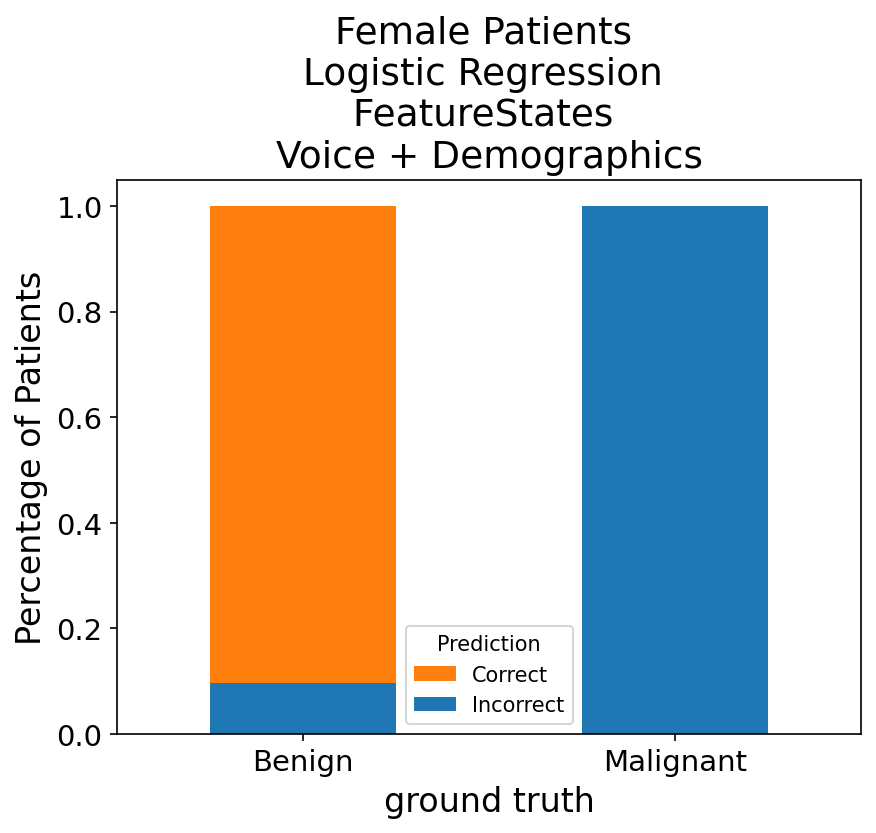

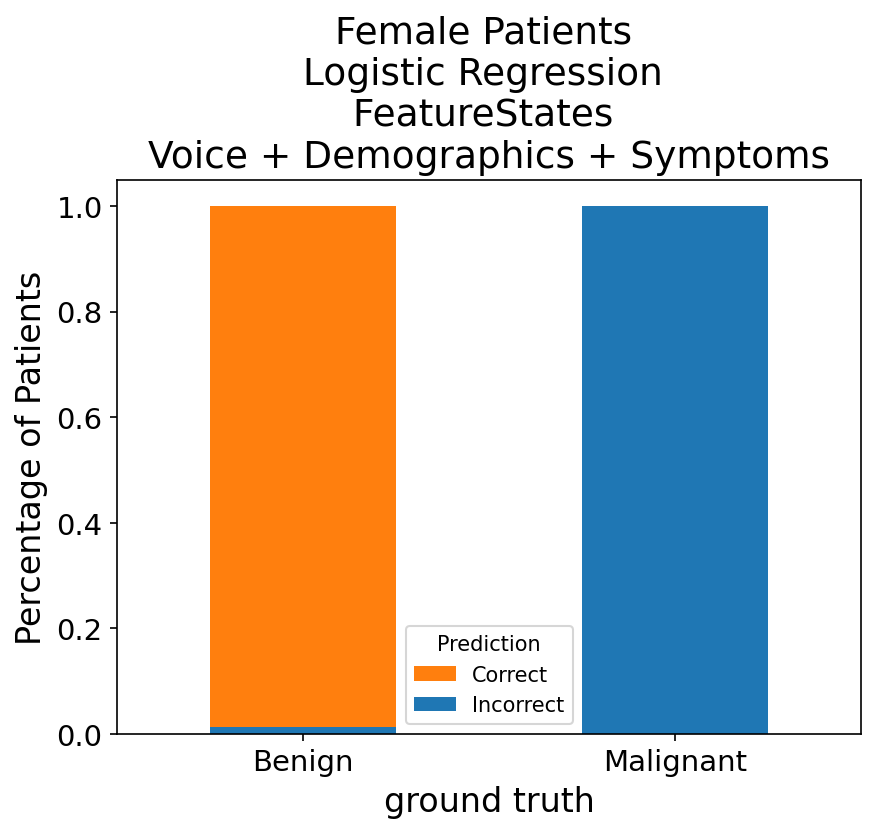

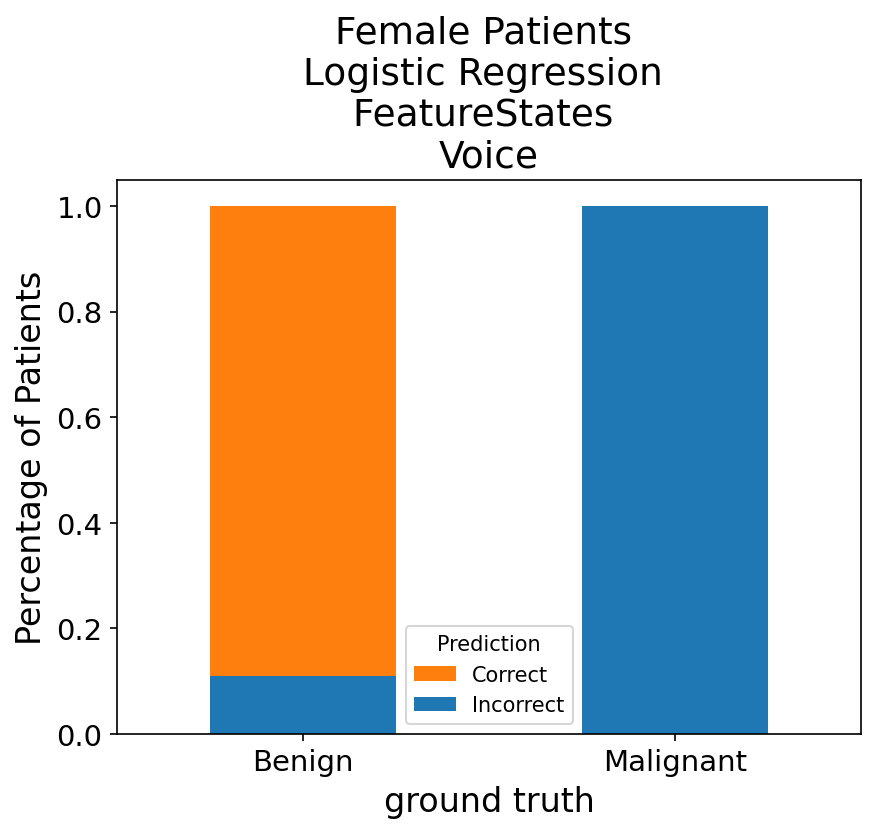

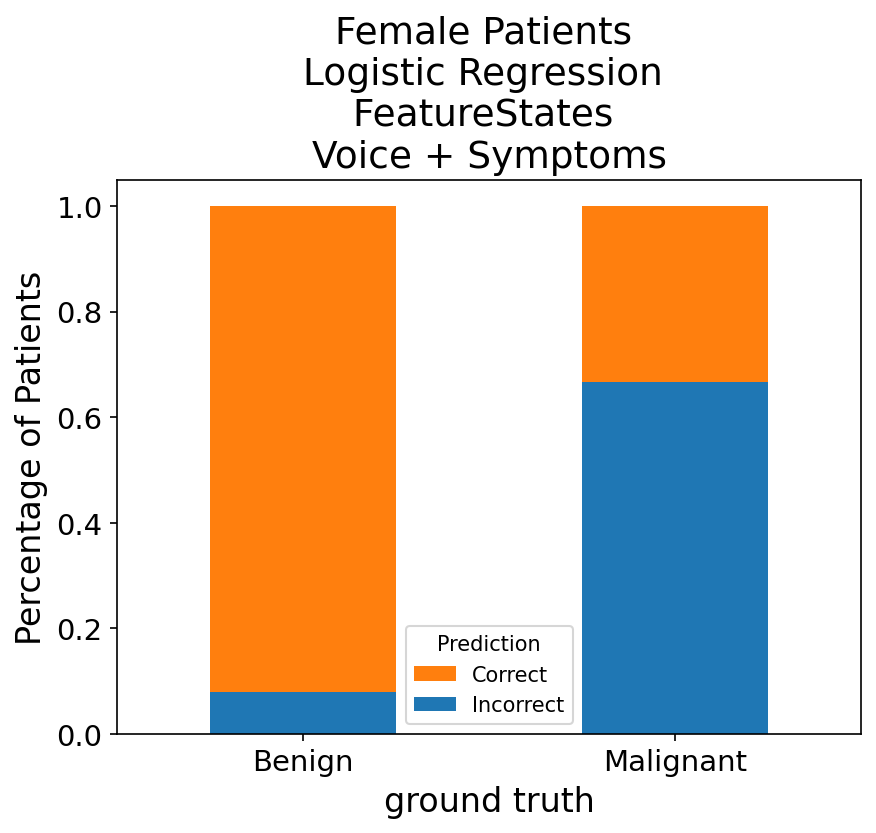

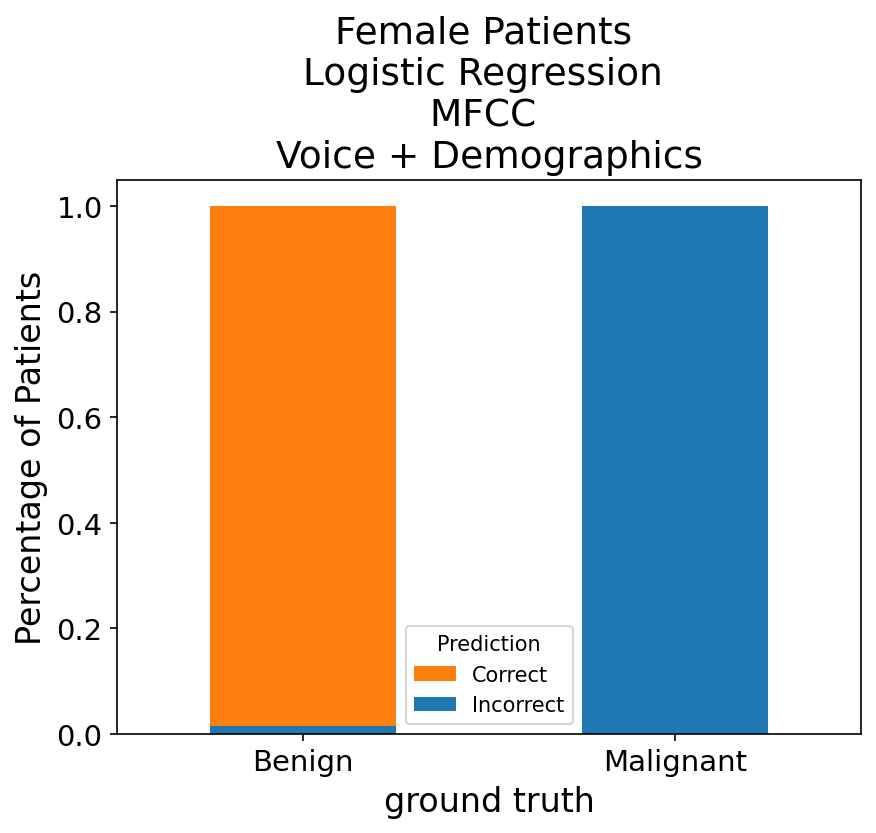

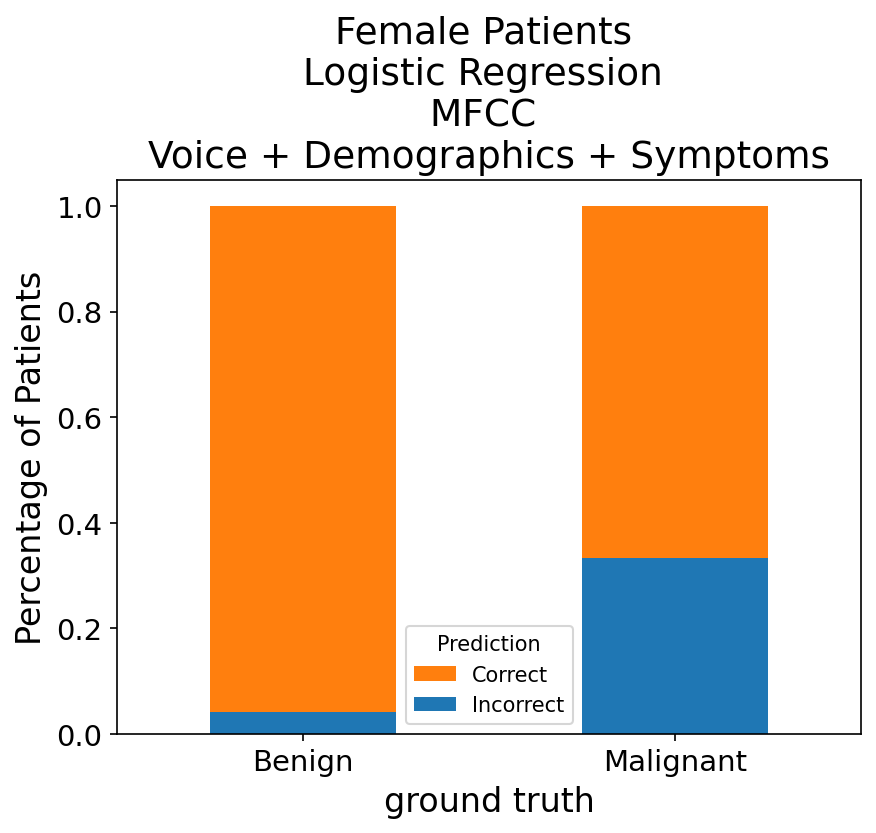

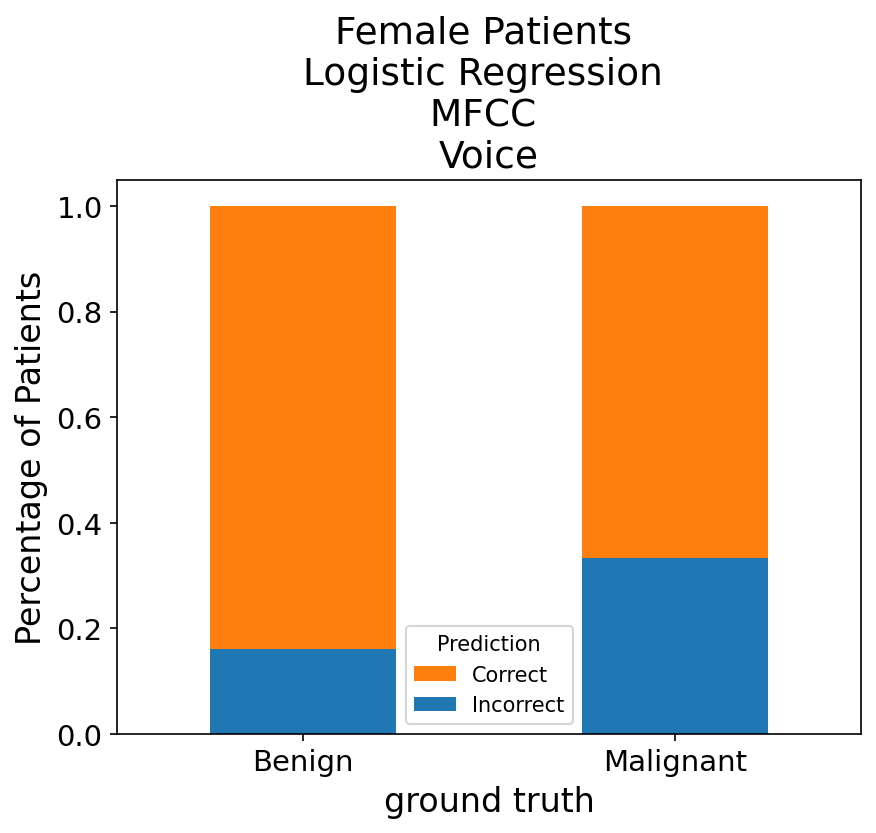

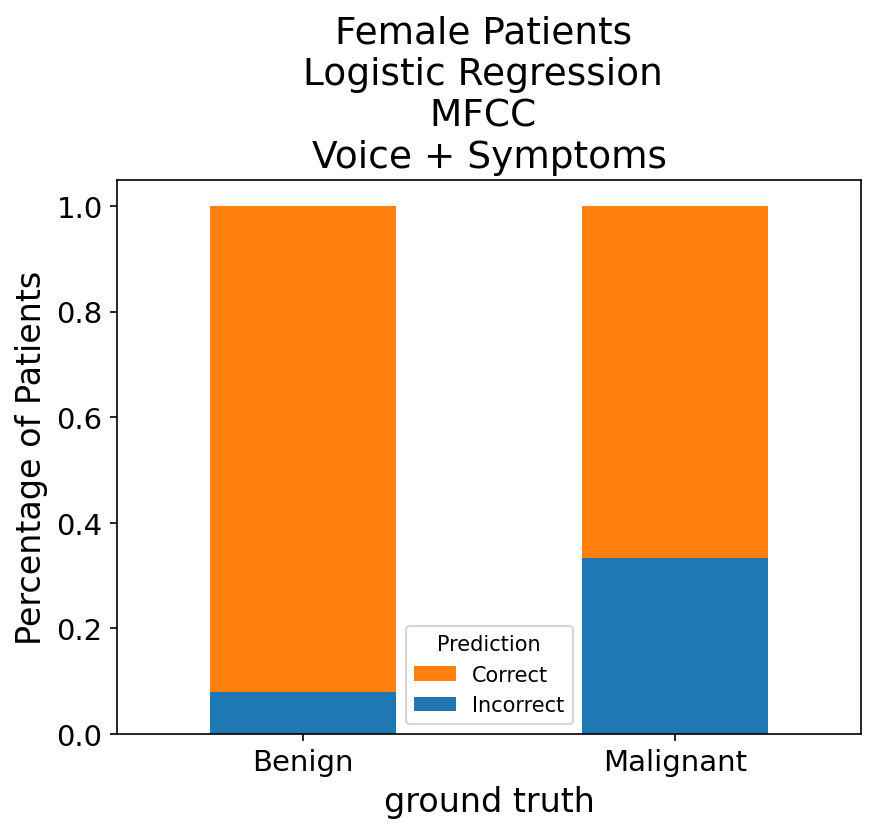

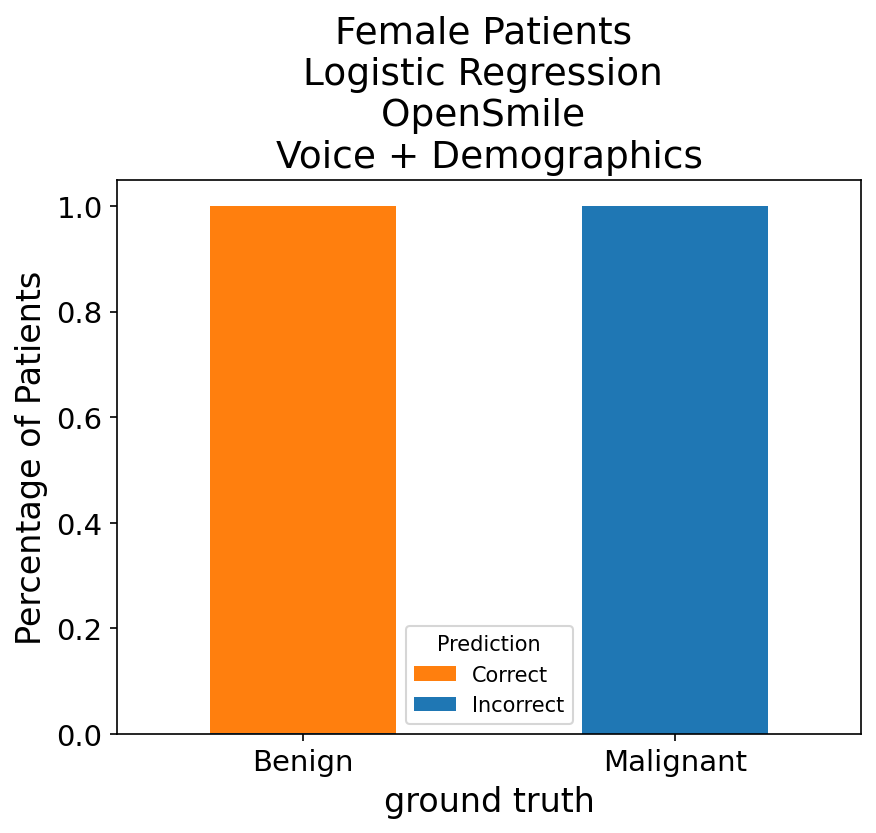

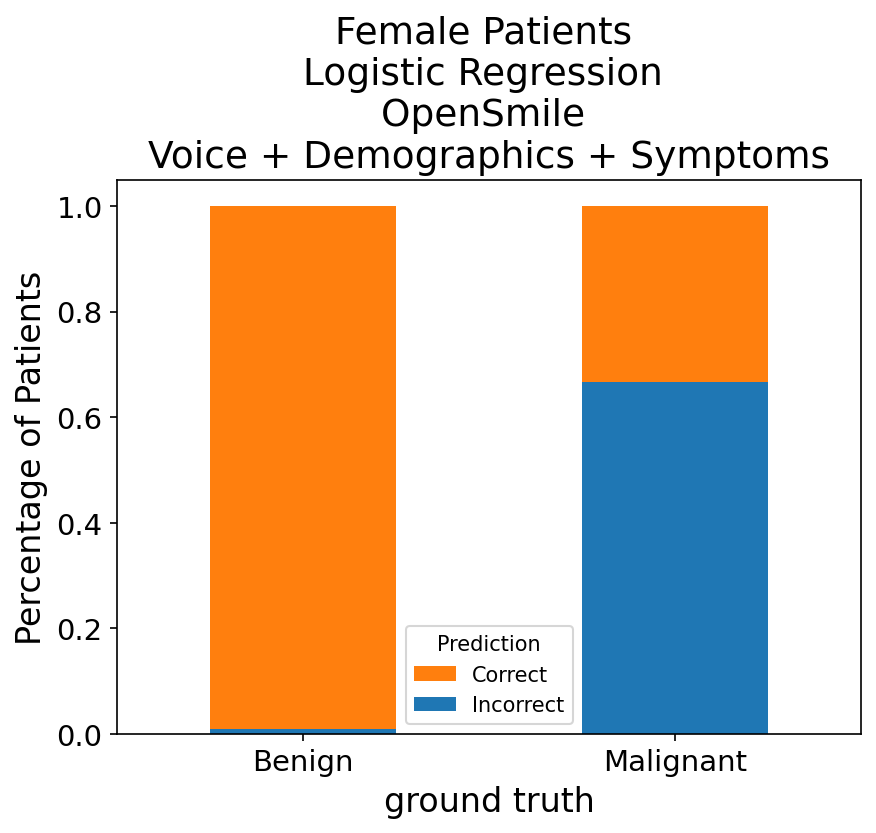

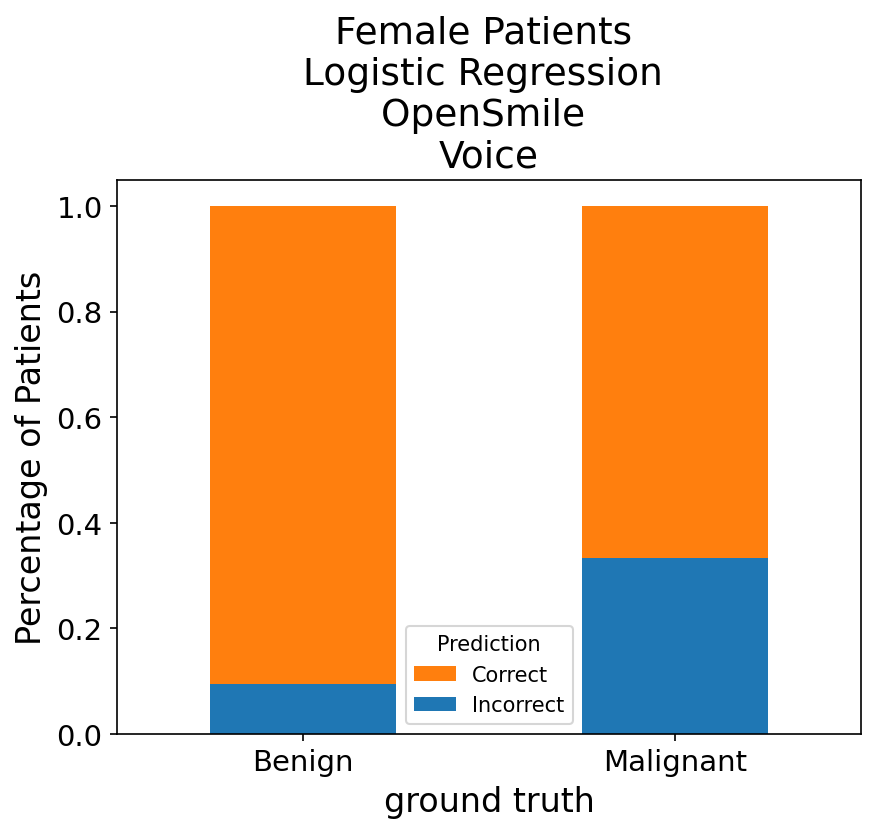

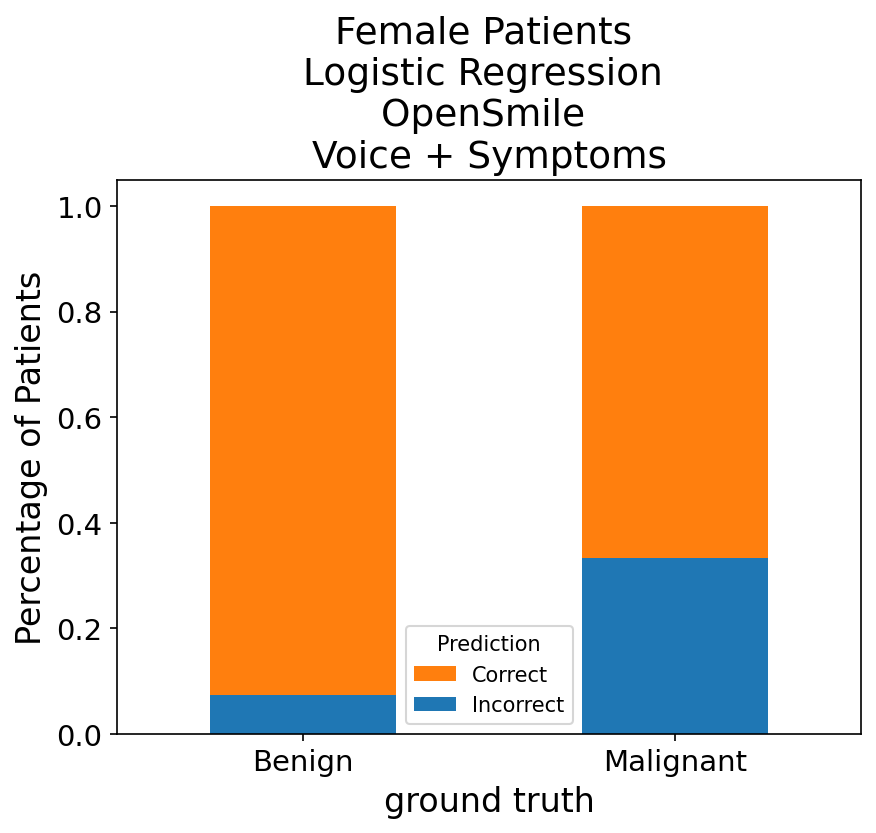

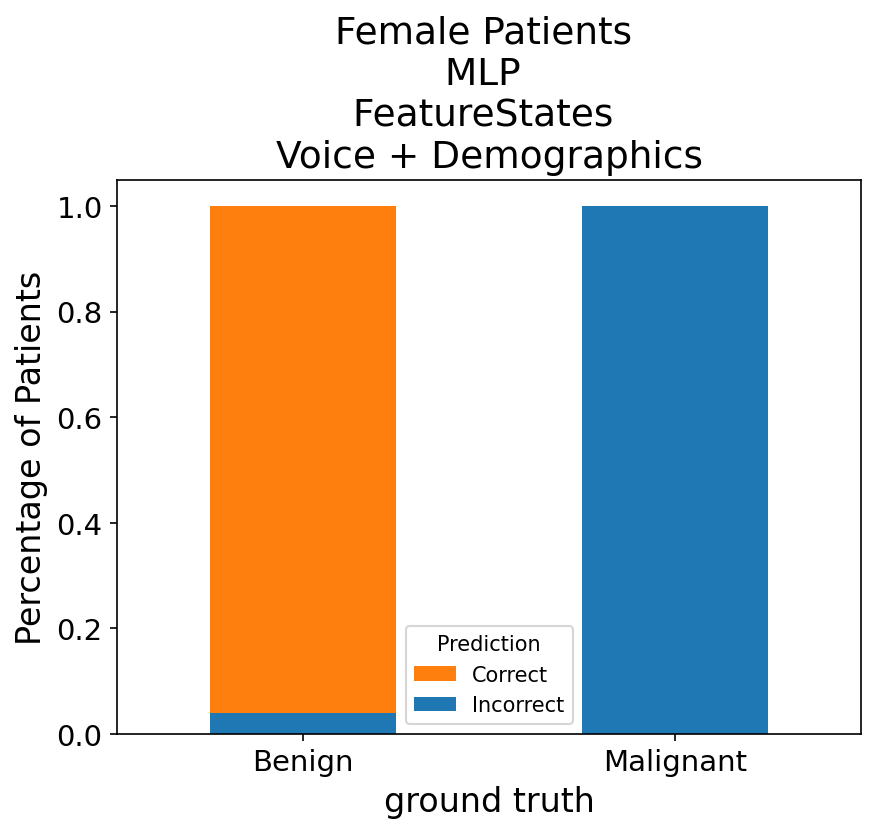

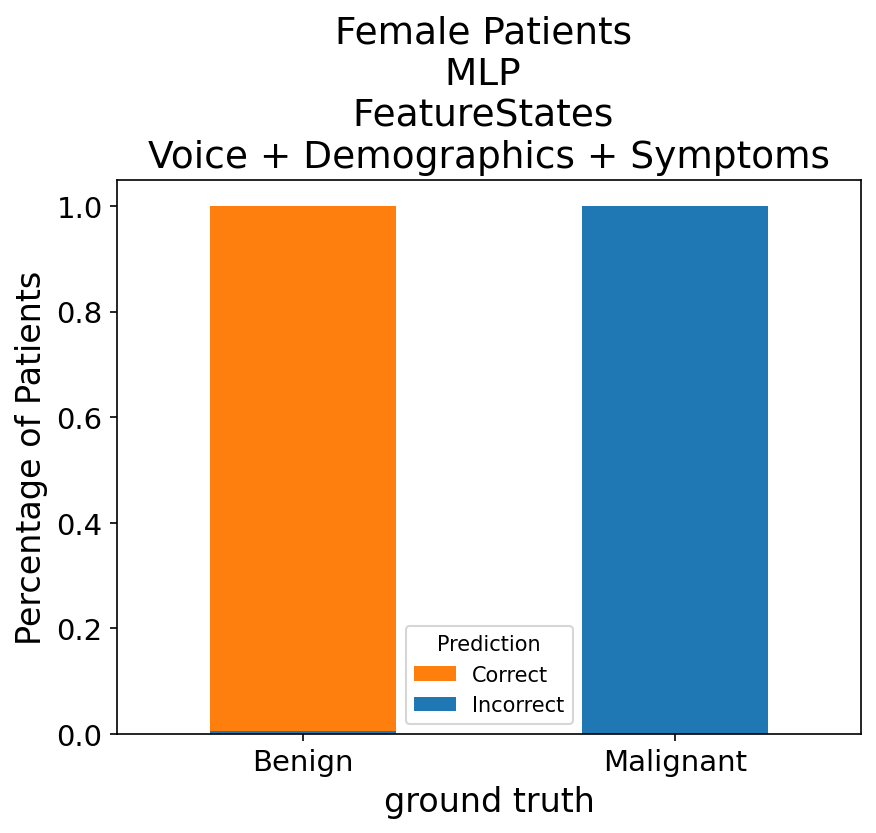

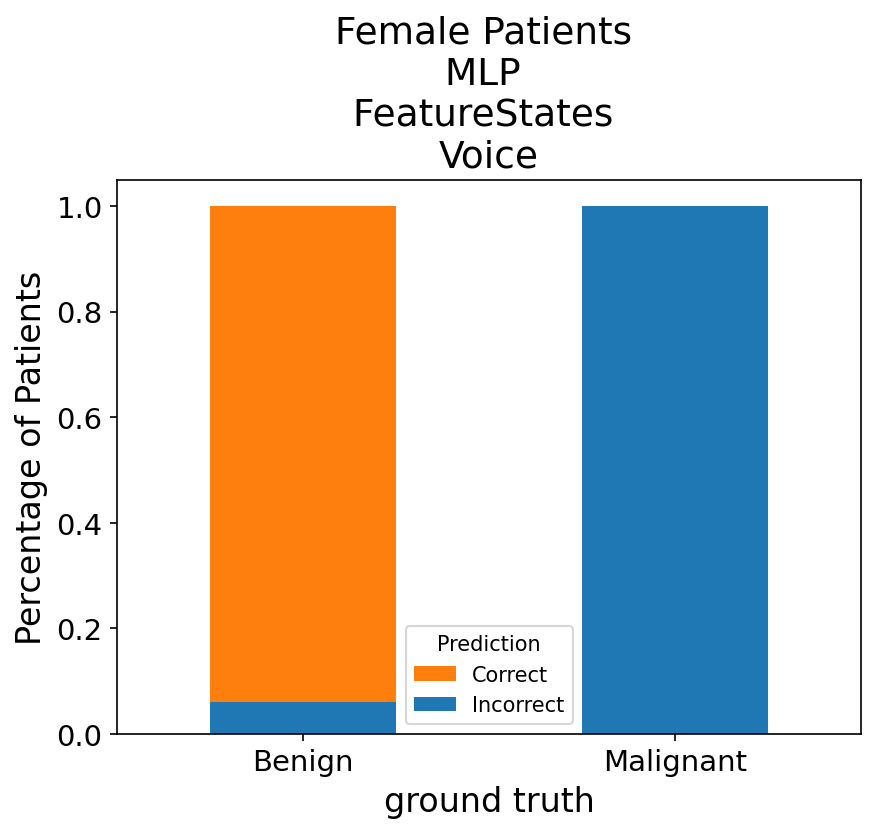

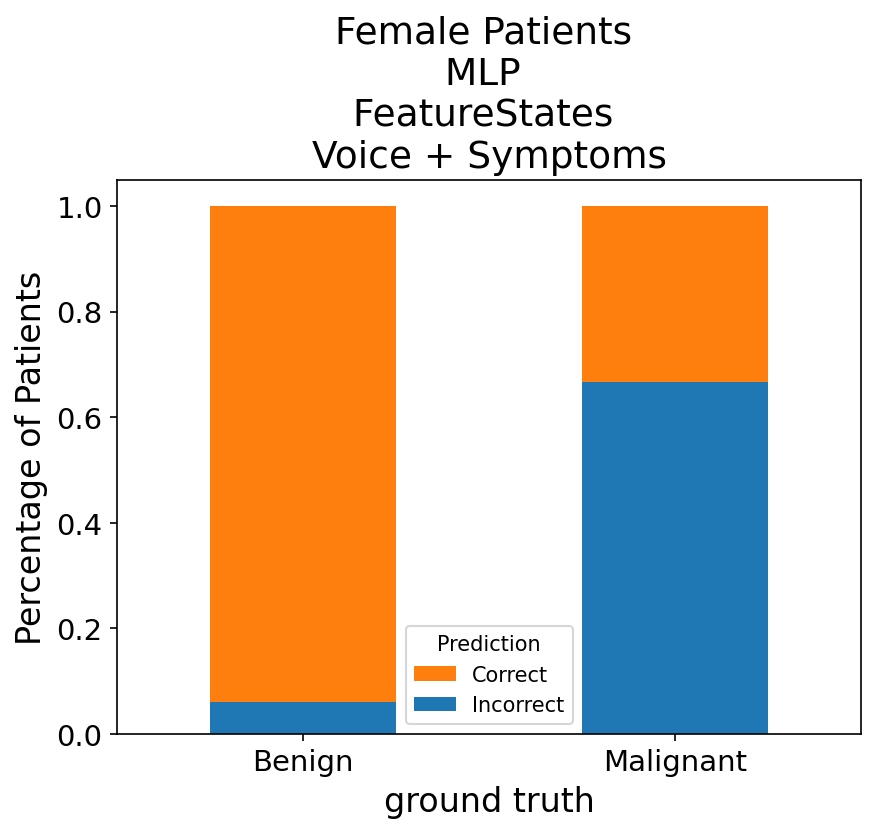

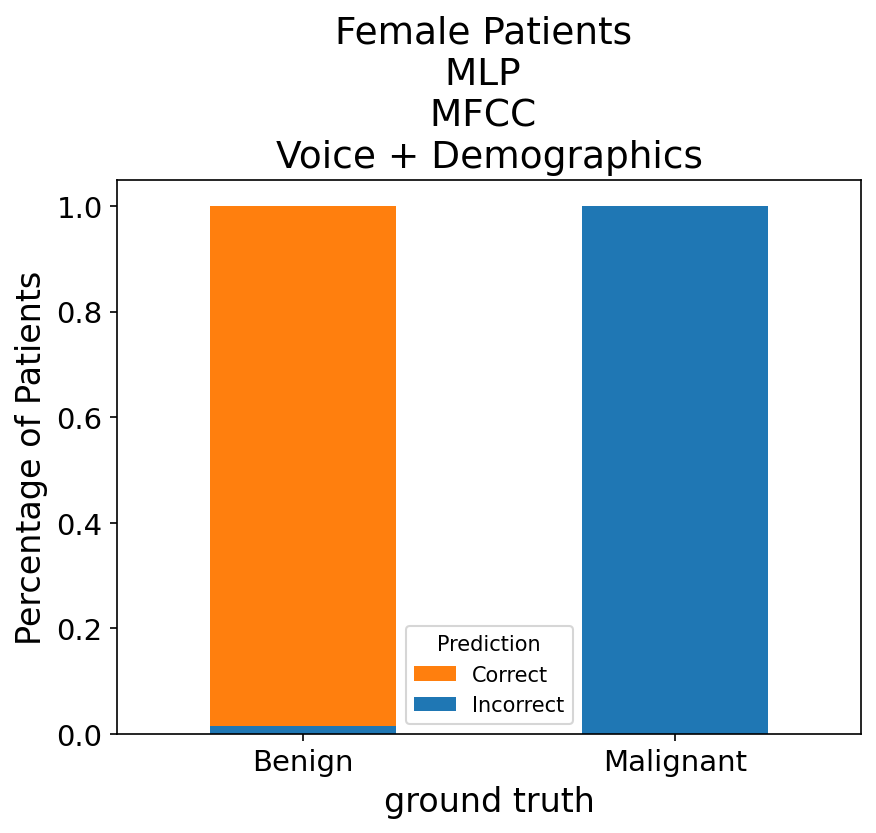

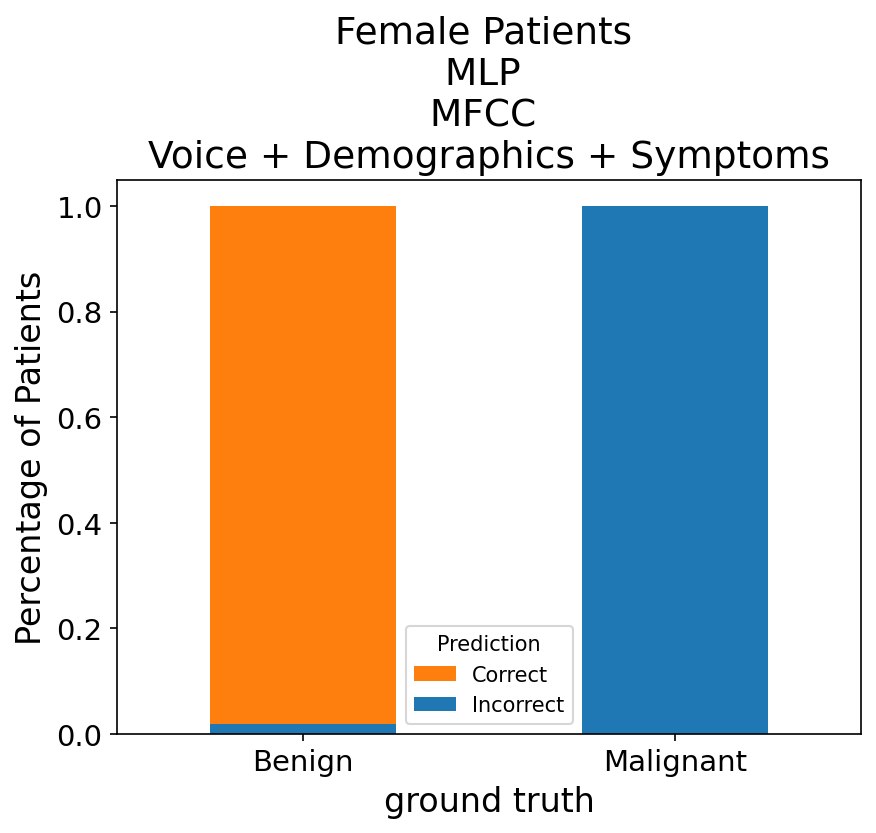

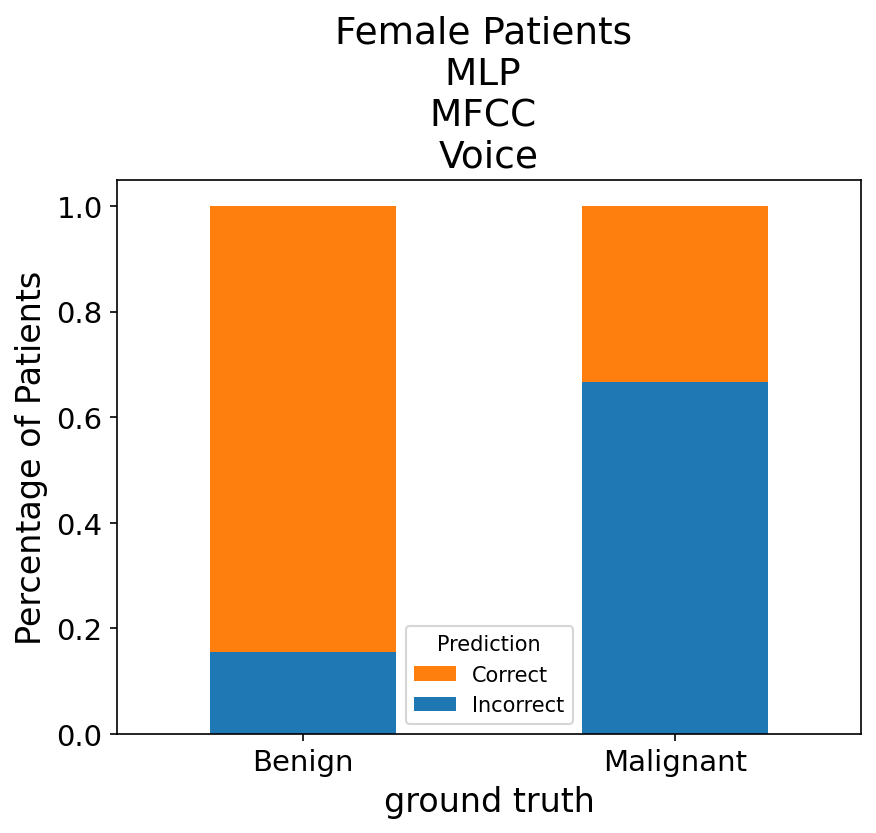

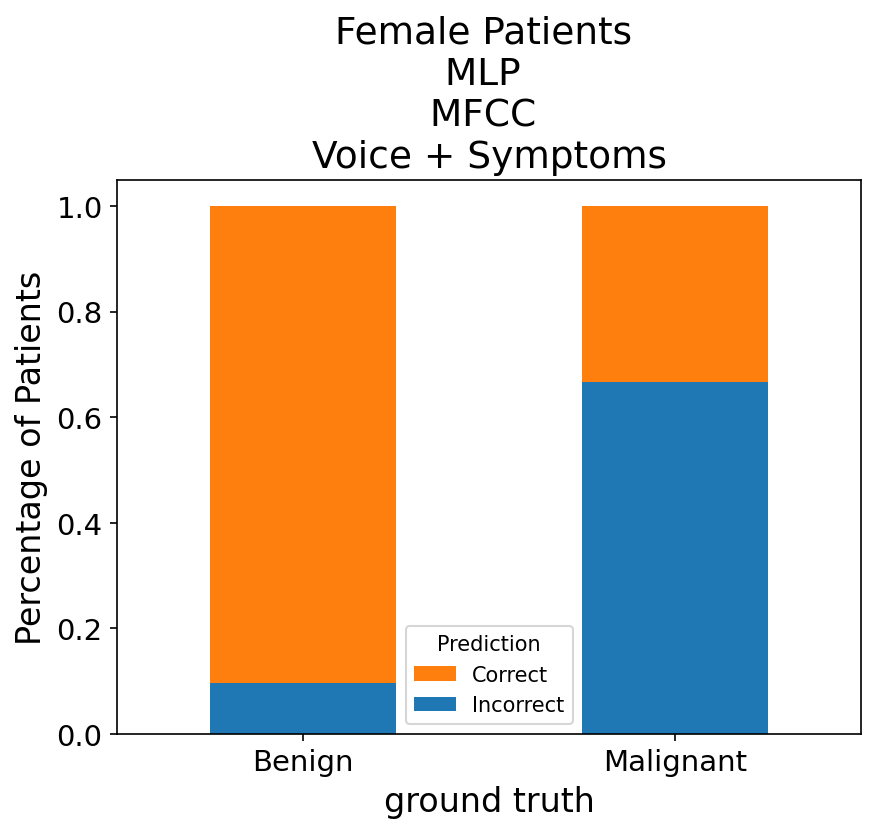

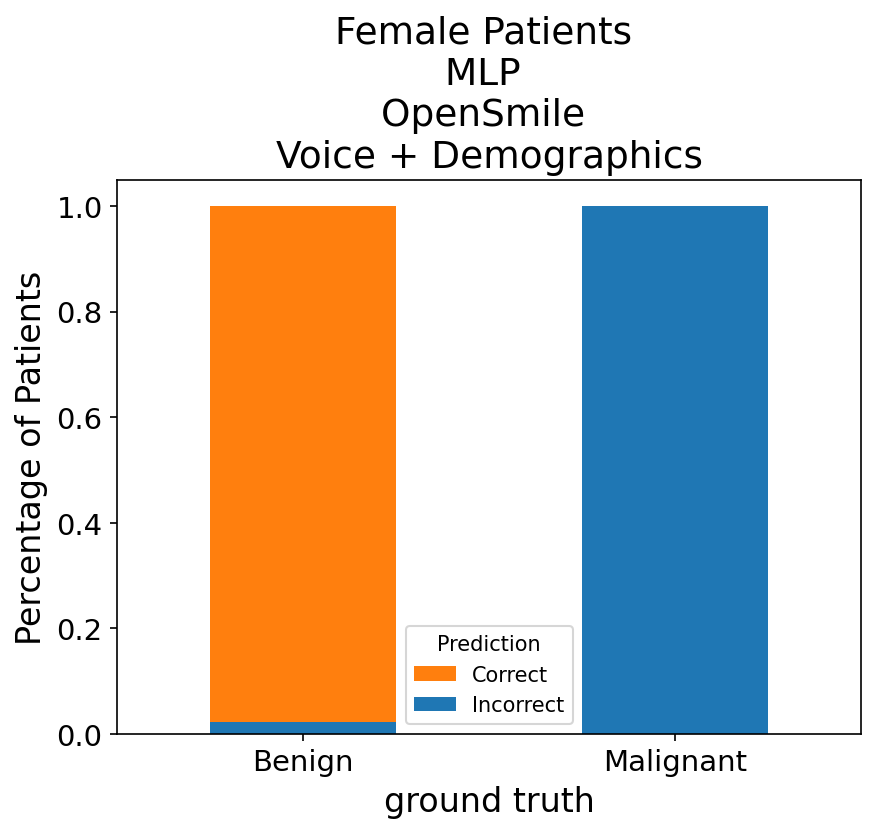

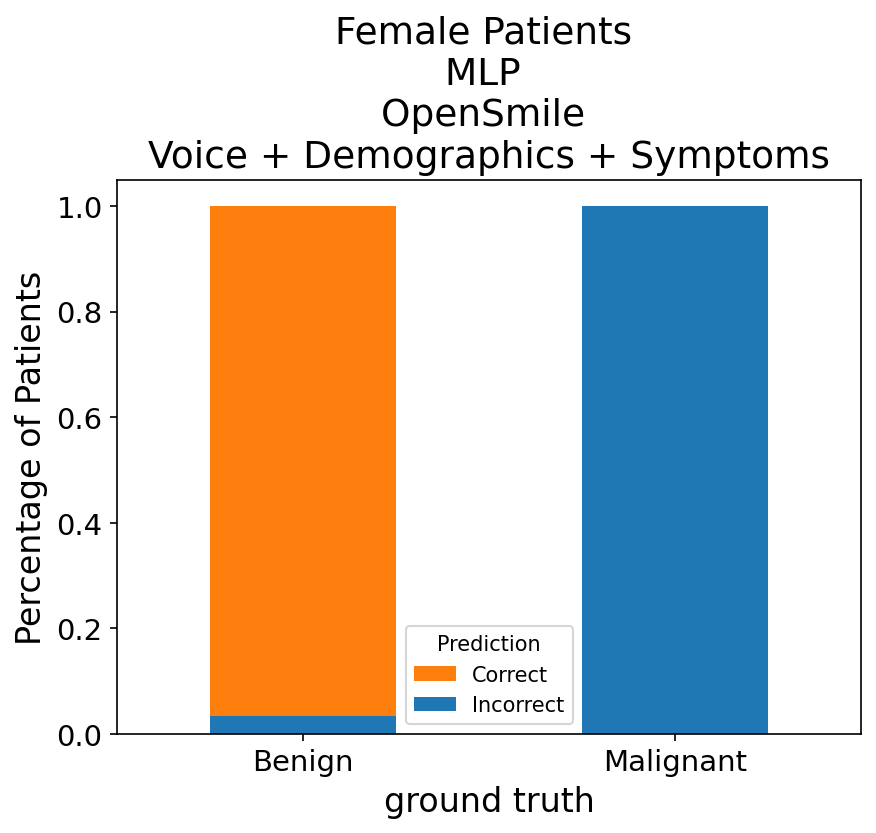

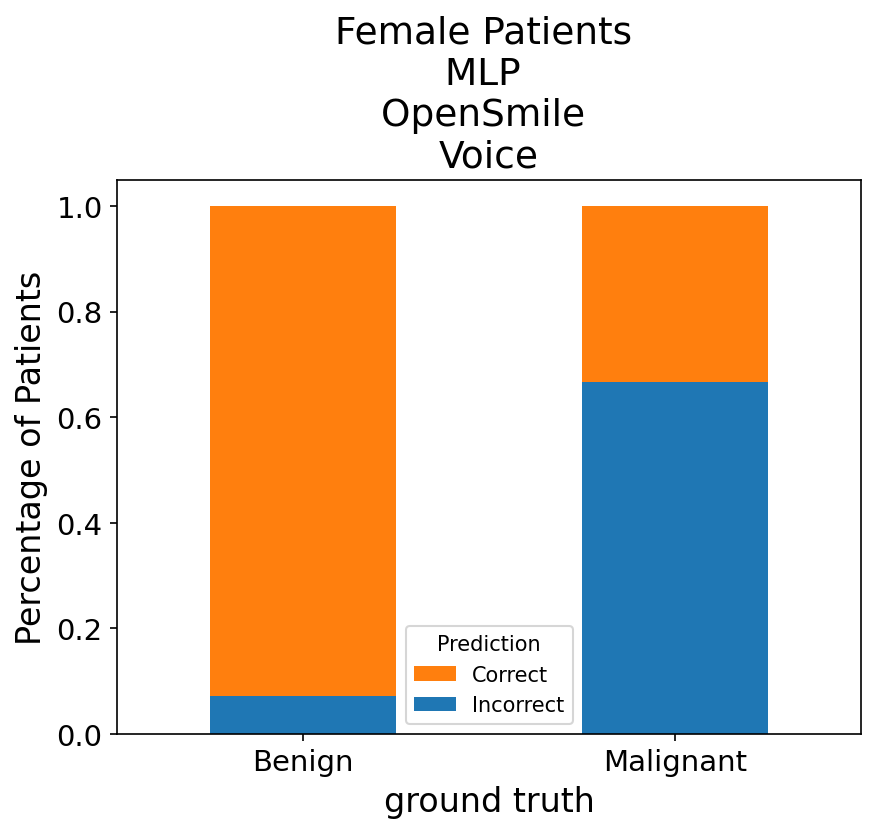

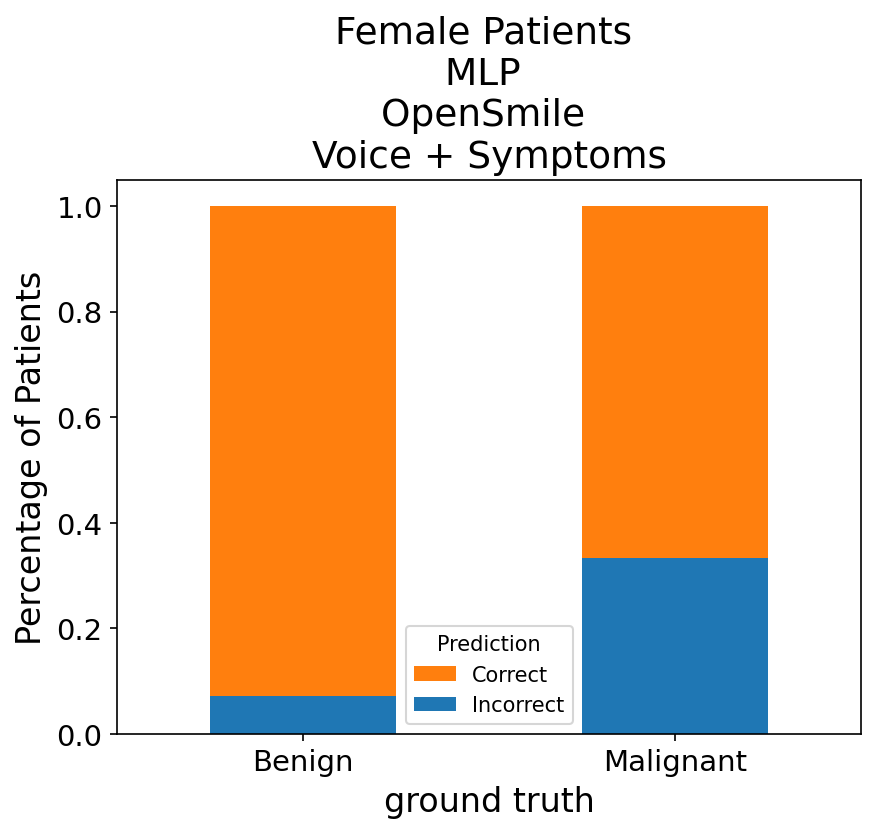

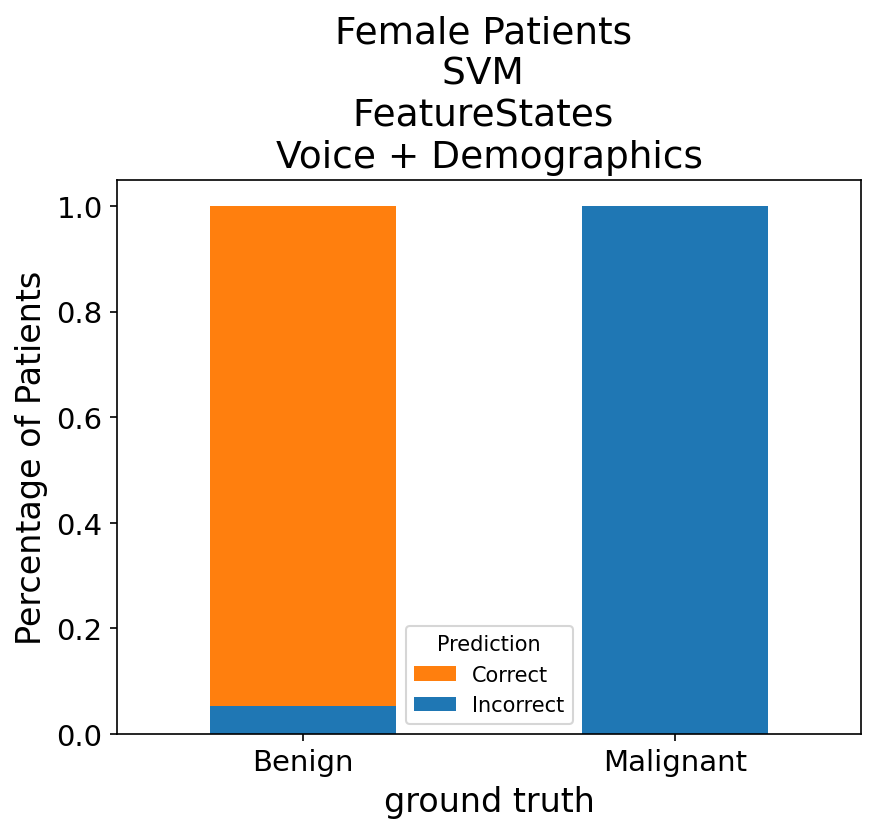

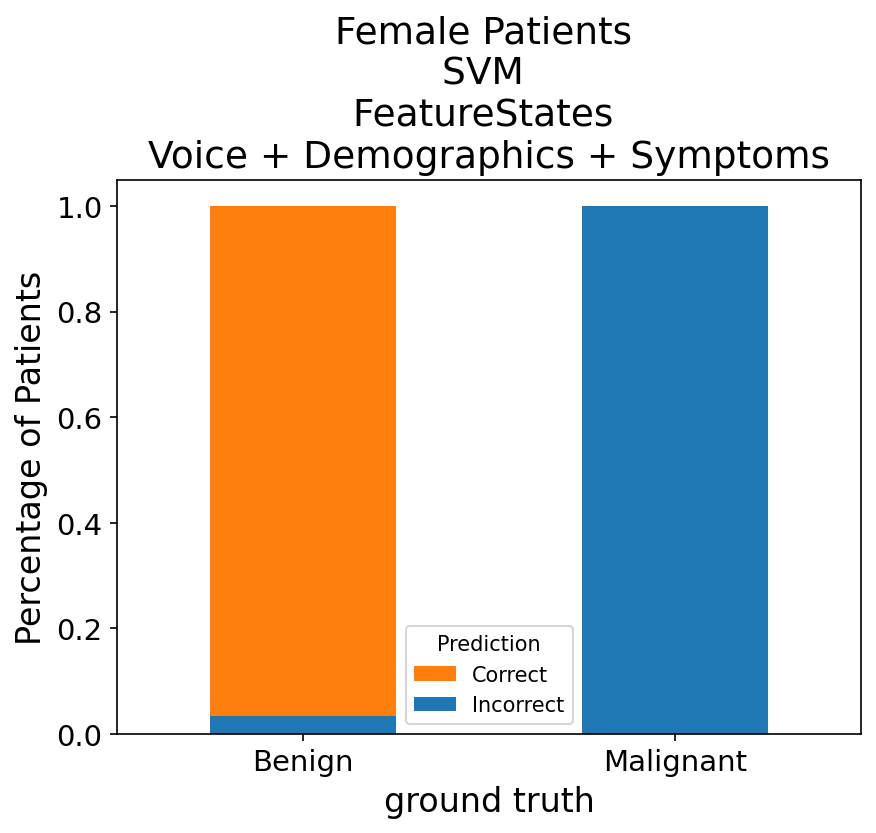

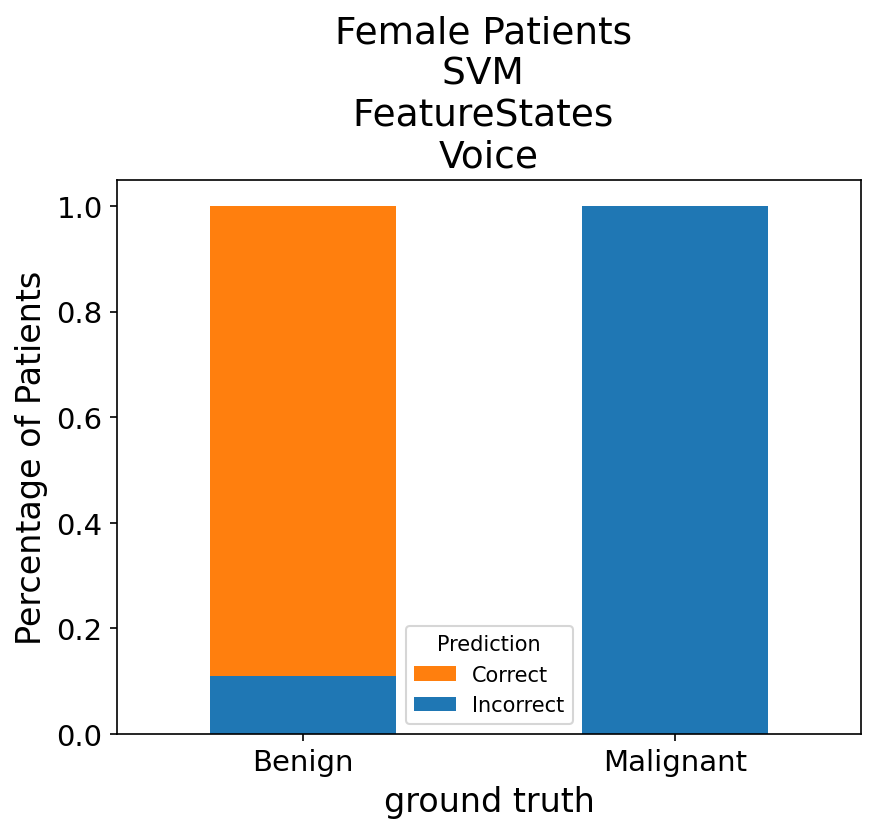

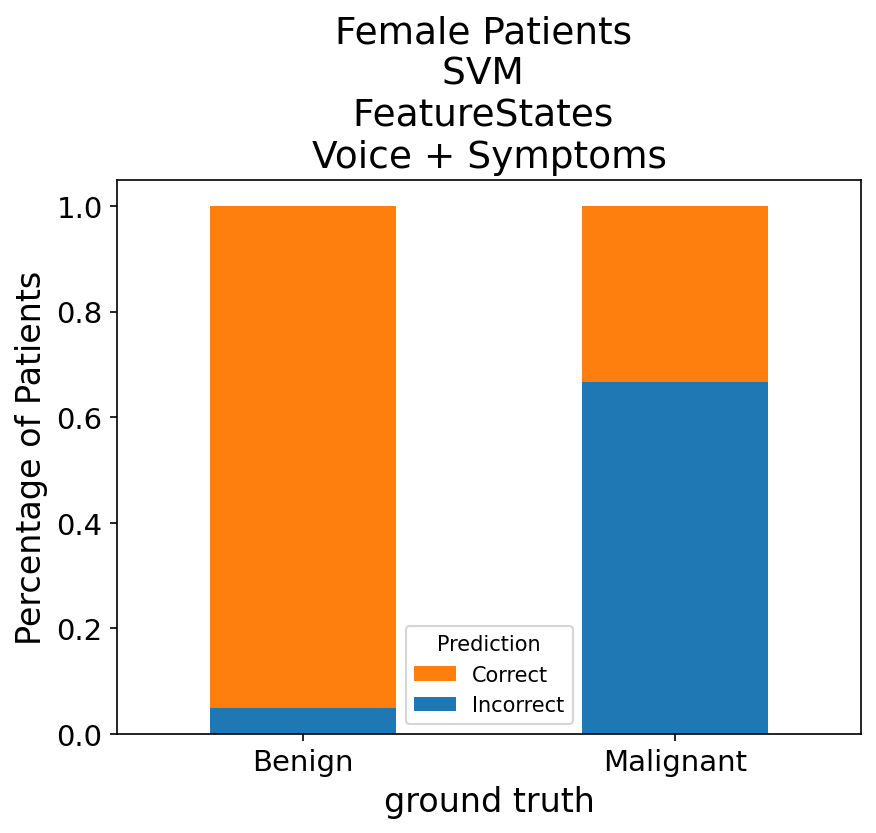

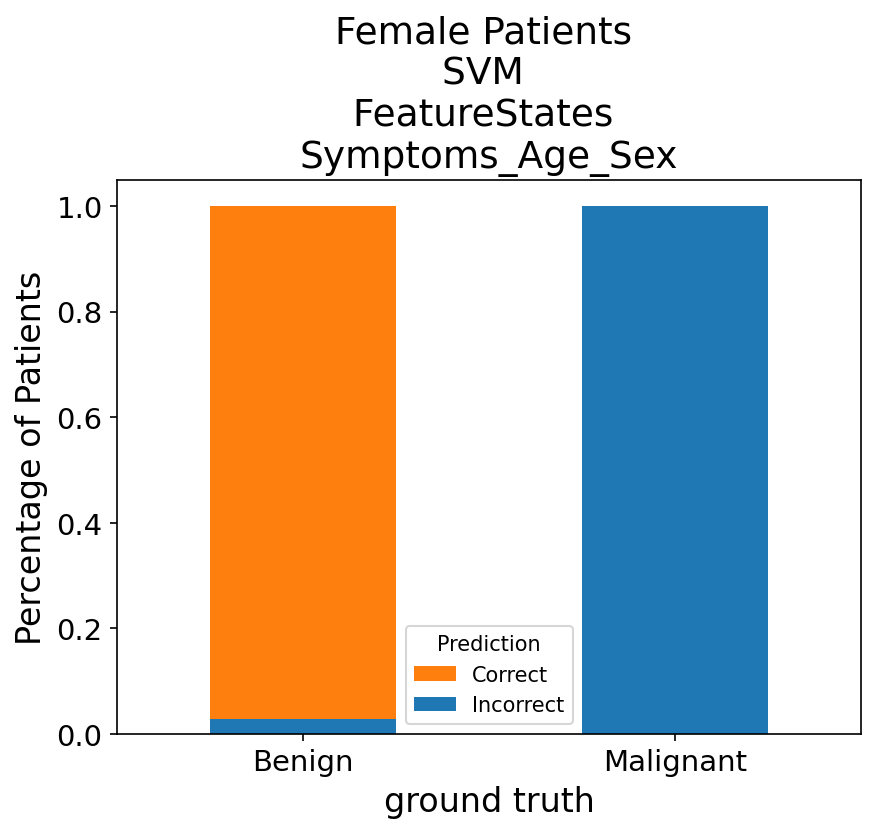

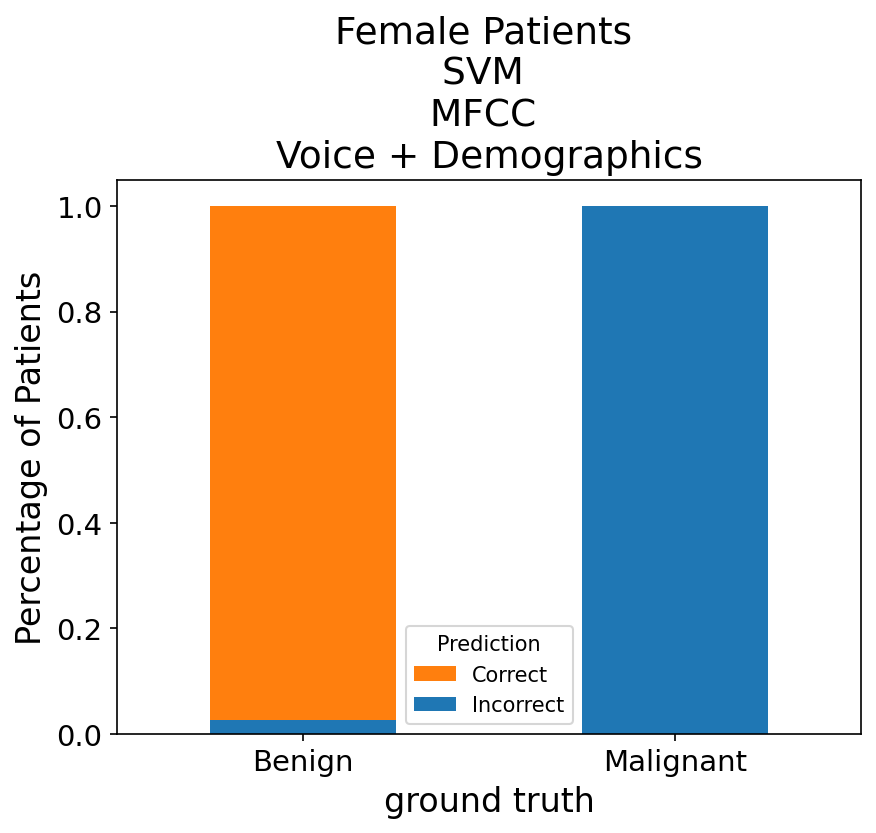

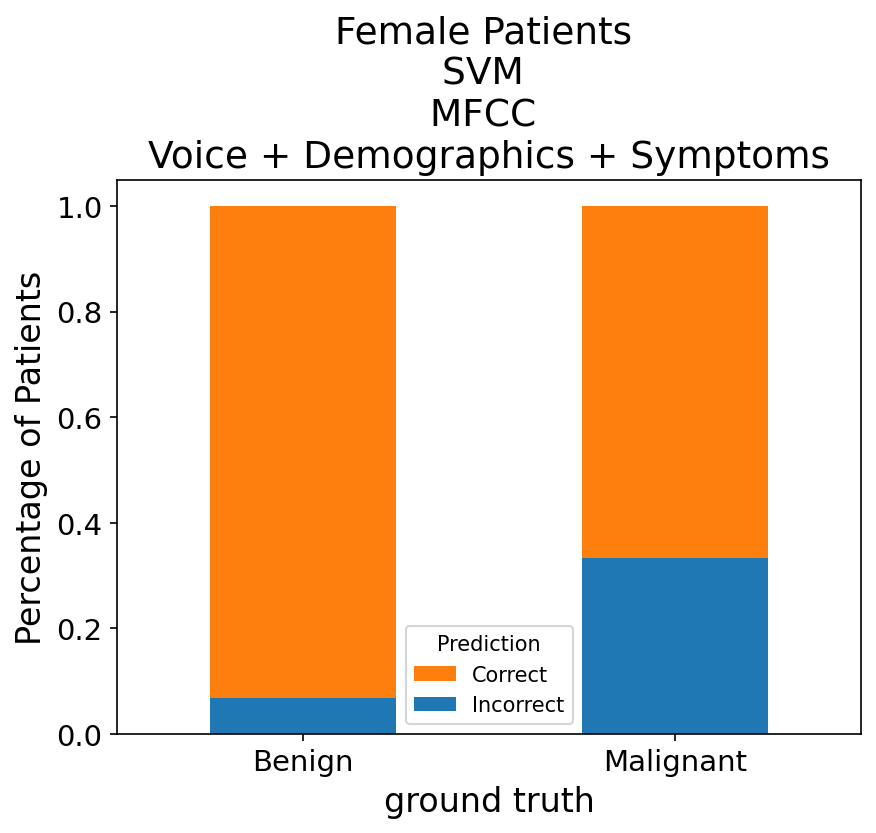

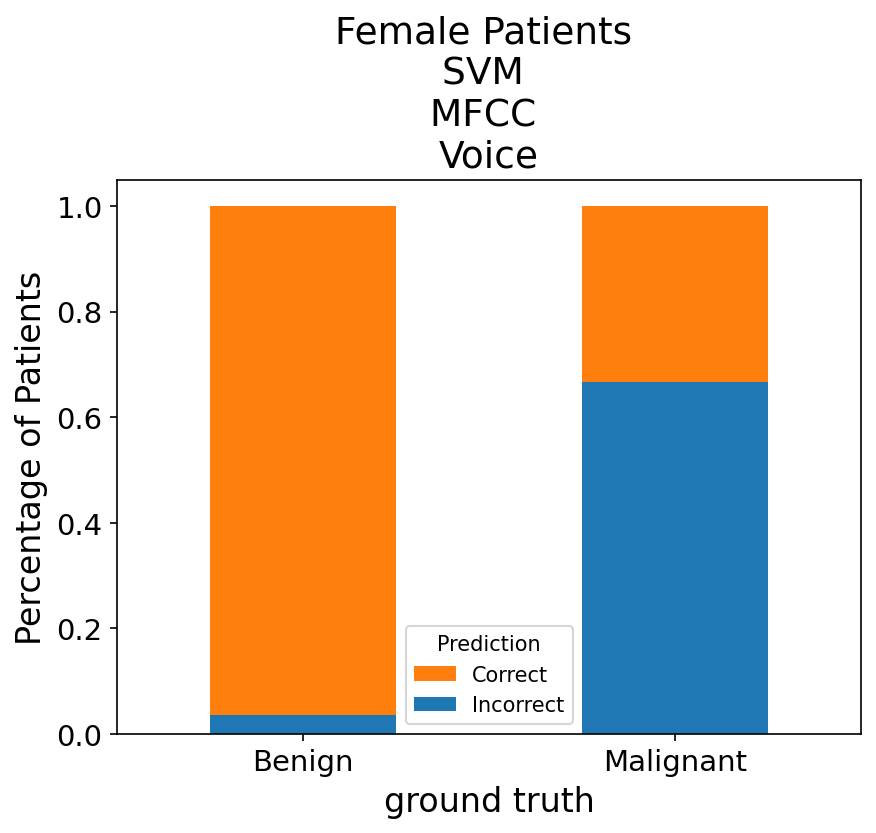

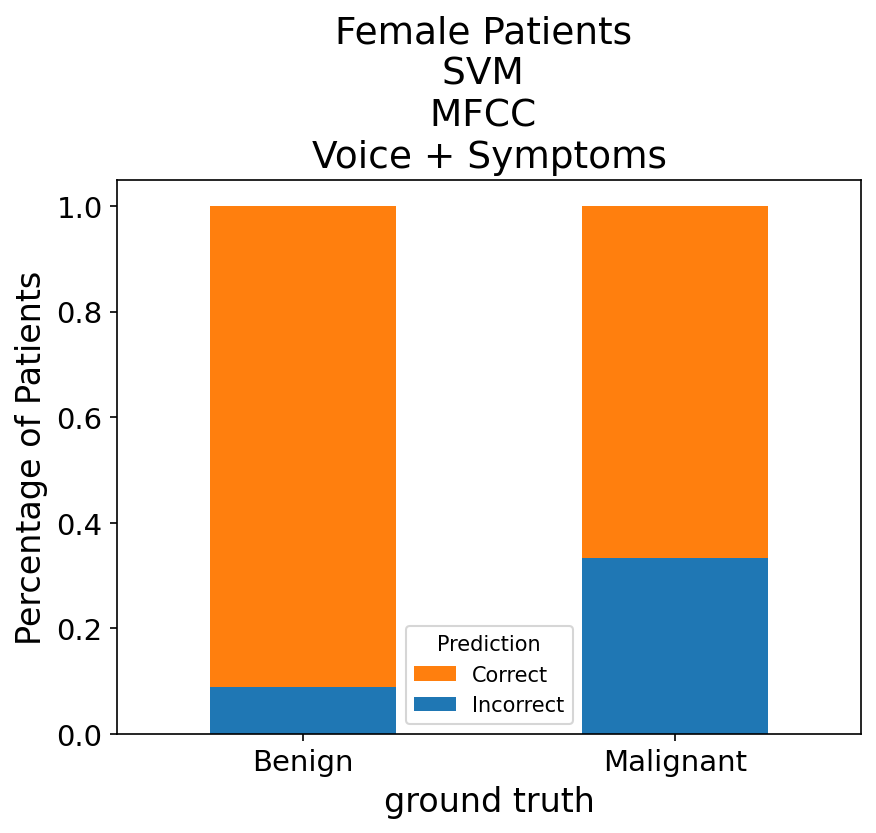

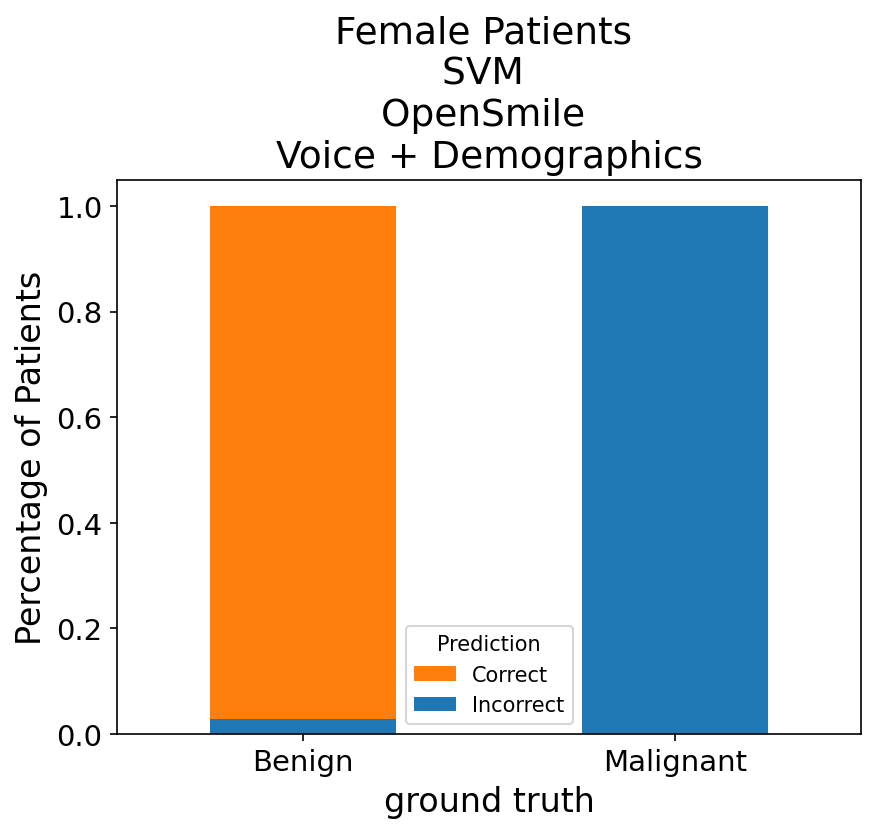

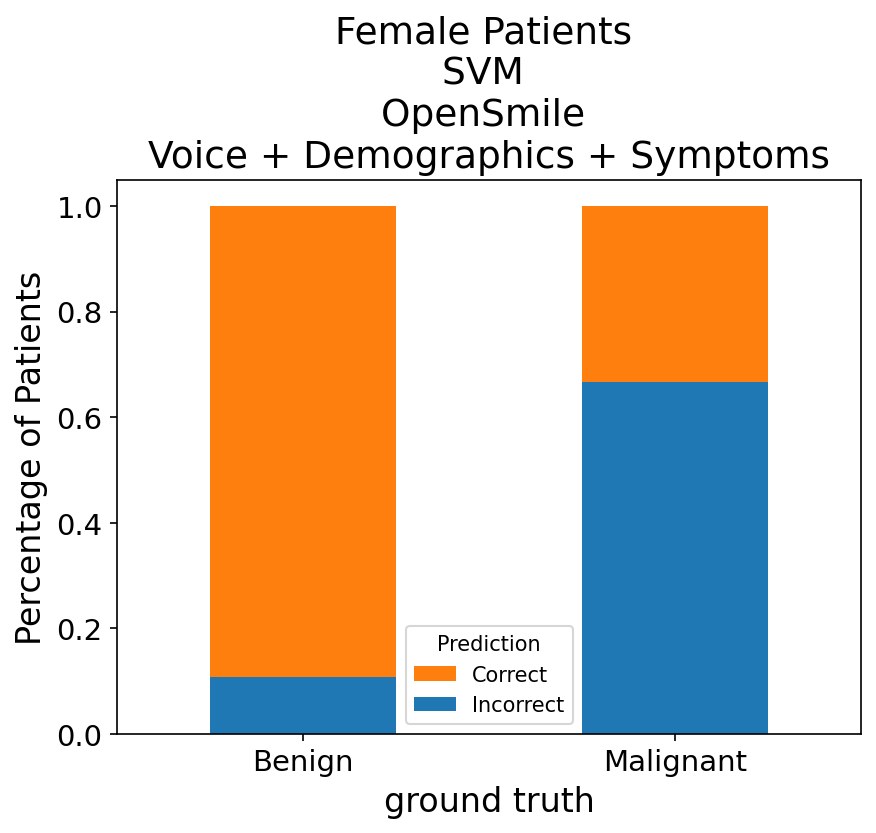

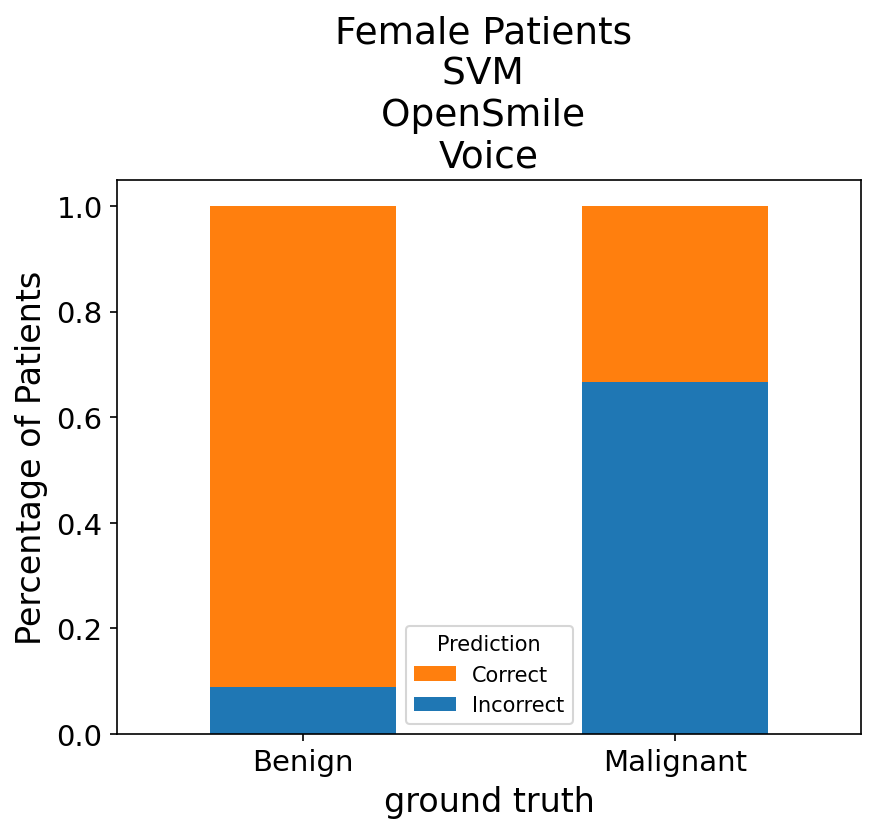

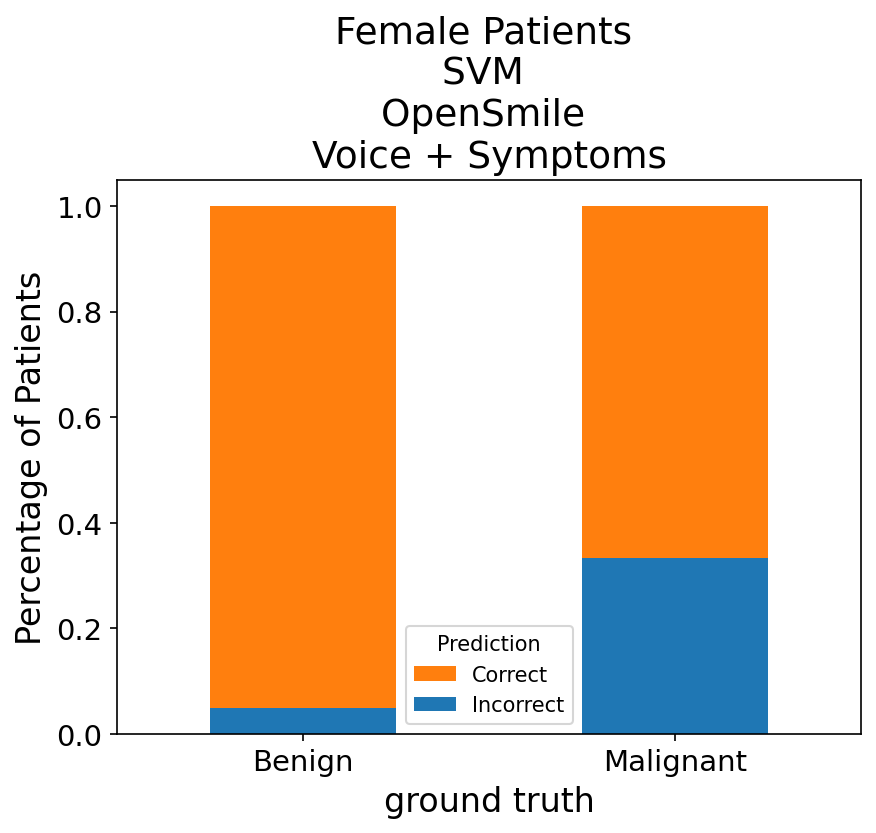

In [75]:
for file in os.listdir(model_dir):
    if file.endswith('.pkl'):
        female_patients = results[results['Sex']==2]
        test_cross_tab = pd.crosstab(female_patients['ground truth'], female_patients[file], normalize='index')
        
        test_cross_tab.rename(columns={True:'Correct'},inplace=True)
        test_cross_tab.rename(columns={False:'Incorrect'},inplace=True)


        test_cross_tab.plot(kind='bar', stacked=True)
        plt.xticks(rotation=0)
        plt.legend(title='Prediction', reverse=True)

        model_name = file.split('.')[0]
        algorithm, feature, input_val = model_name.split('_', maxsplit=2)

        algorithm = algorithm_map[algorithm]

        try:
            input_val = input_map[input_val]
        except:
            pass
        
        title = f'Female Patients \n{algorithm} \n{feature} \n{input_val}'
        plt.title(title)
        plt.ylabel('Percentage of Patients')

        plt.savefig(f'GenderPerformance/female_only_{model_name}.pdf')

        plt.show()

        
        # break

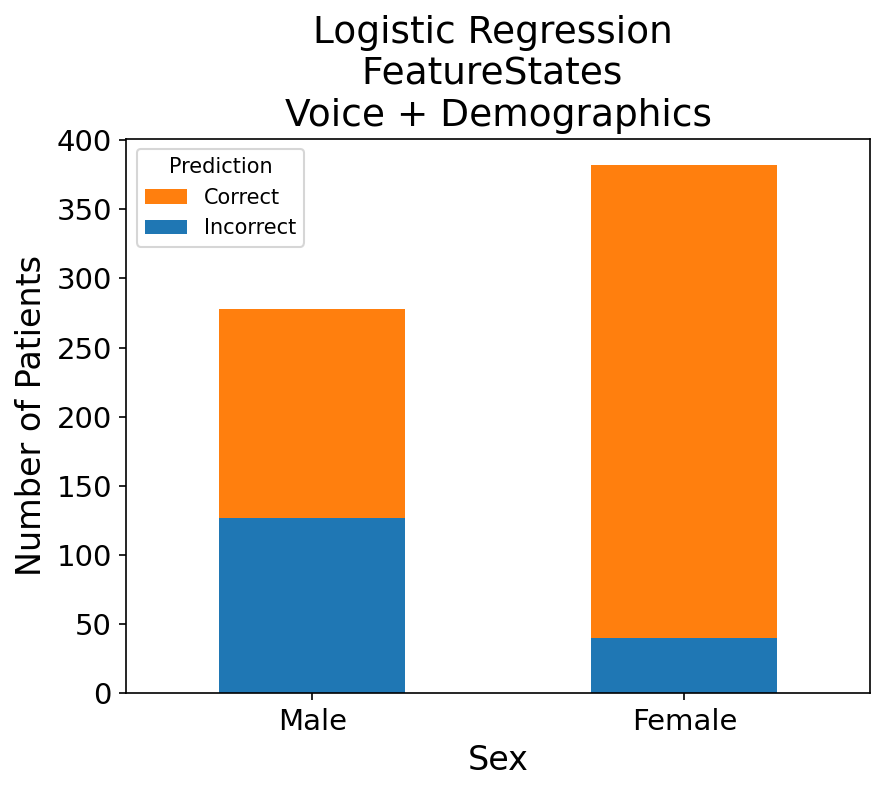

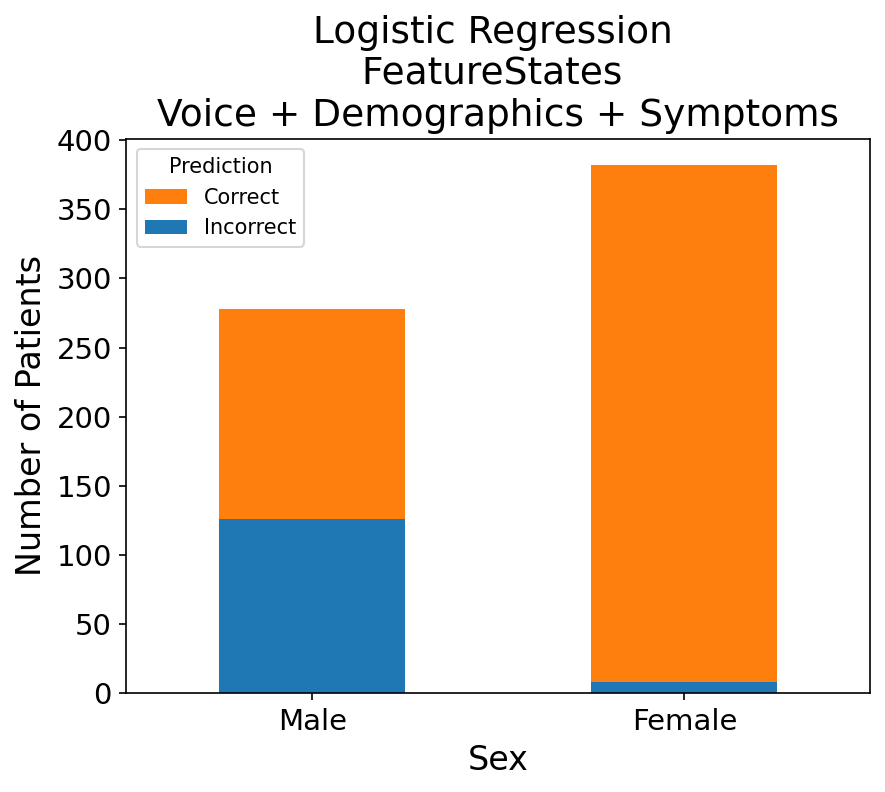

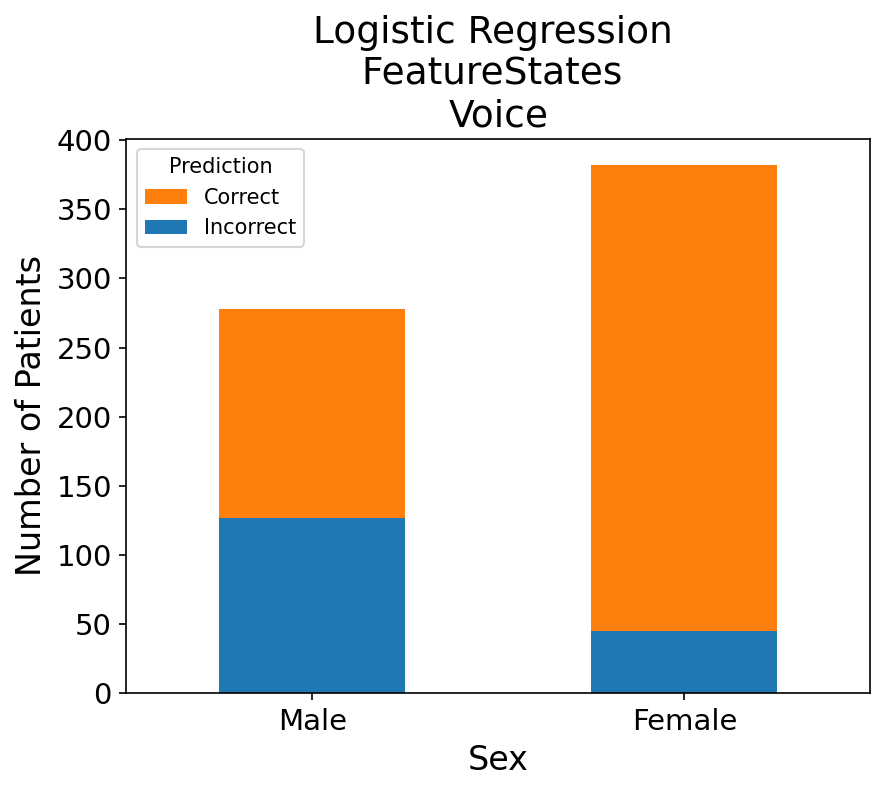

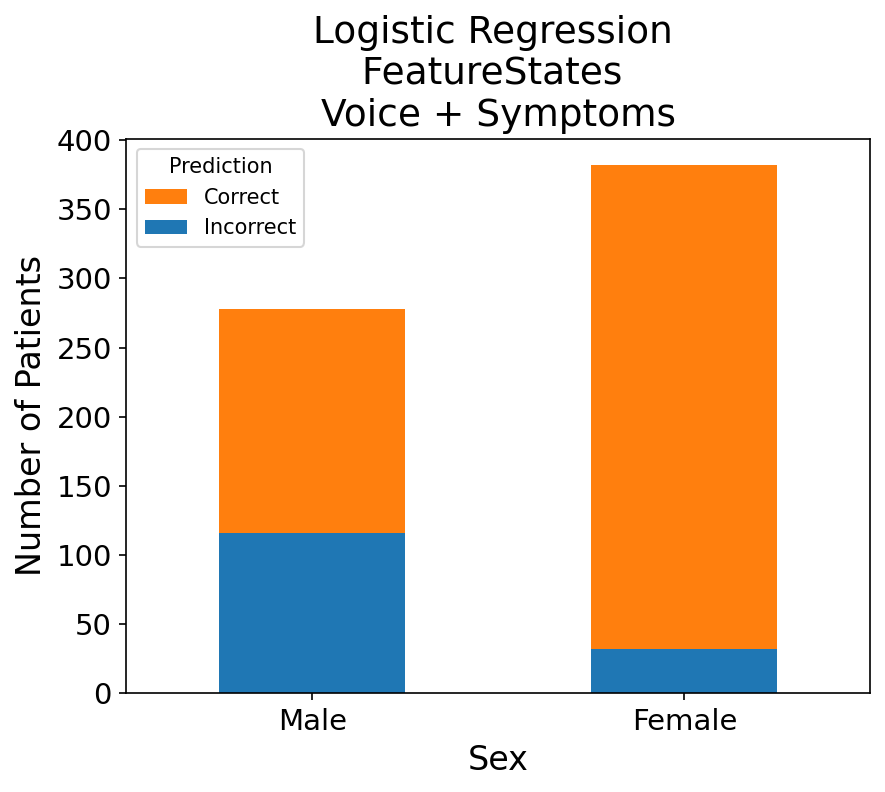

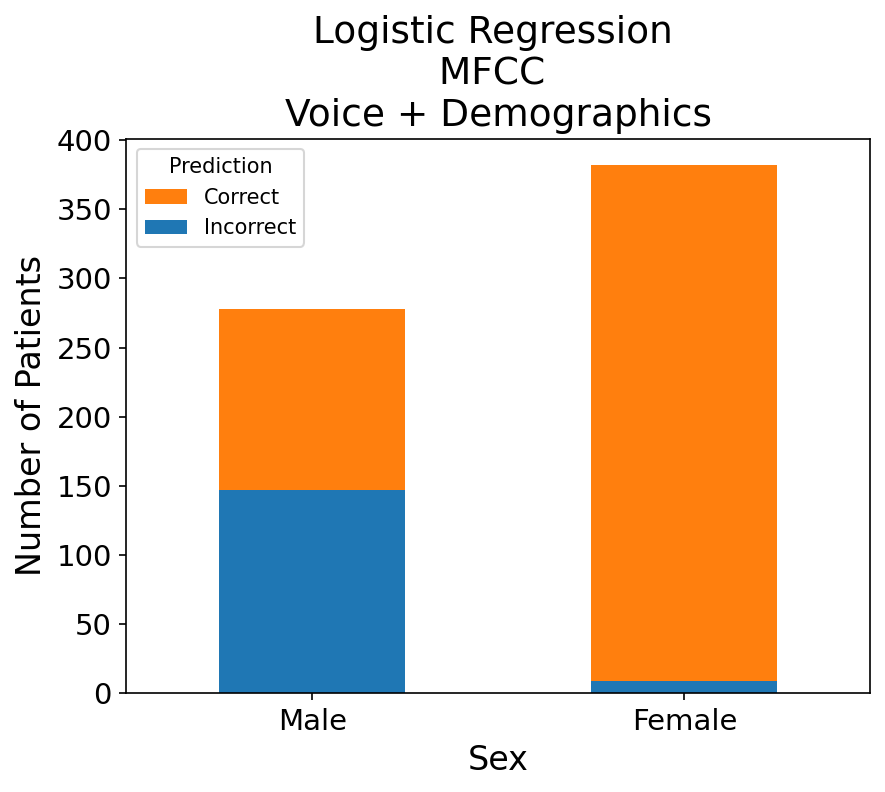

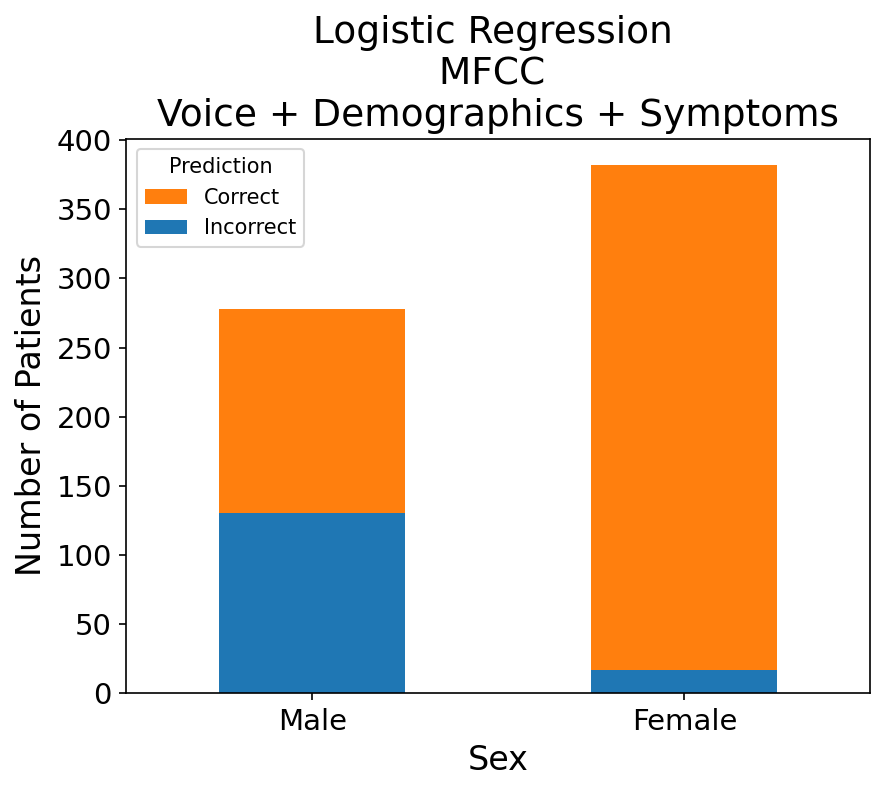

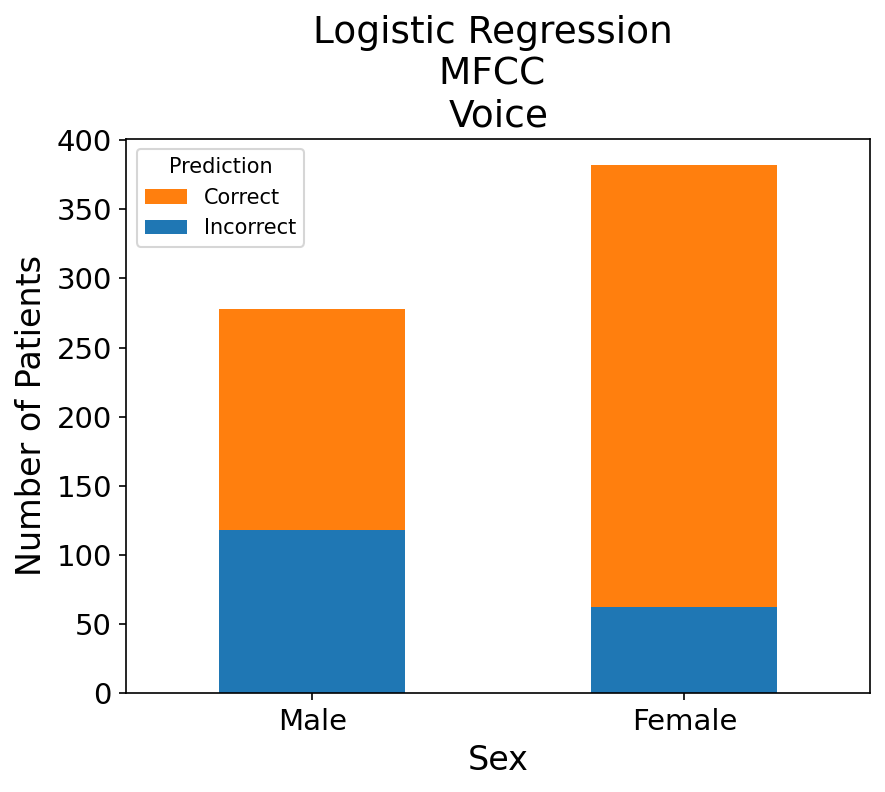

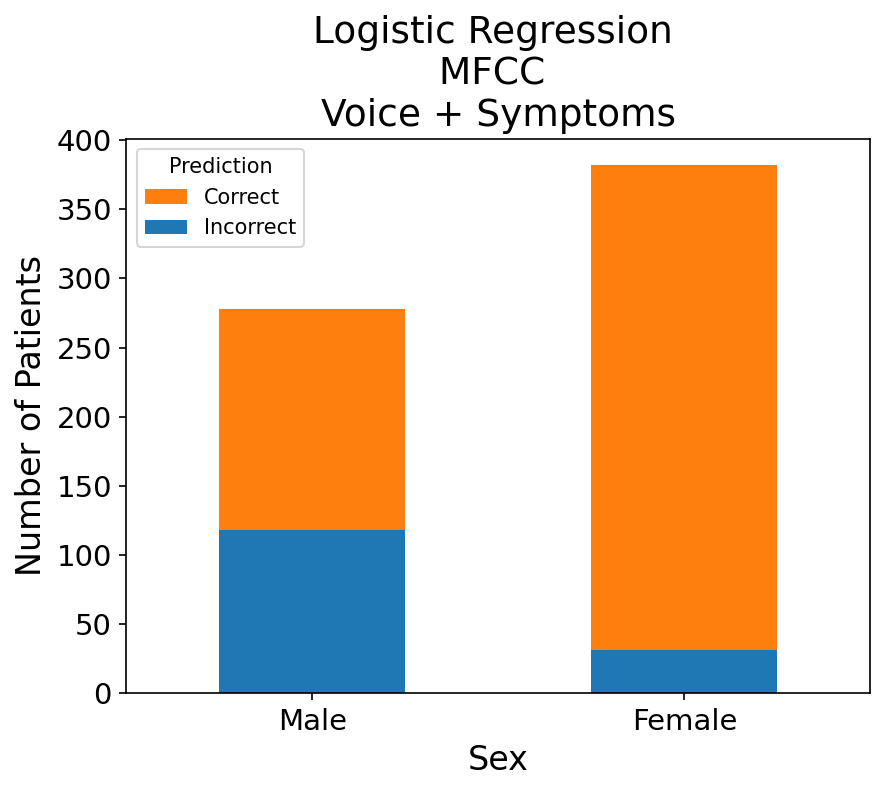

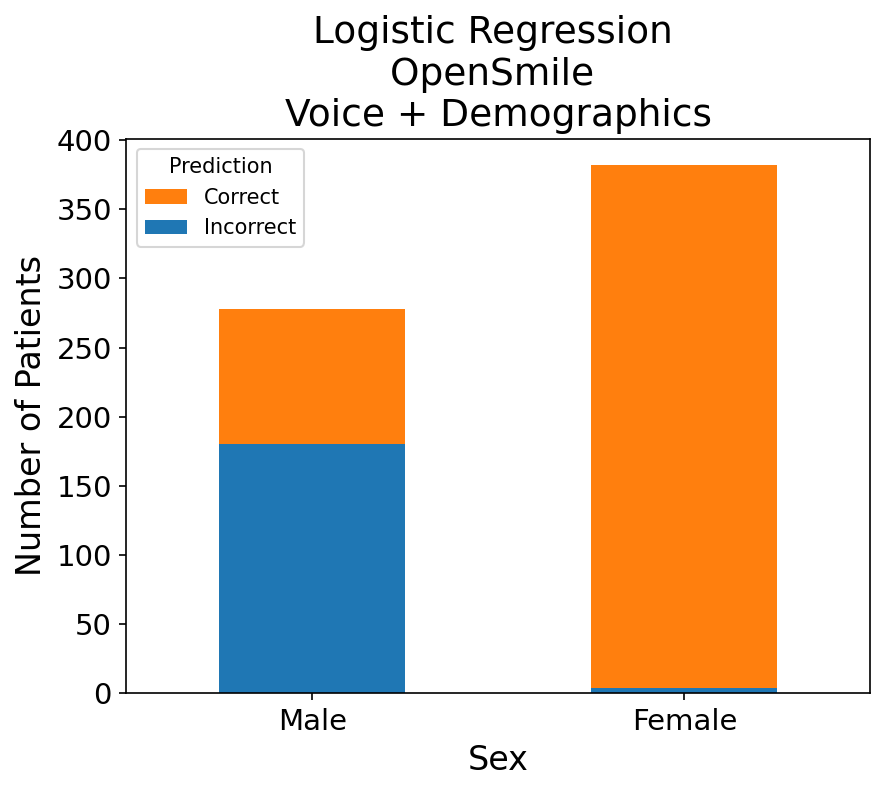

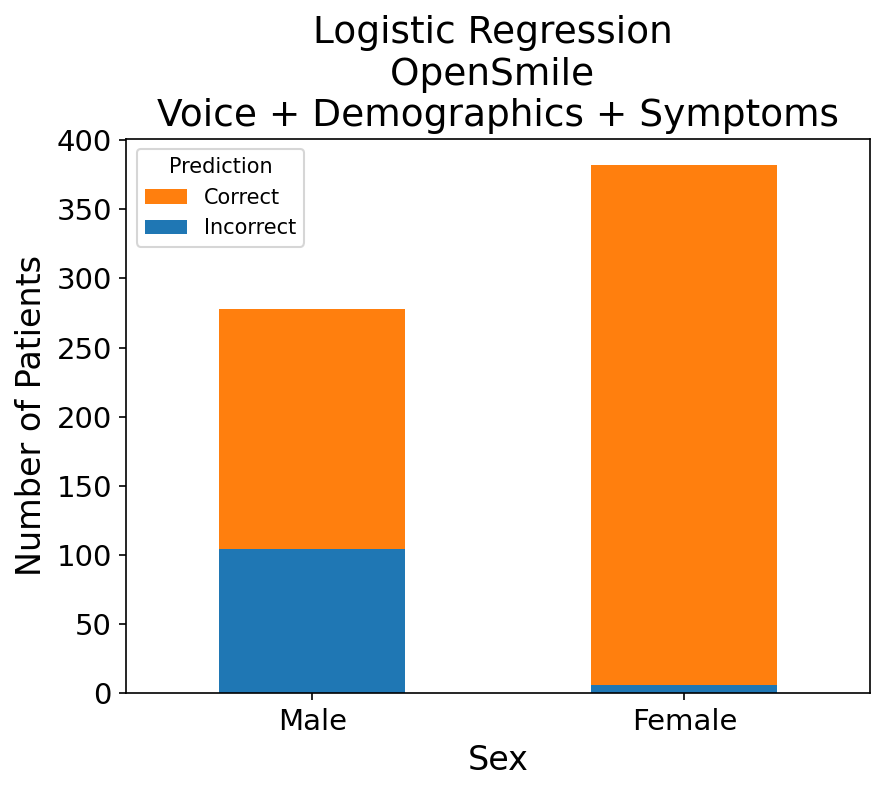

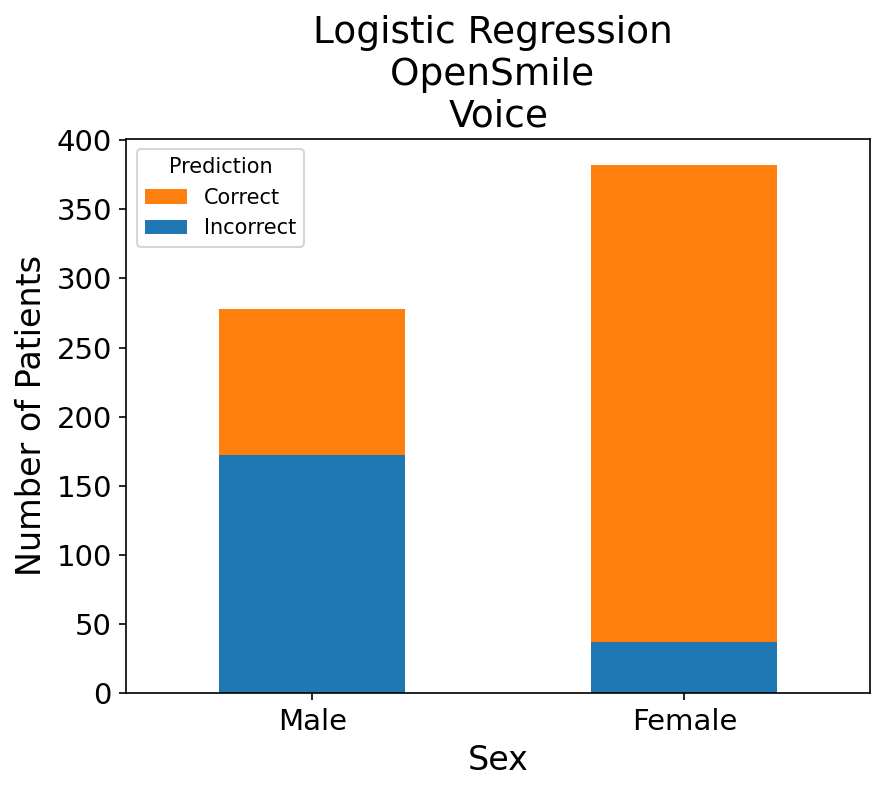

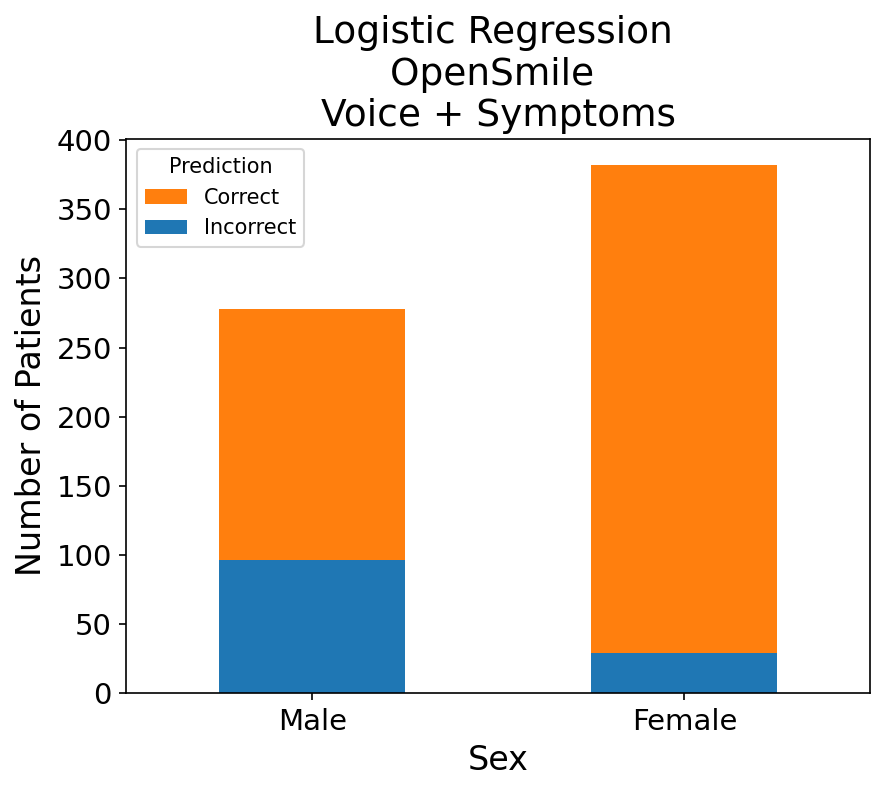

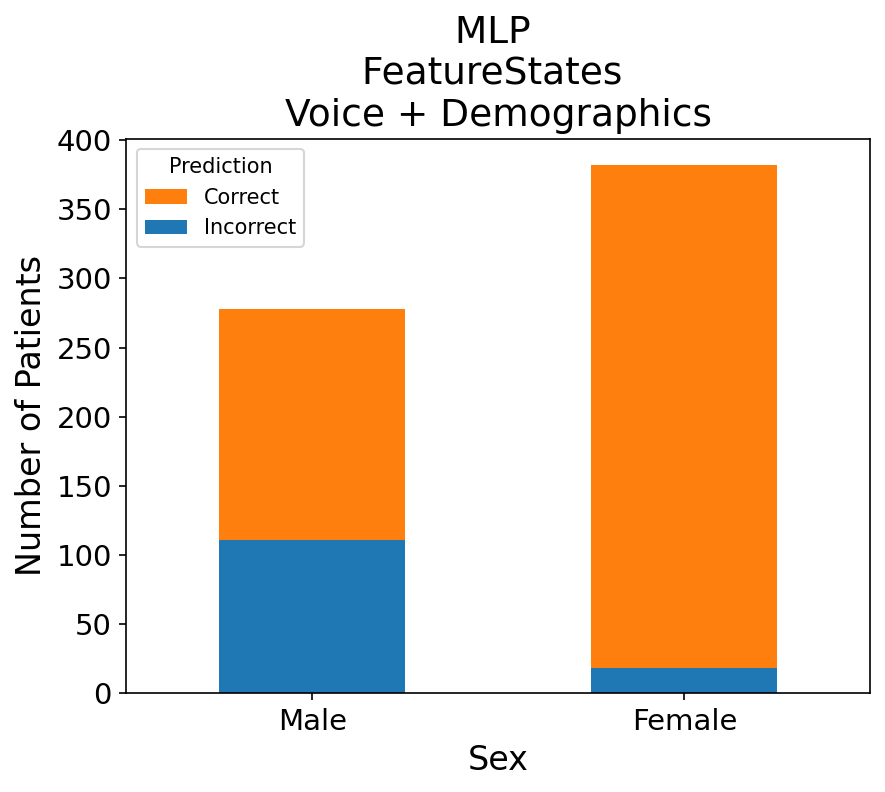

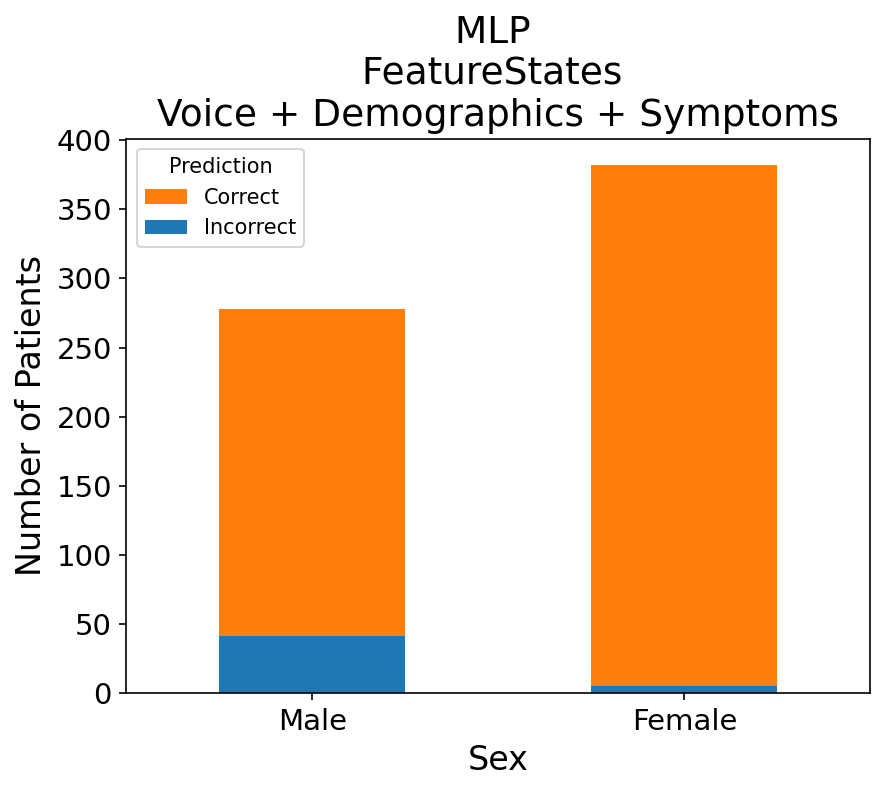

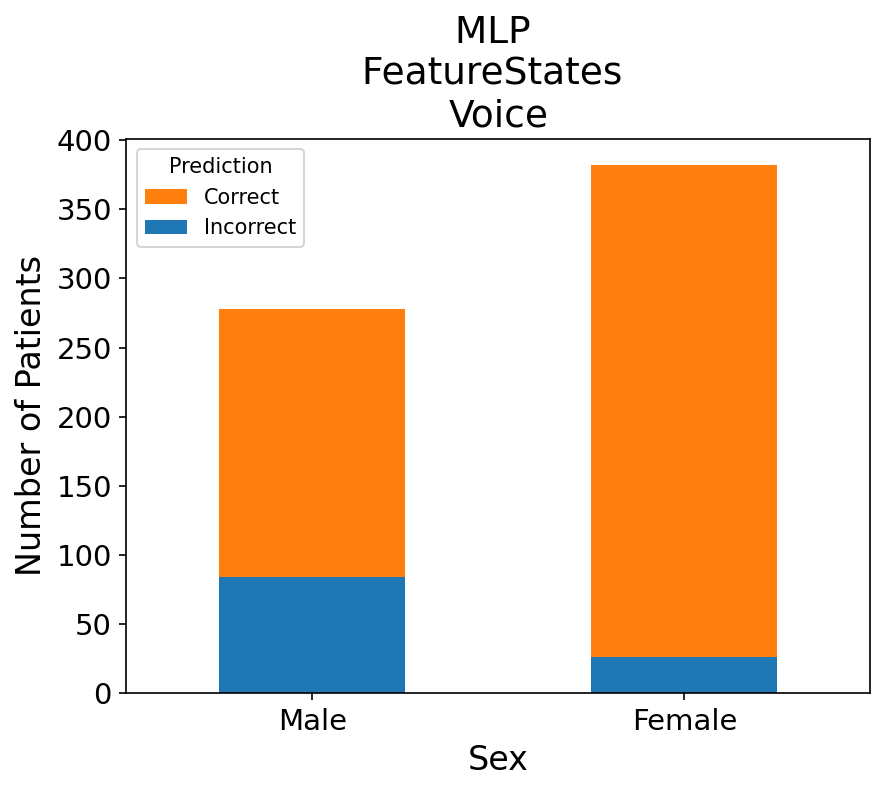

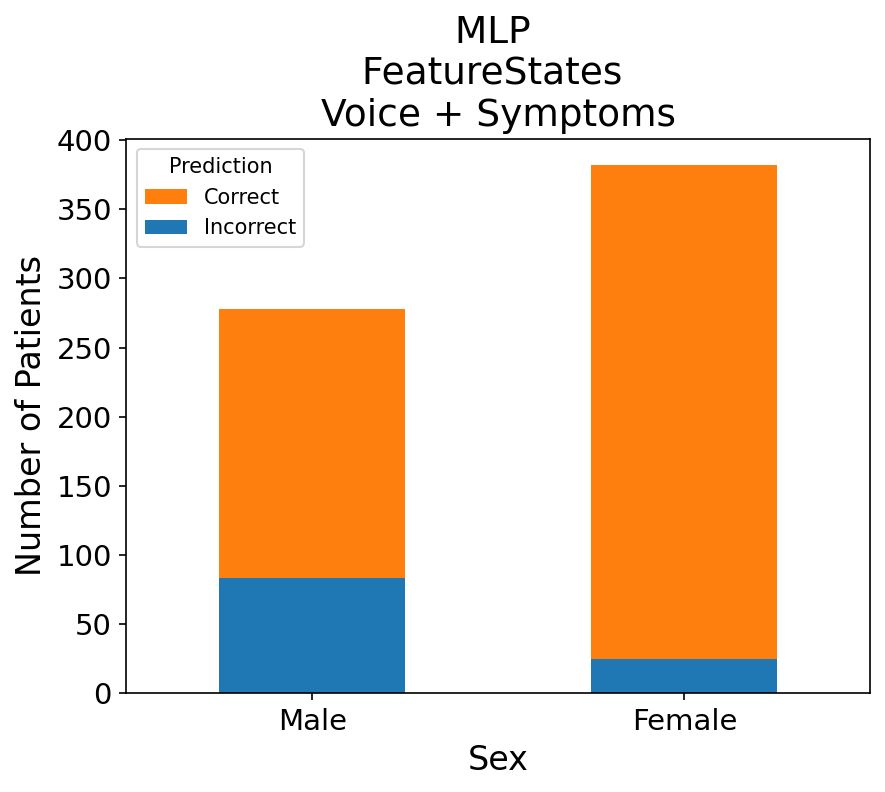

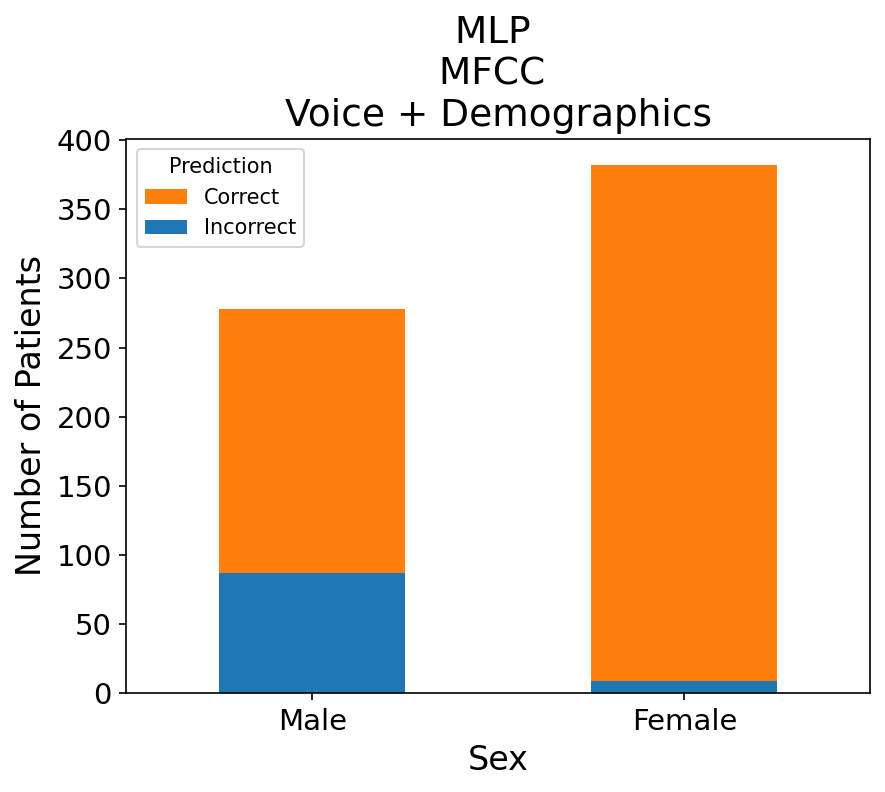

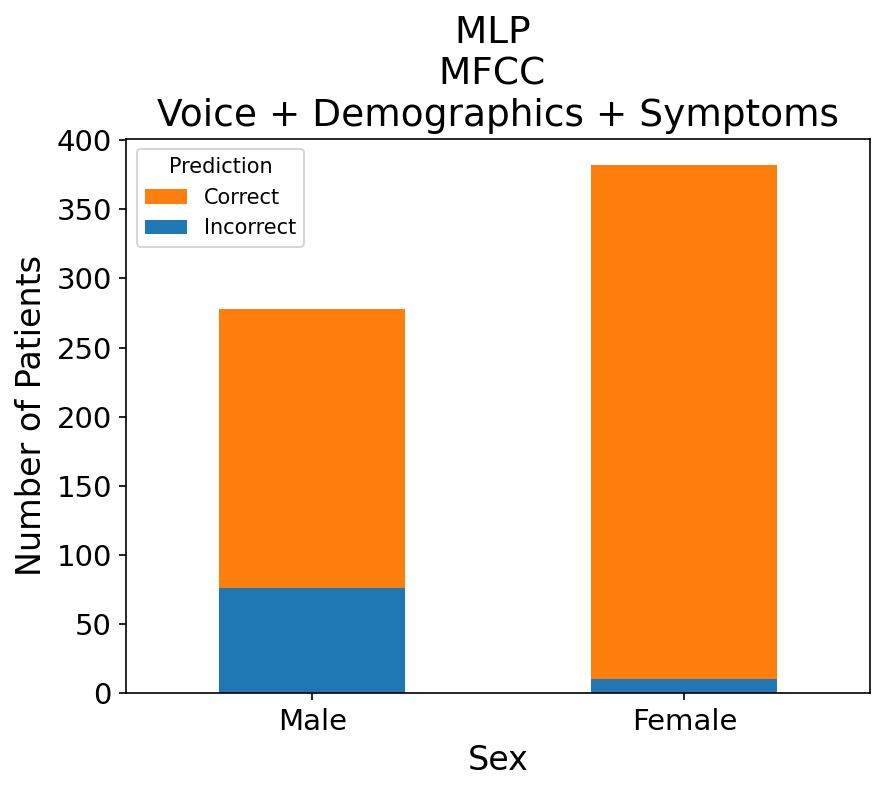

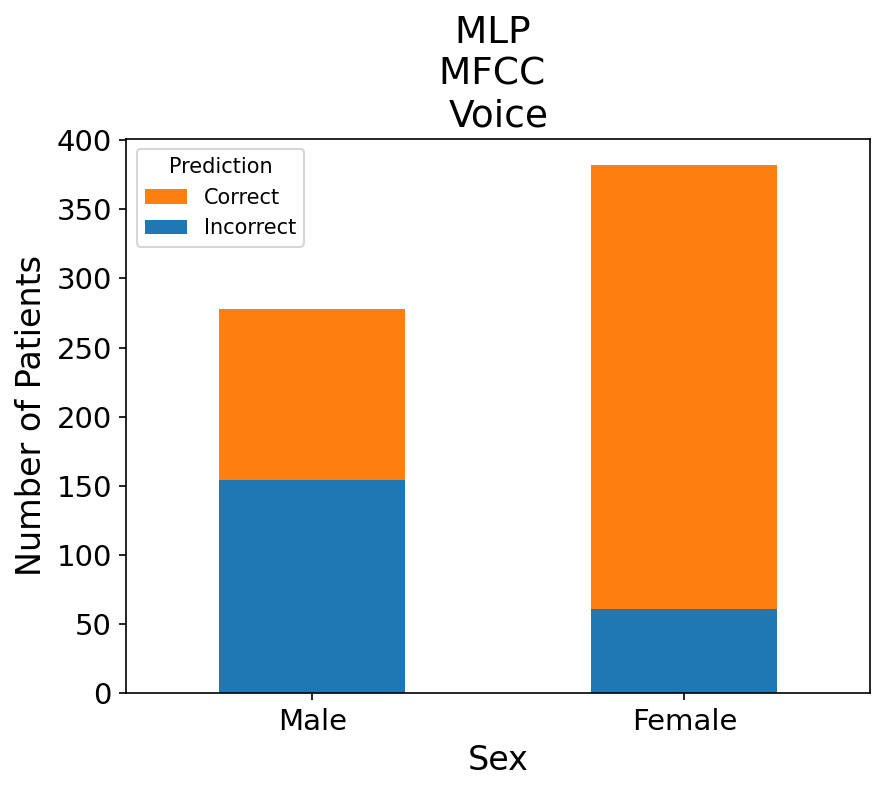

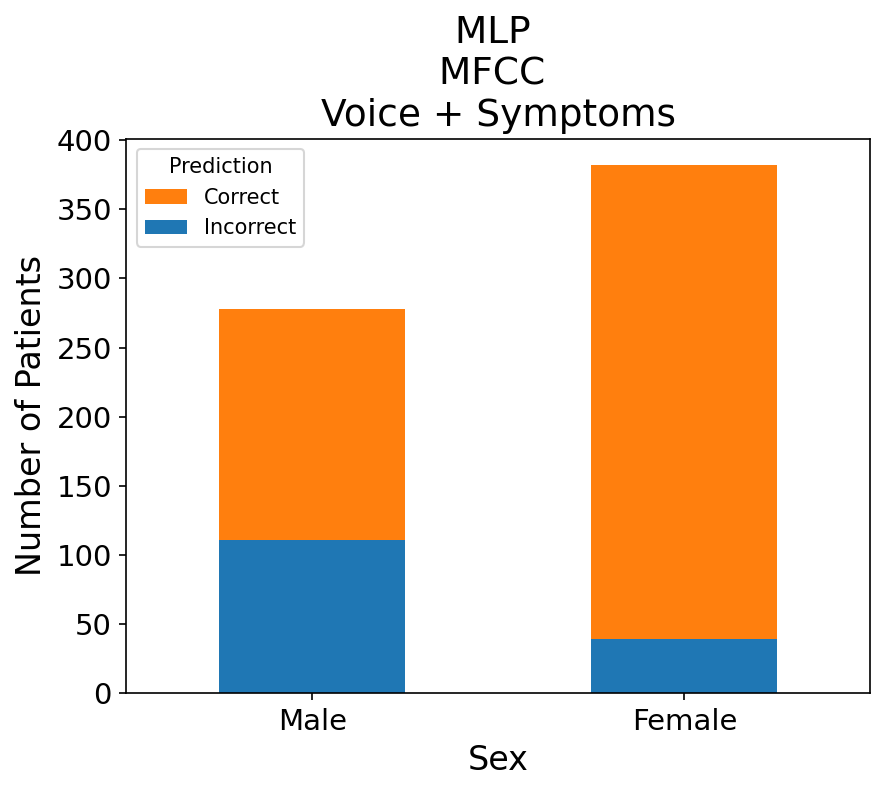

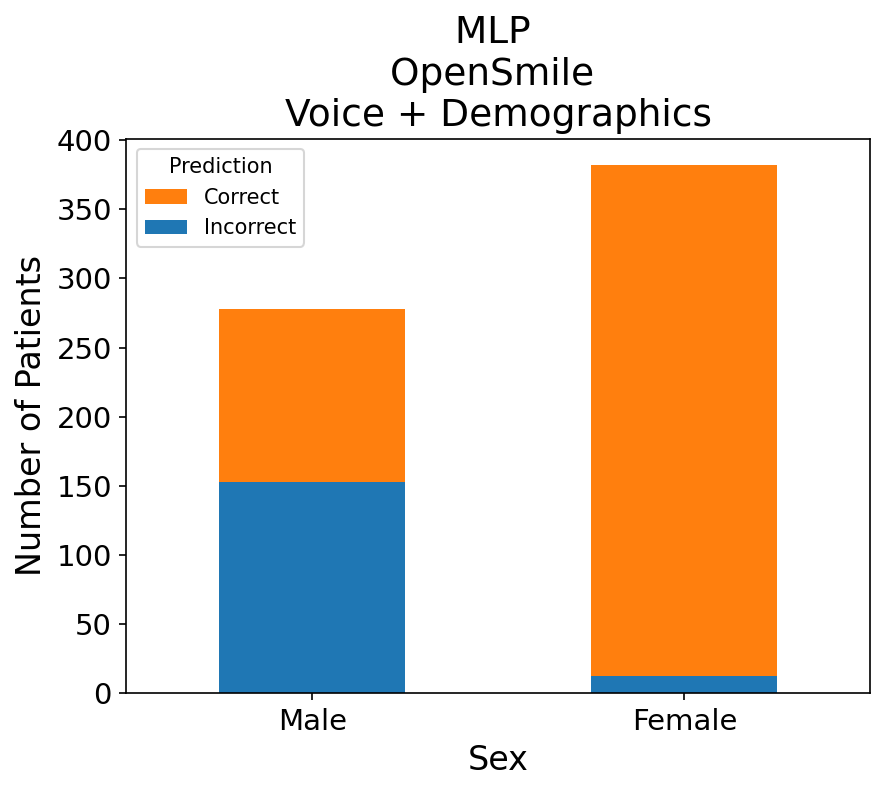

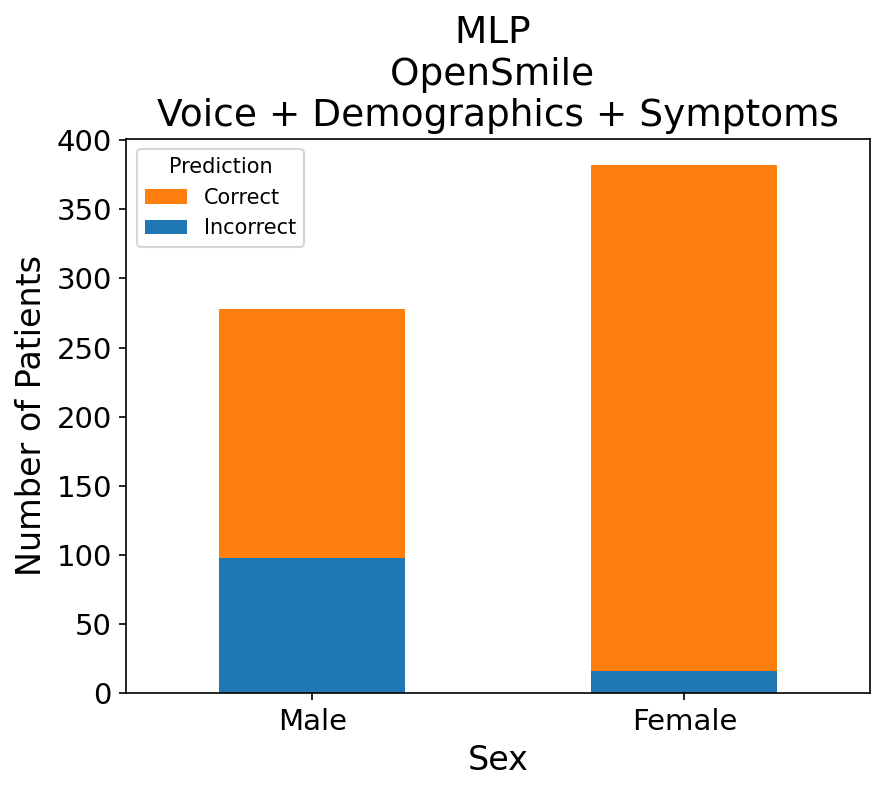

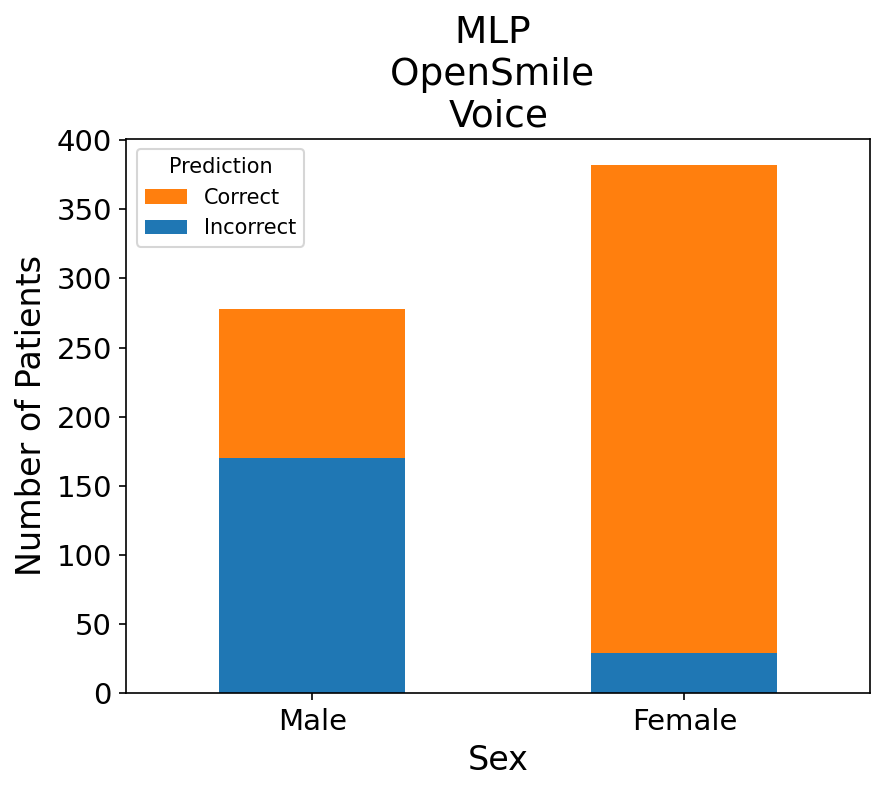

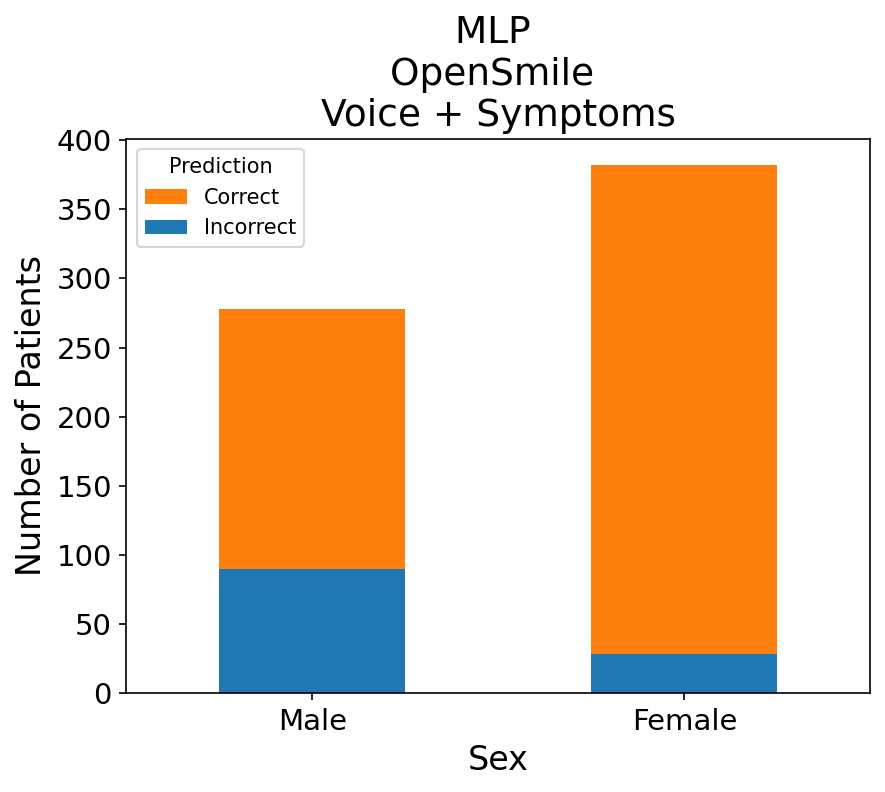

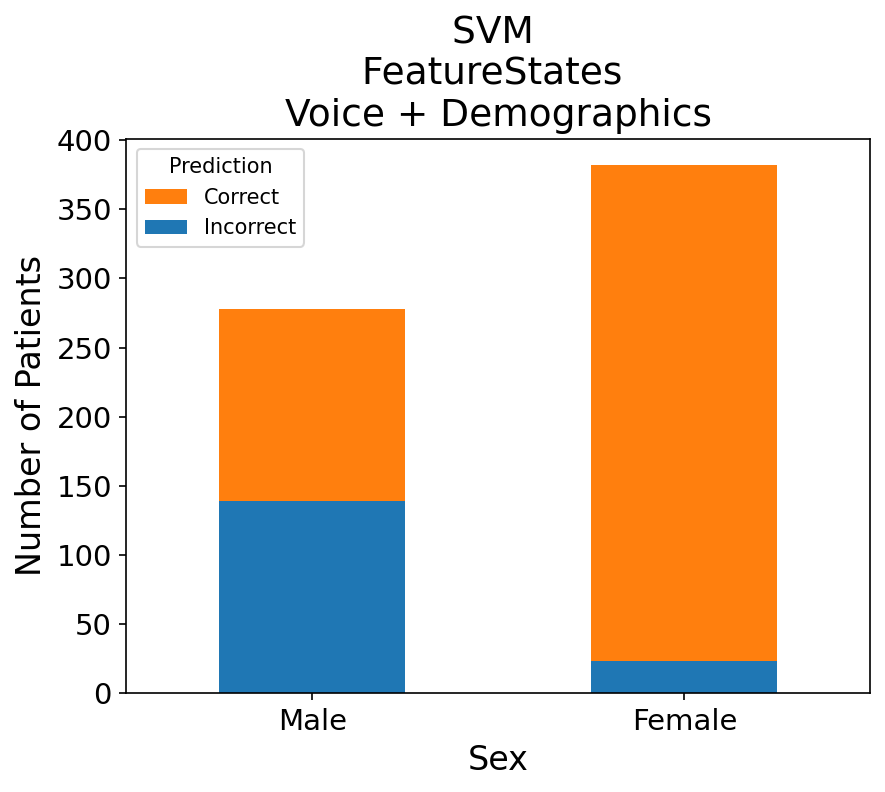

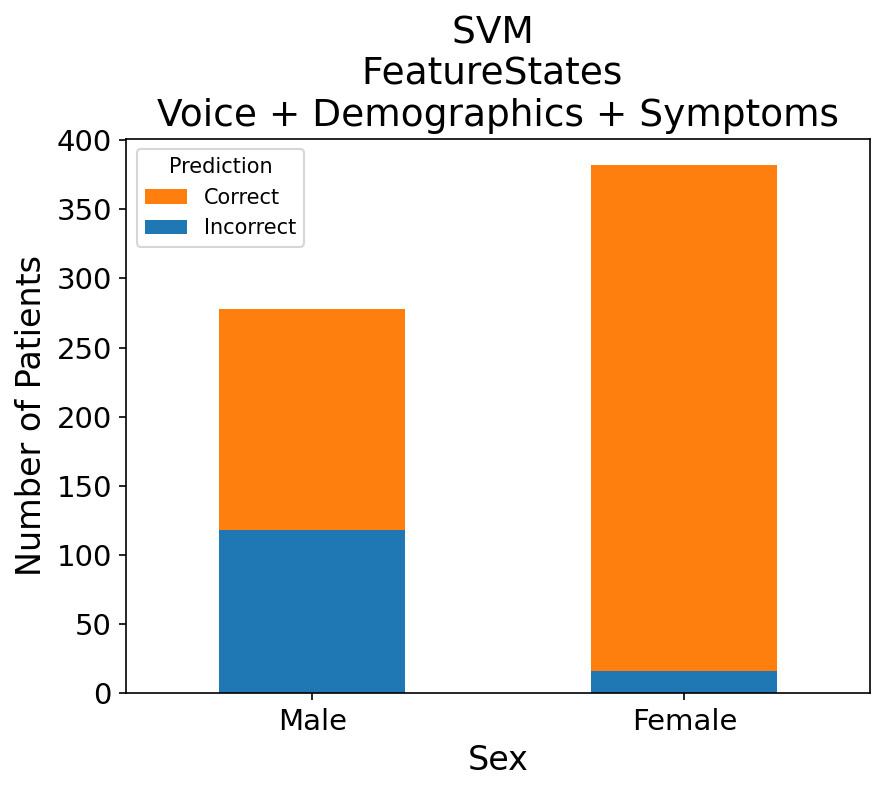

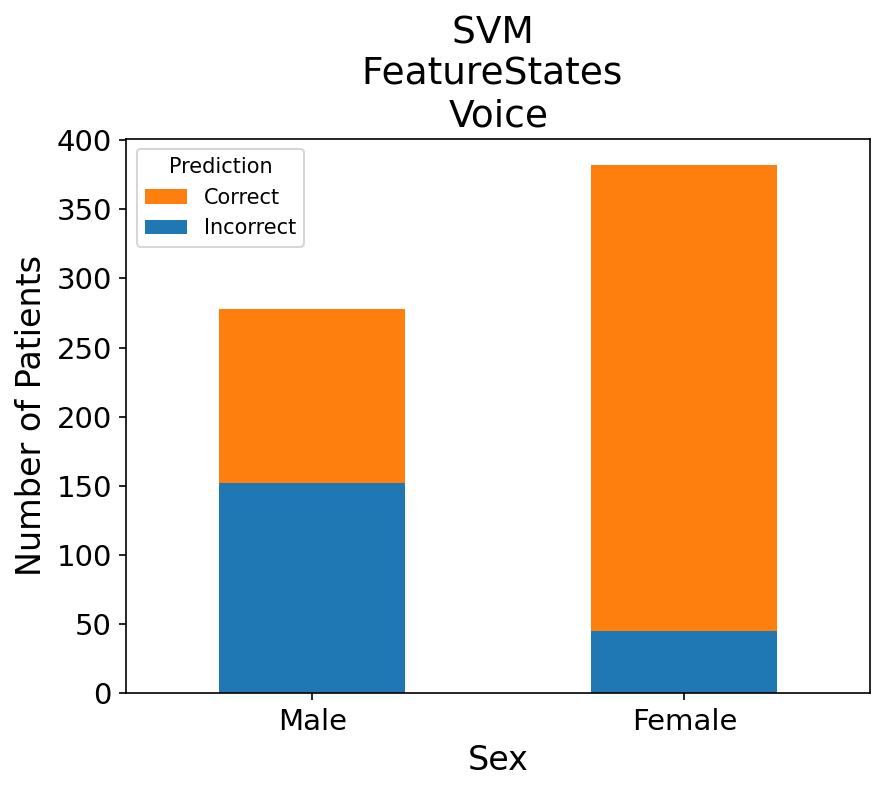

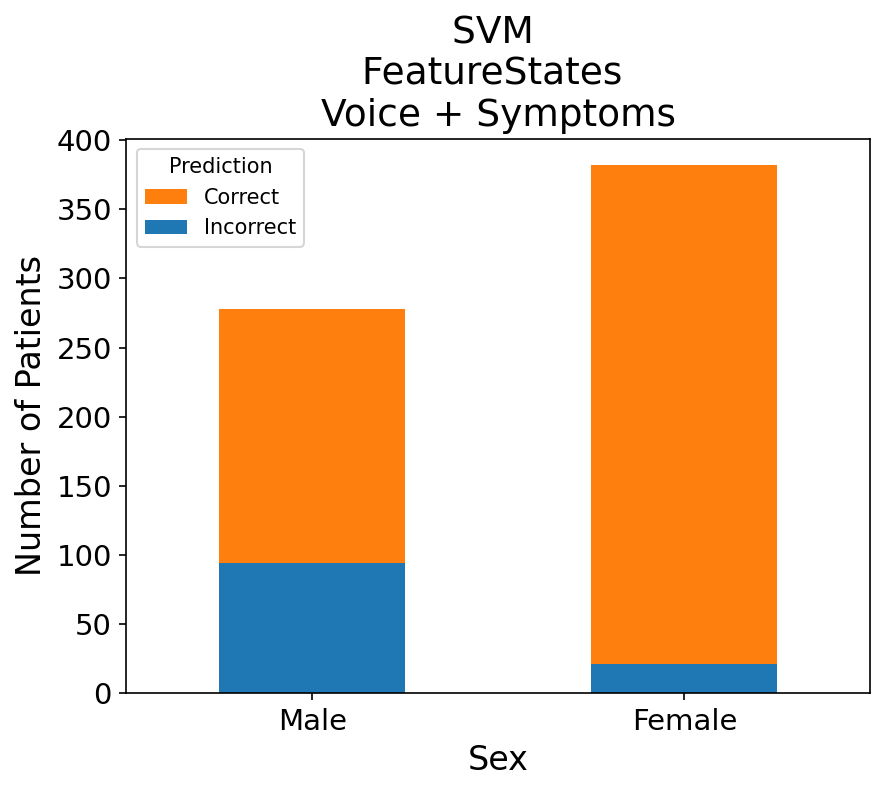

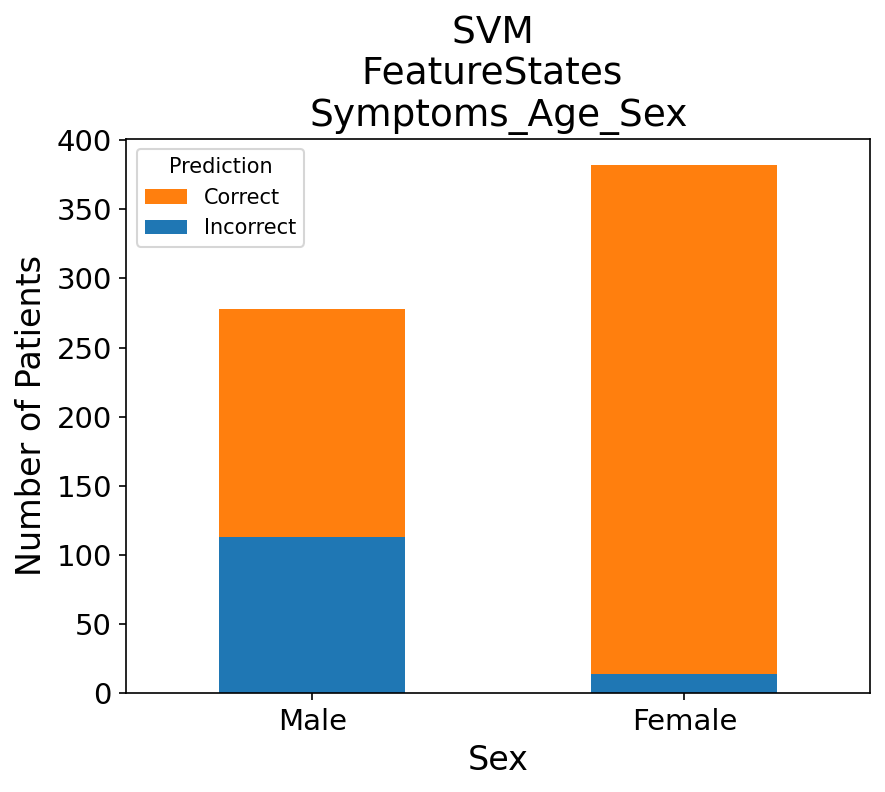

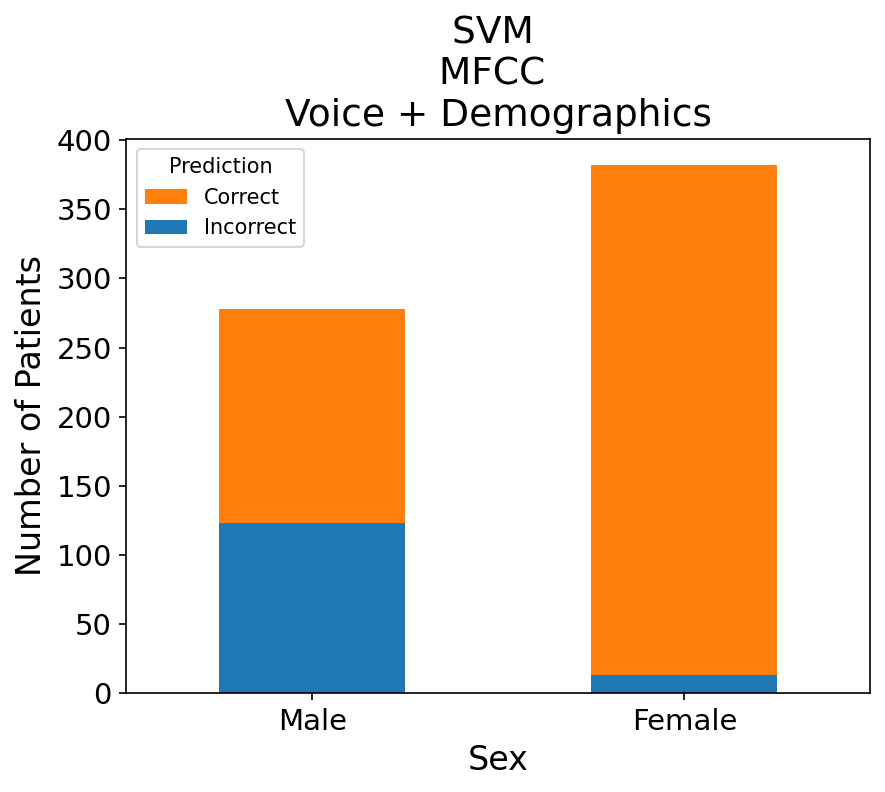

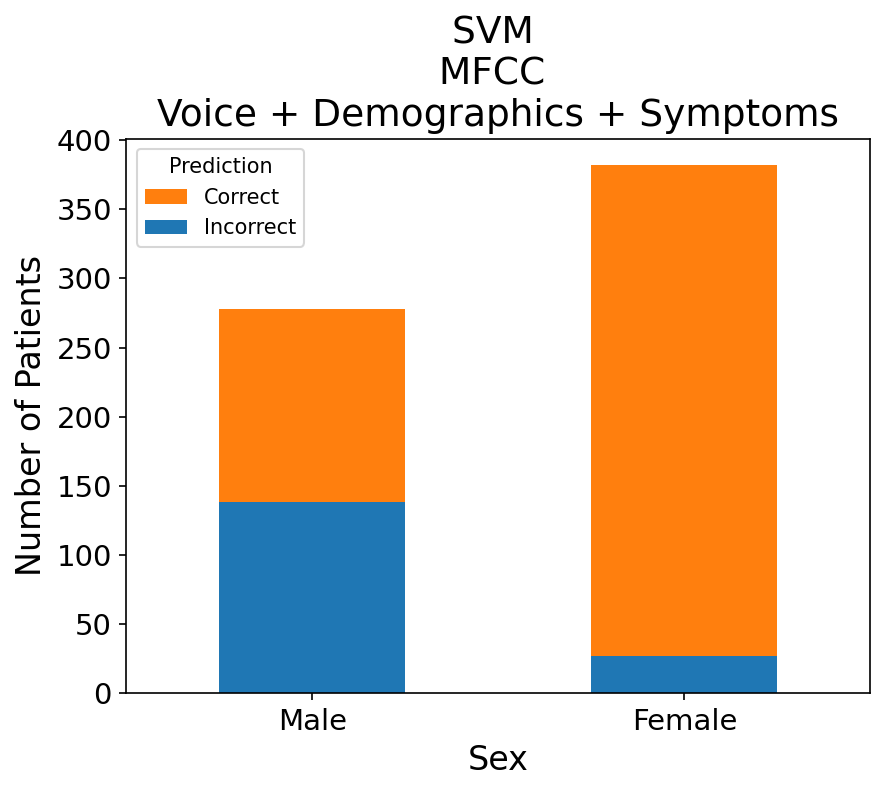

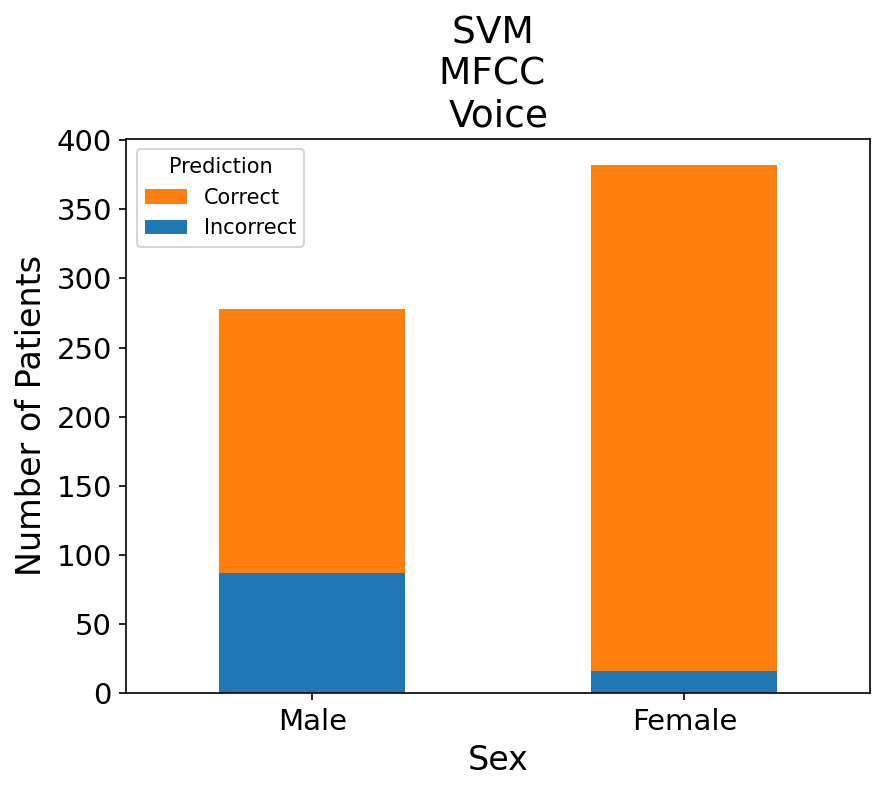

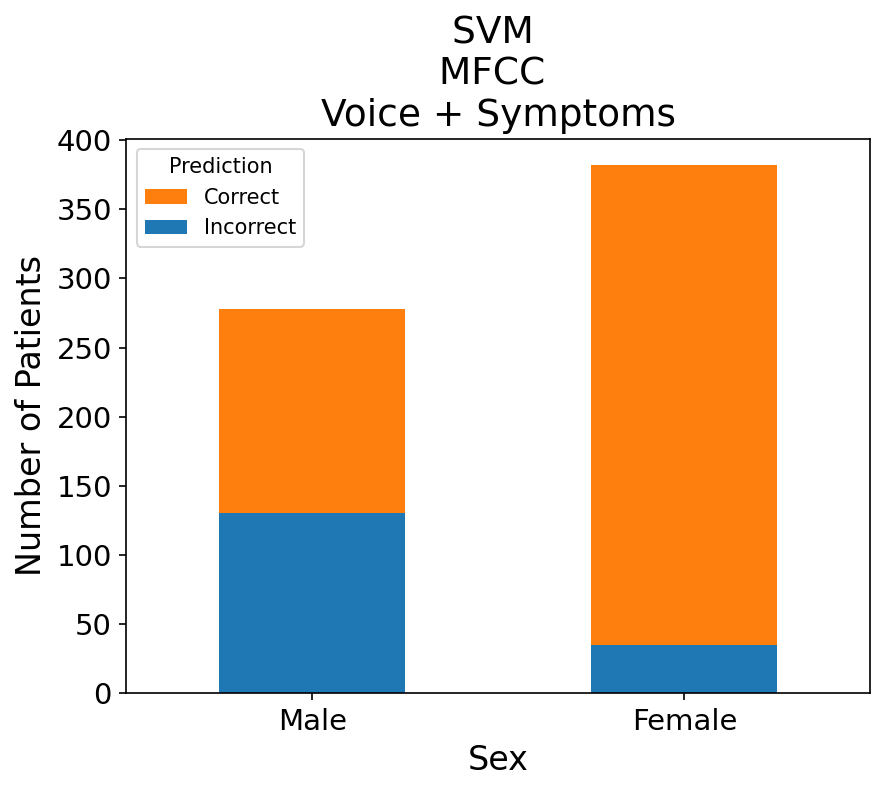

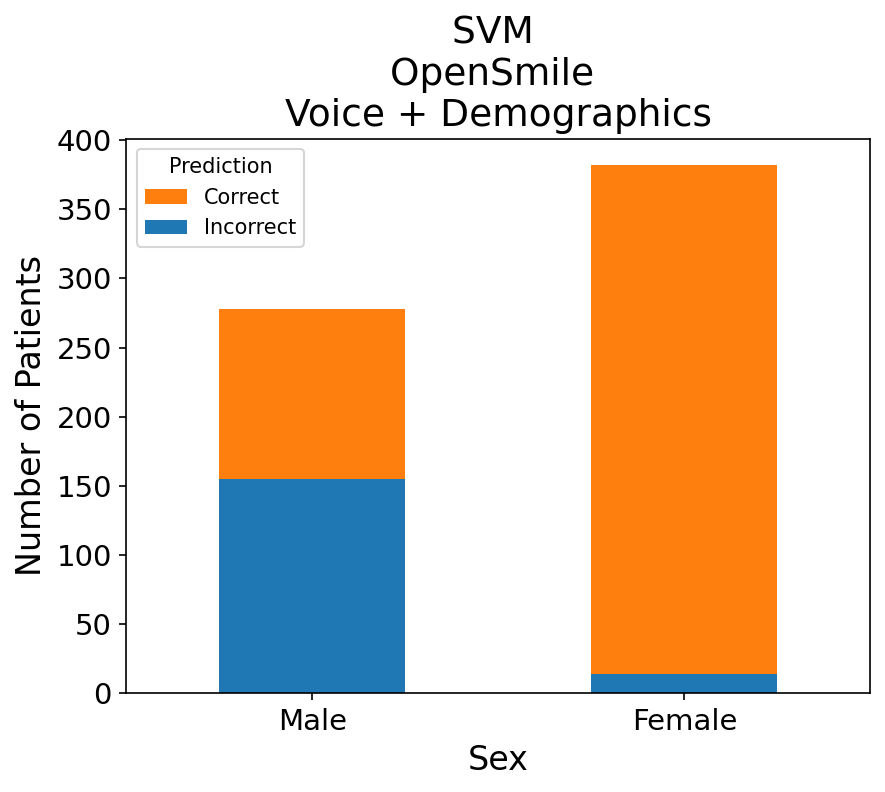

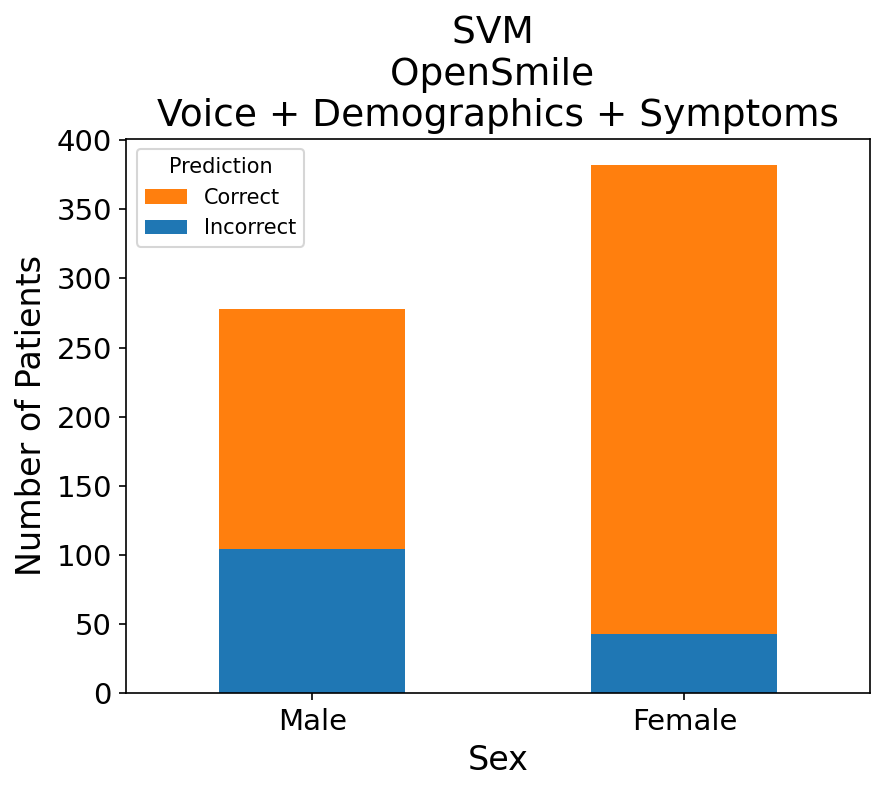

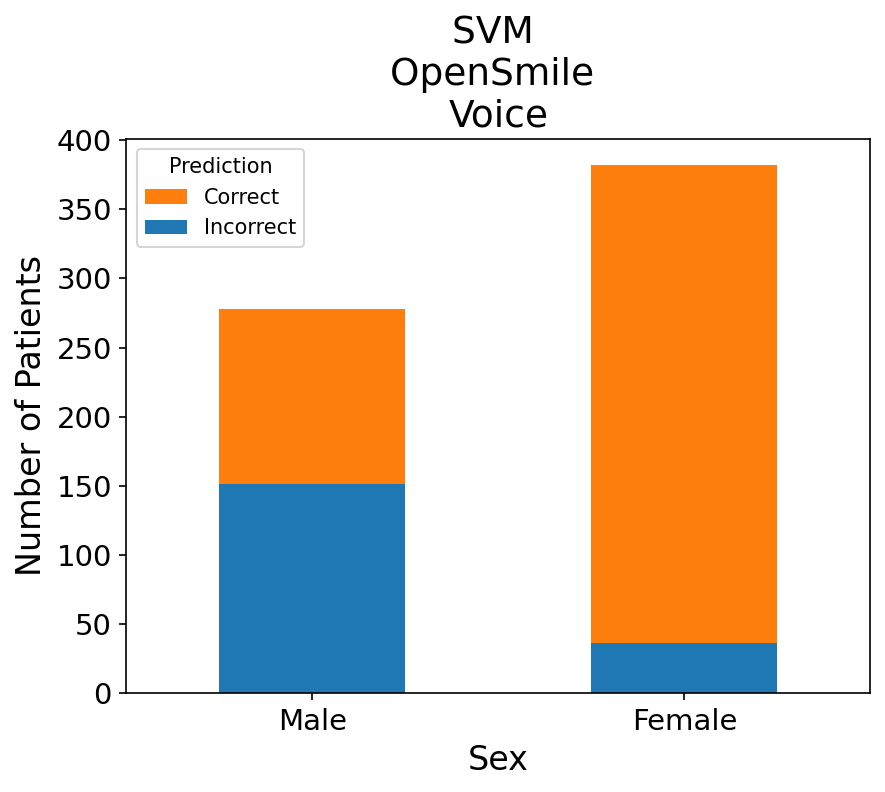

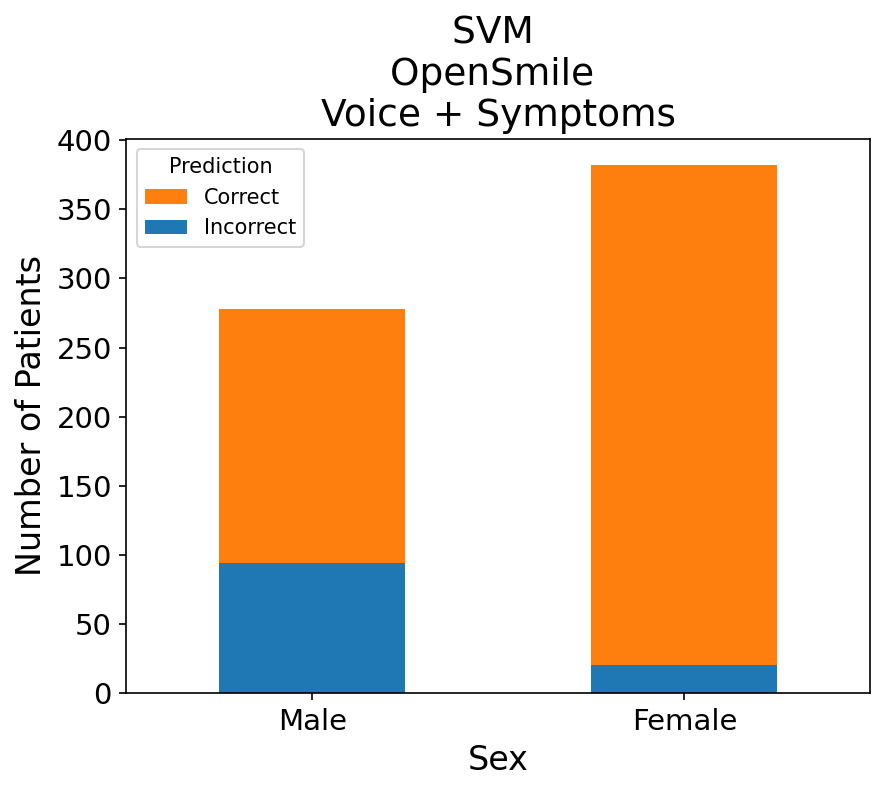

In [72]:
for file in os.listdir(model_dir):
    if file.endswith('.pkl'):
        test_cross_tab = pd.crosstab(results['Sex'], results[file])

        test_cross_tab.rename(index={1:'Male'},inplace=True)
        test_cross_tab.rename(index={2:'Female'},inplace=True)
        
        test_cross_tab.rename(columns={True:'Correct'},inplace=True)
        test_cross_tab.rename(columns={False:'Incorrect'},inplace=True)


        test_cross_tab.plot(kind='bar', stacked=True)
        plt.xticks(rotation=0)
        plt.legend(title='Prediction', reverse=True)

        model_name = file.split('.')[0]
        algorithm, feature, input_val = model_name.split('_', maxsplit=2)

        algorithm = algorithm_map[algorithm]

        try:
            input_val = input_map[input_val]
        except:
            pass
        
        title = f'{algorithm} \n{feature} \n{input_val}'
        plt.title(title)
        plt.ylabel('Number of Patients')

        plt.savefig(f'GenderPerformance/{model_name}.pdf')

        plt.show()

        
        # break

# T Test Age

In [76]:
from scipy.stats import ttest_ind, mannwhitneyu, ks_2samp

In [77]:
results = pd.merge(results, demographics[['filename', 'Age']], left_on = 'file', right_on='filename')
results = results.drop('filename', axis=1)

In [78]:
results

file ground truth  \
0                    Atrophy-0001apo       Benign   
1                    Atrophy-0400og6       Benign   
2                    Atrophy-0500cg6       Benign   
3                    Atrophy-0601ntf       Benign   
4                    Atrophy-07017ip       Benign   
..                               ...          ...   
655  Vocal process granuloma-1102tm6       Benign   
656  Vocal process granuloma-1201afa       Benign   
657  Vocal process granuloma-1201red       Benign   
658  Vocal process granuloma-1202o9e       Benign   
659  Vocal process granuloma-1302oif       Benign   

     LR_FeatureStates_Age_Sex.pkl  LR_FeatureStates_Age_Sex_Symptoms.pkl  \
0                            True                                   True   
1                            True                                   True   
2                            True                                  False   
3                           False                                  False   
4                            True                                   True   
..                            ...                                    ...   
655                          True                                   True   
656                          True                                   True   
657                          True                                  False   
658                         False                                  False   
659                          True                                   True   

     LR_FeatureStates_Rec_Only.pkl  LR_FeatureStates_Symptoms.pkl  \
0                             True                           True   
1                             True                           True   
2                             True                          False   
3                            False                          False   
4                             True                           True   
..                             ...                            ...   
655                           True                           True   
656                           True                           True   
657                           True                          False   
658                           True                          False   
659                           True                           True   

     LR_MFCC_Age_Sex.pkl  LR_MFCC_Age_Sex_Symptoms.pkl  LR_MFCC_Rec_Only.pkl  \
0                   True                          True                  True   
1                   True                         False                  True   
2                  False                         False                  True   
3                  False                         False                 False   
4                   True                          True                  True   
..                   ...                           ...                   ...   
655                 True                          True                  True   
656                 True                         False                 False   
657                 True                         False                  True   
658                False                         False                  True   
659                 True                          True                  True   

     LR_MFCC_Symptoms.pkl  ...  SVM_MFCC_Age_Sex.pkl  \
0                    True  ...                  True   
1                   False  ...                  True   
2                   False  ...                  True   
3                   False  ...                 False   
4                    True  ...                  True   
..                    ...  ...                   ...   
655                  True  ...                  True   
656                 False  ...                  True   
657                 False  ...                  True   
658                 False  ...                 False   
659                  True  ...                  True   

     SVM_MFCC_Age_S

In [79]:
age_results = pd.DataFrame(columns=['Model', 'T test', 'Mann Whitney', 'KS'])

In [80]:
for file in os.listdir(model_dir):
    if file.endswith('.pkl'):
        correct_ages = list(results[results[file]==True]['Age'])
        incorrect_ages = list(results[results[file]==False]['Age'])

        t_stat, p_ttest = ttest_ind(correct_ages, incorrect_ages)
        u_stat, p_mannwhitney = mannwhitneyu(correct_ages, incorrect_ages)
        ks_stat, p_ks = ks_2samp(correct_ages, incorrect_ages)

        age_results.loc[len(age_results)] = [file, p_ttest, p_mannwhitney, p_ks]

In [83]:
age_results[['Algorithm', 'Feature', 'Input']] = age_results['Model'].str.split('_', n=2, expand=True)
age_results['Input'] = age_results['Input'].str.split('.', expand=True)[0]
age_results = age_results.replace({"Input": input_map})
age_results.head()

Model        T test  Mann Whitney  \
0           LR_FeatureStates_Age_Sex.pkl  2.790950e-18  1.780814e-17   
1  LR_FeatureStates_Age_Sex_Symptoms.pkl  3.948451e-31  3.153156e-28   
2          LR_FeatureStates_Rec_Only.pkl  2.973727e-12  2.236572e-12   
3          LR_FeatureStates_Symptoms.pkl  7.769661e-10  4.153492e-10   
4                    LR_MFCC_Age_Sex.pkl  3.823221e-28  3.987315e-26   

             KS Algorithm        Feature                            Input  
0  1.845033e-16        LR  FeatureStates             Voice + Demographics  
1  1.415991e-26        LR  FeatureStates  Voice + Demographics + Symptoms  
2  1.551895e-12        LR  FeatureStates                            Voice  
3  1.568856e-09        LR  FeatureStates                 Voice + Symptoms  
4  7.388467e-22        LR           MFCC             Voice + Demographics

In [84]:
models = ['SVM']*4 + ['NN']*4 + ['LR']*4
print(models)
print(len(models))

['SVM', 'SVM', 'SVM', 'SVM', 'NN', 'NN', 'NN', 'NN', 'LR', 'LR', 'LR', 'LR']
12


In [85]:
input_values = ['Voice', 'Voice + Demographics', 'Voice + Symptoms', 'Voice + Demographics + Symptoms']*3
print(input_values)
print(len(input_values))

['Voice', 'Voice + Demographics', 'Voice + Symptoms', 'Voice + Demographics + Symptoms', 'Voice', 'Voice + Demographics', 'Voice + Symptoms', 'Voice + Demographics + Symptoms', 'Voice', 'Voice + Demographics', 'Voice + Symptoms', 'Voice + Demographics + Symptoms']
12


In [86]:
results_table = pd.DataFrame(columns = ['FeatureStates', 'OpenSmile', 'MFCC'], index=[models, input_values])

In [87]:
for idx, row in age_results.iterrows():
    
    model = row['Algorithm']
    feature = row['Feature']
    input_val = row['Input']
    print(model, feature, input_val, feature)
    p_value = row['T test']

    if model in results_table.index.get_level_values(0) and input_val in results_table.index.get_level_values(1) and feature in results_table.columns:
        results_table.at[(model, input_val), feature] = p_value

LR FeatureStates Voice + Demographics FeatureStates
LR FeatureStates Voice + Demographics + Symptoms FeatureStates
LR FeatureStates Voice FeatureStates
LR FeatureStates Voice + Symptoms FeatureStates
LR MFCC Voice + Demographics MFCC
LR MFCC Voice + Demographics + Symptoms MFCC
LR MFCC Voice MFCC
LR MFCC Voice + Symptoms MFCC
LR OpenSmile Voice + Demographics OpenSmile
LR OpenSmile Voice + Demographics + Symptoms OpenSmile
LR OpenSmile Voice OpenSmile
LR OpenSmile Voice + Symptoms OpenSmile
NN FeatureStates Voice + Demographics FeatureStates
NN FeatureStates Voice + Demographics + Symptoms FeatureStates
NN FeatureStates Voice FeatureStates
NN FeatureStates Voice + Symptoms FeatureStates
NN MFCC Voice + Demographics MFCC
NN MFCC Voice + Demographics + Symptoms MFCC
NN MFCC Voice MFCC
NN MFCC Voice + Symptoms MFCC
NN OpenSmile Voice + Demographics OpenSmile
NN OpenSmile Voice + Demographics + Symptoms OpenSmile
NN OpenSmile Voice OpenSmile
NN OpenSmile Voice + Symptoms OpenSmile
SVM Feat

In [88]:
print(results_table.to_latex(float_format="%.2e"))

\begin{tabular}{lllll}
\toprule
 &  & FeatureStates & OpenSmile & MFCC \\
\midrule
\multirow[t]{4}{*}{SVM} & Voice & 1.75e-11 & 1.39e-05 & 6.15e-04 \\
 & Voice + Demographics & 3.70e-23 & 2.33e-28 & 2.40e-29 \\
 & Voice + Symptoms & 9.17e-10 & 6.89e-06 & 1.52e-06 \\
 & Voice + Demographics + Symptoms & 1.34e-20 & 8.40e-20 & 9.08e-13 \\
\cline{1-5}
\multirow[t]{4}{*}{NN} & Voice & 2.19e-07 & 7.57e-05 & 1.23e-04 \\
 & Voice + Demographics & 4.84e-14 & 7.02e-27 & 7.61e-21 \\
 & Voice + Symptoms & 6.45e-06 & 9.45e-05 & 1.74e-04 \\
 & Voice + Demographics + Symptoms & 3.43e-09 & 3.86e-13 & 7.52e-11 \\
\cline{1-5}
\multirow[t]{4}{*}{LR} & Voice & 2.97e-12 & 7.09e-04 & 1.77e-02 \\
 & Voice + Demographics & 2.79e-18 & 8.65e-33 & 3.82e-28 \\
 & Voice + Symptoms & 7.77e-10 & 2.11e-10 & 4.94e-07 \\
 & Voice + Demographics + Symptoms & 3.95e-31 & 5.60e-21 & 7.10e-13 \\
\cline{1-5}
\bottomrule
\end{tabular}



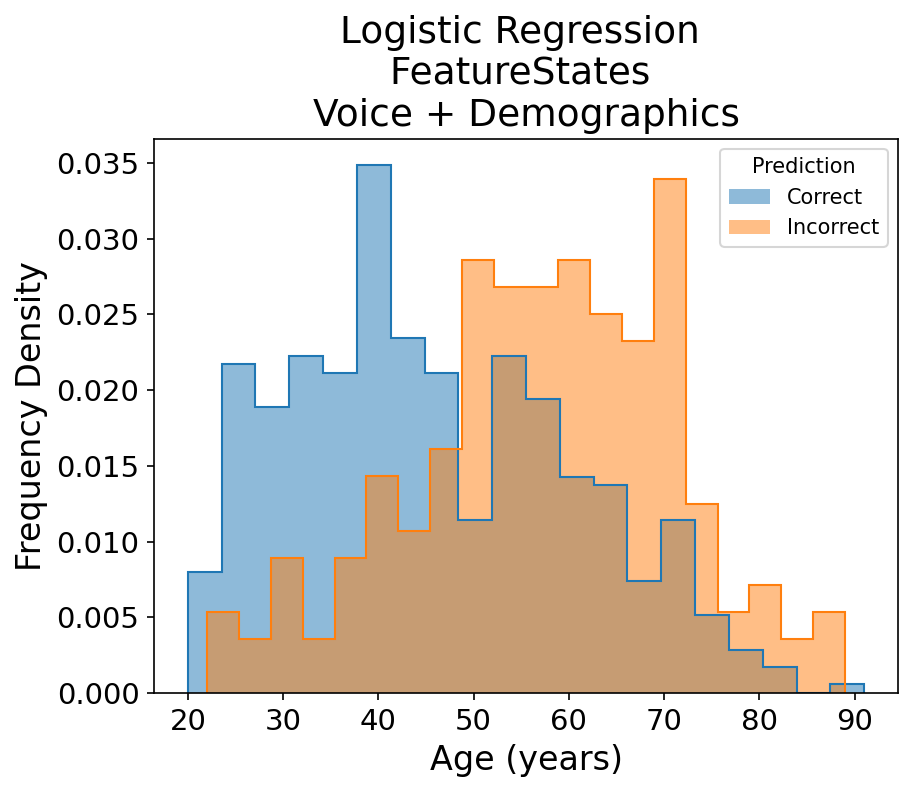

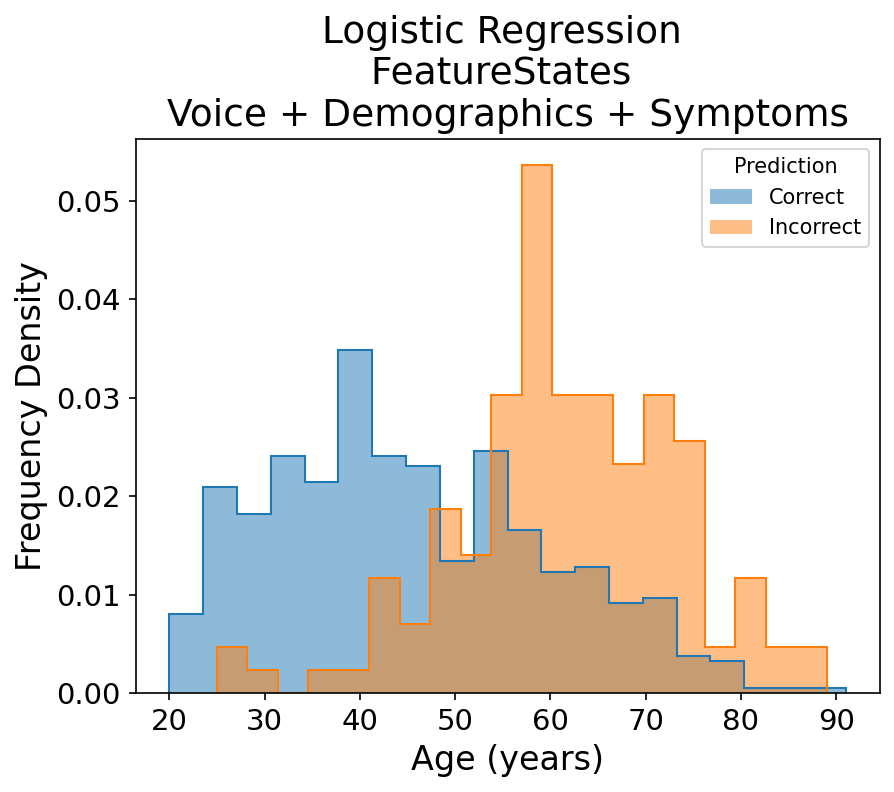

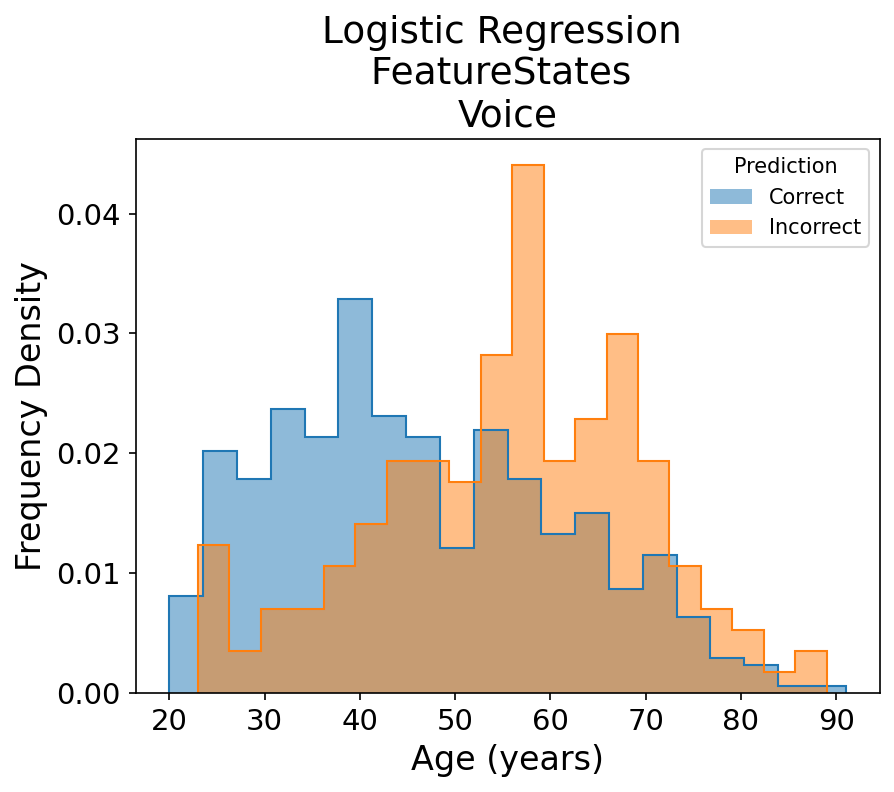

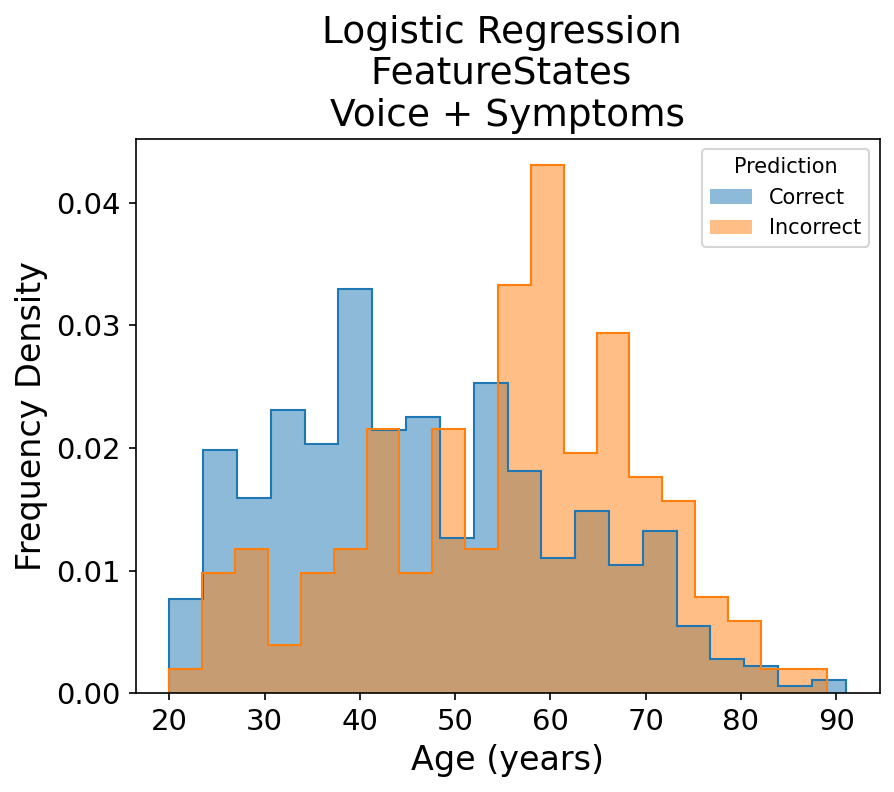

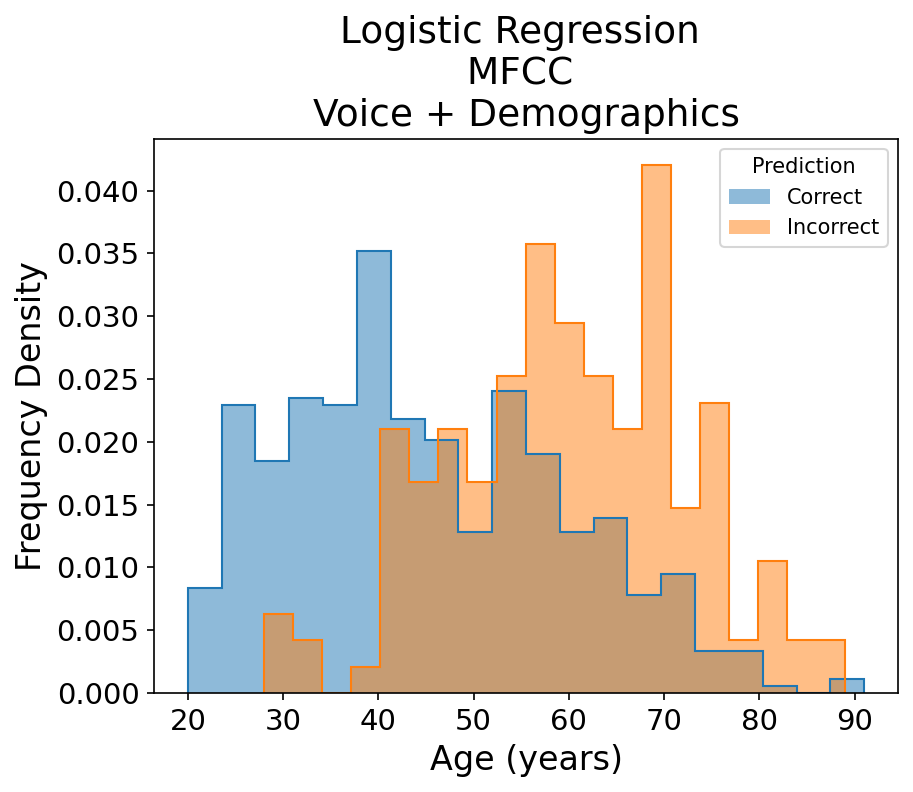

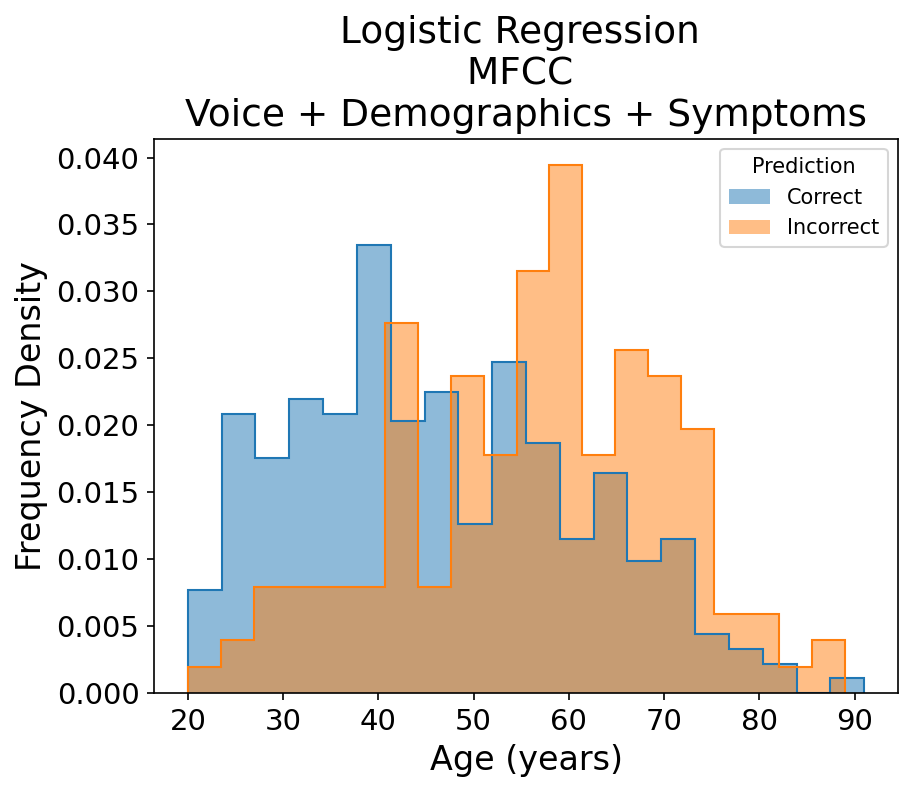

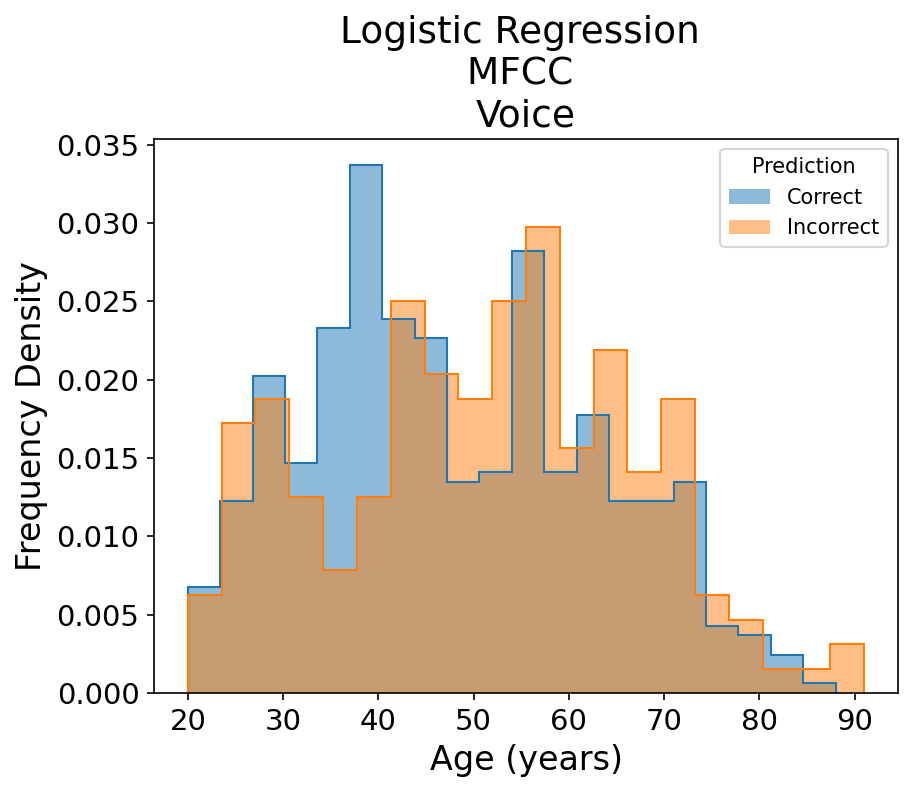

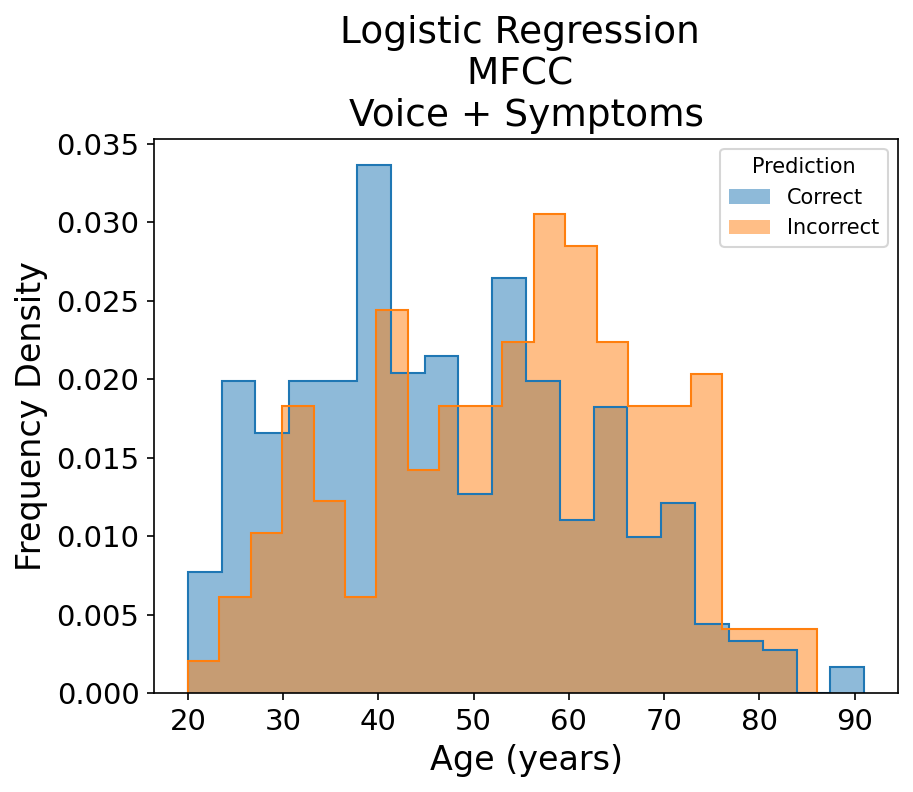

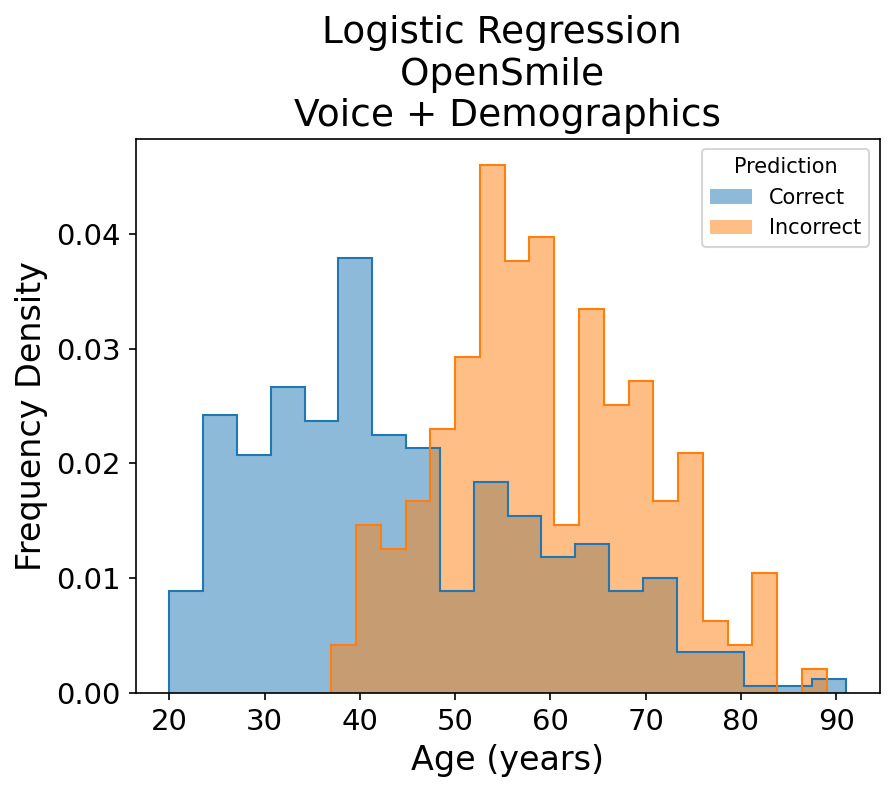

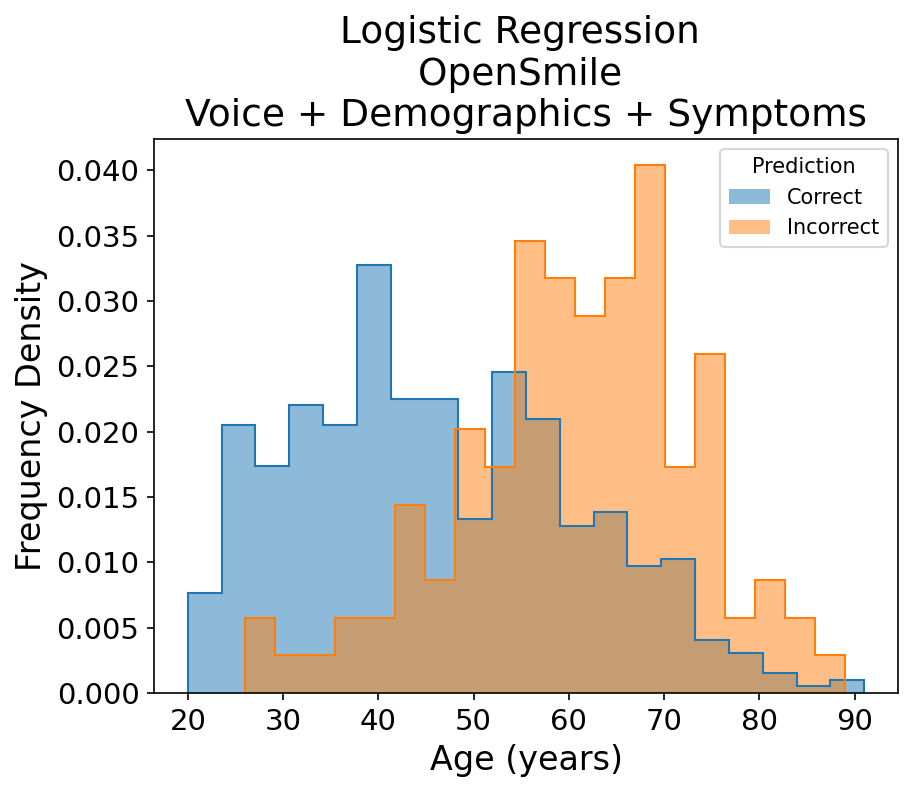

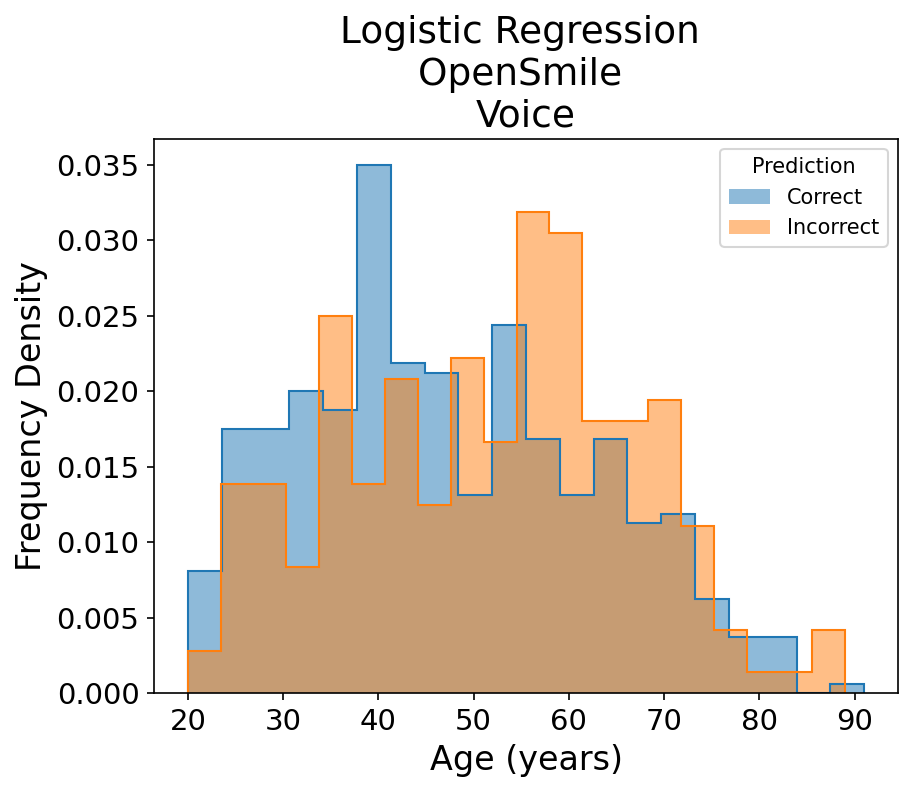

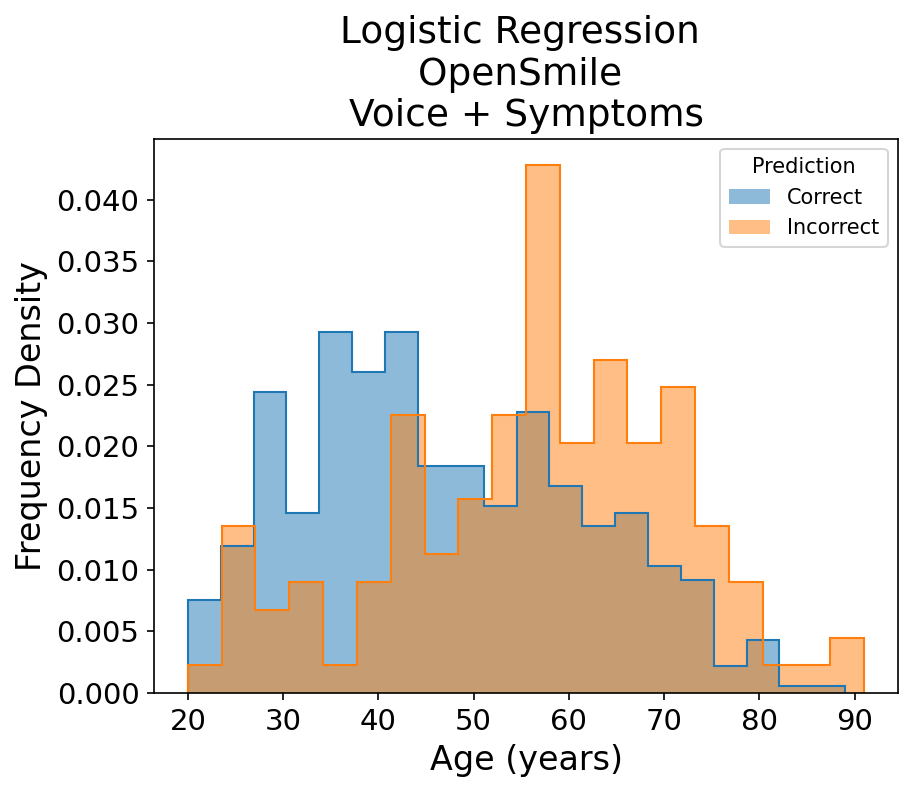

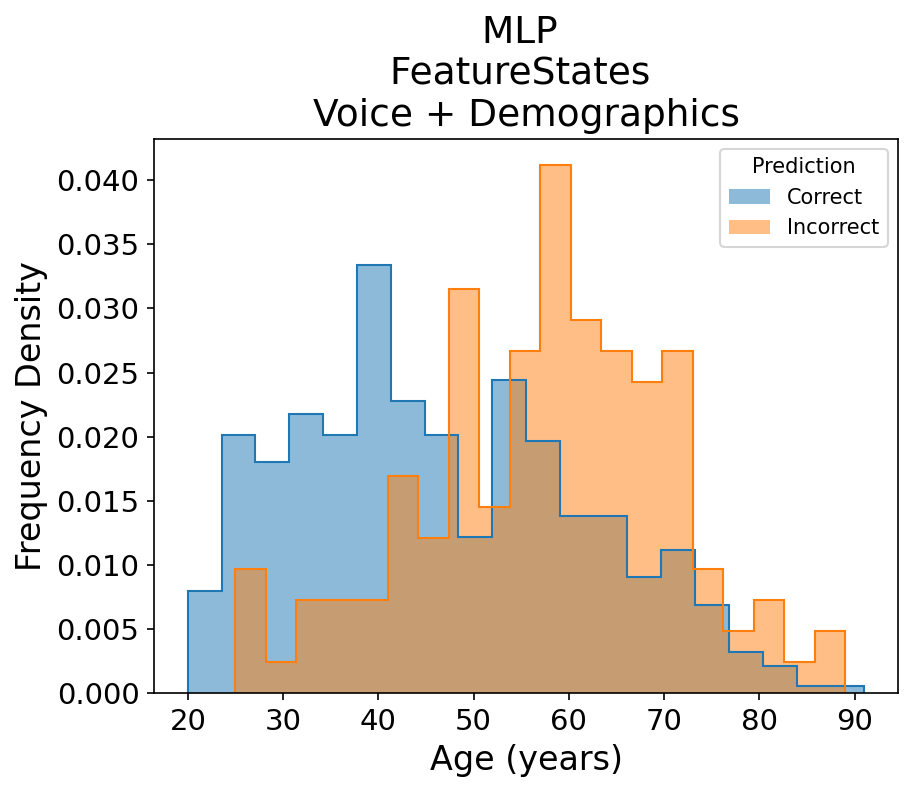

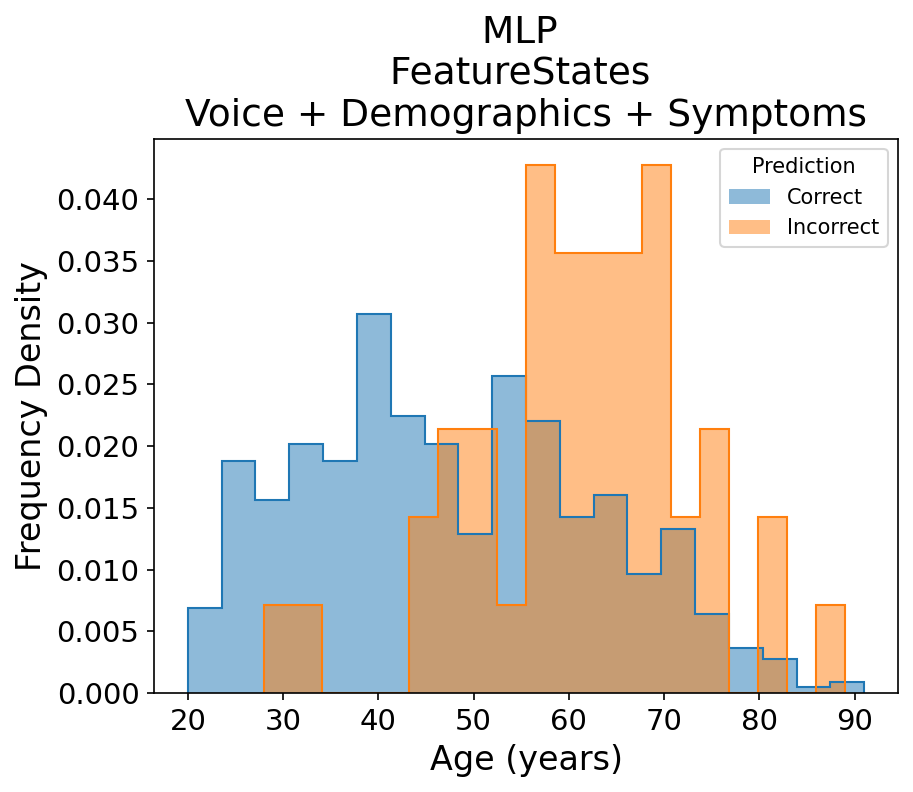

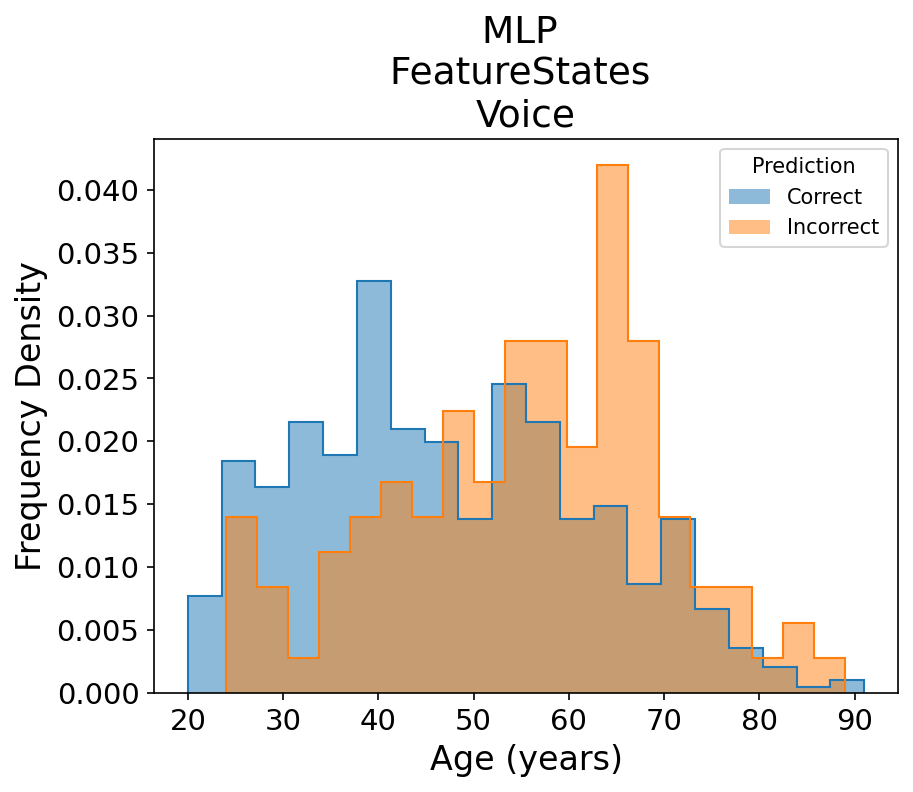

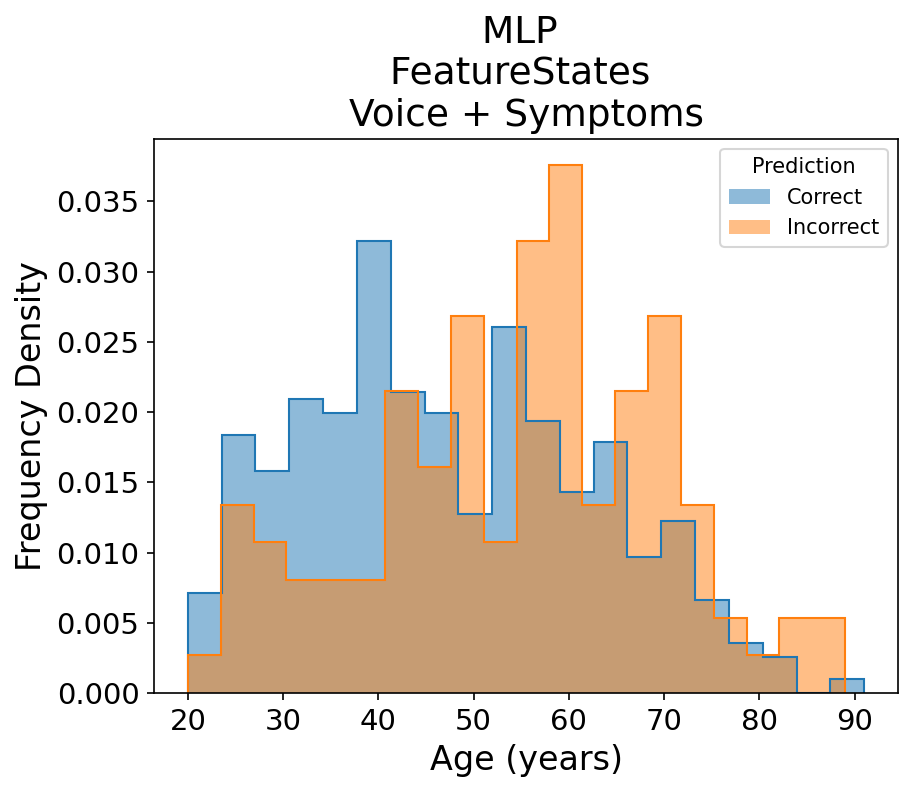

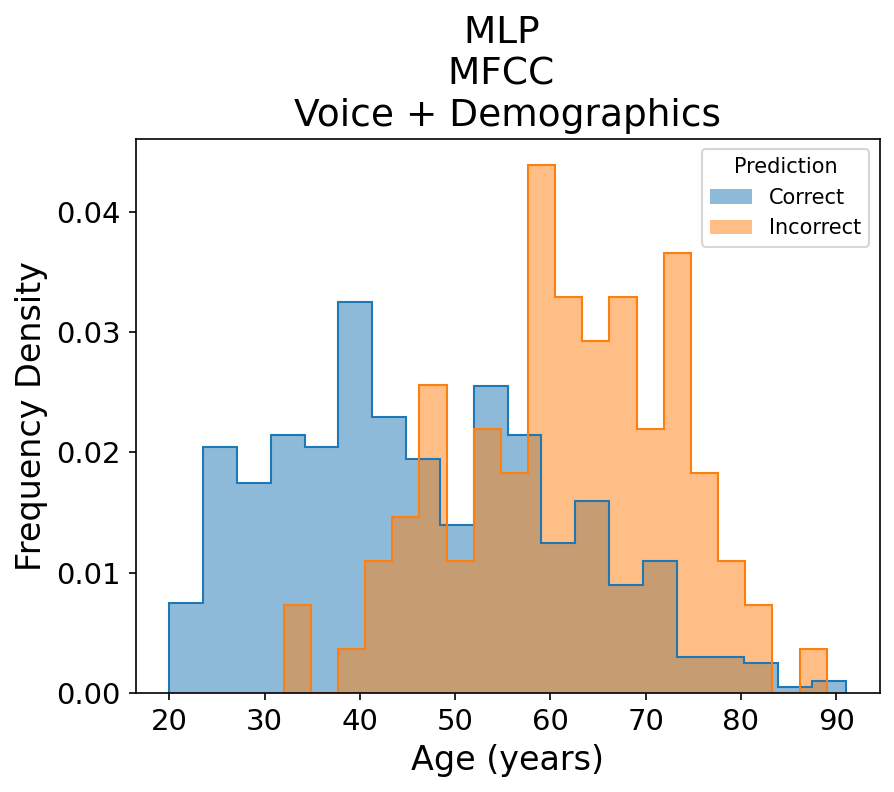

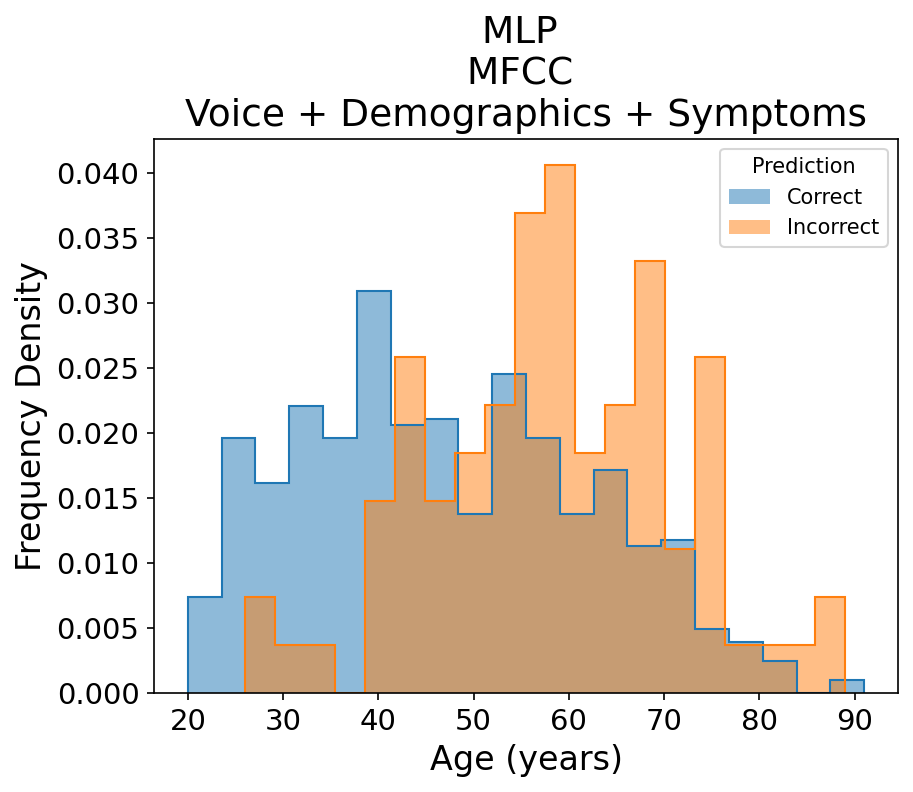

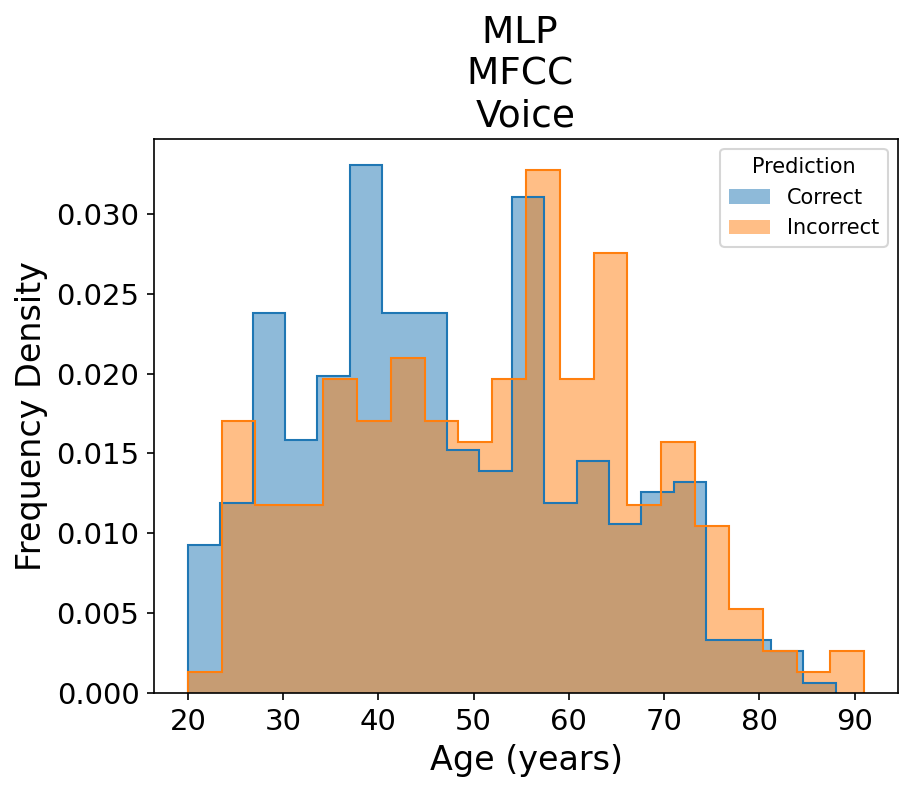

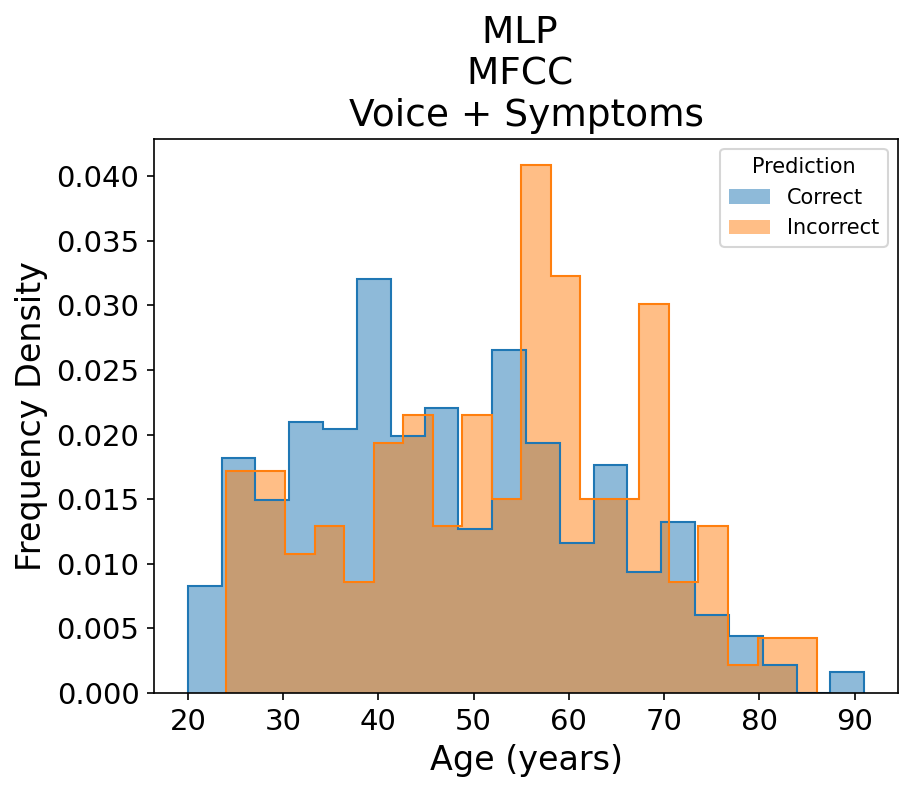

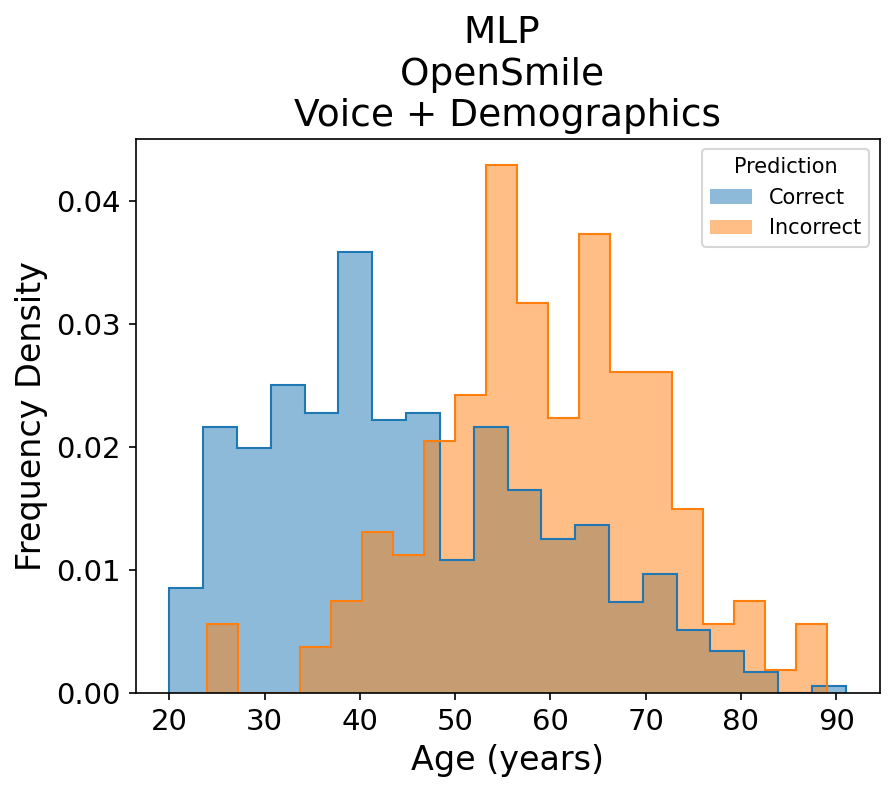

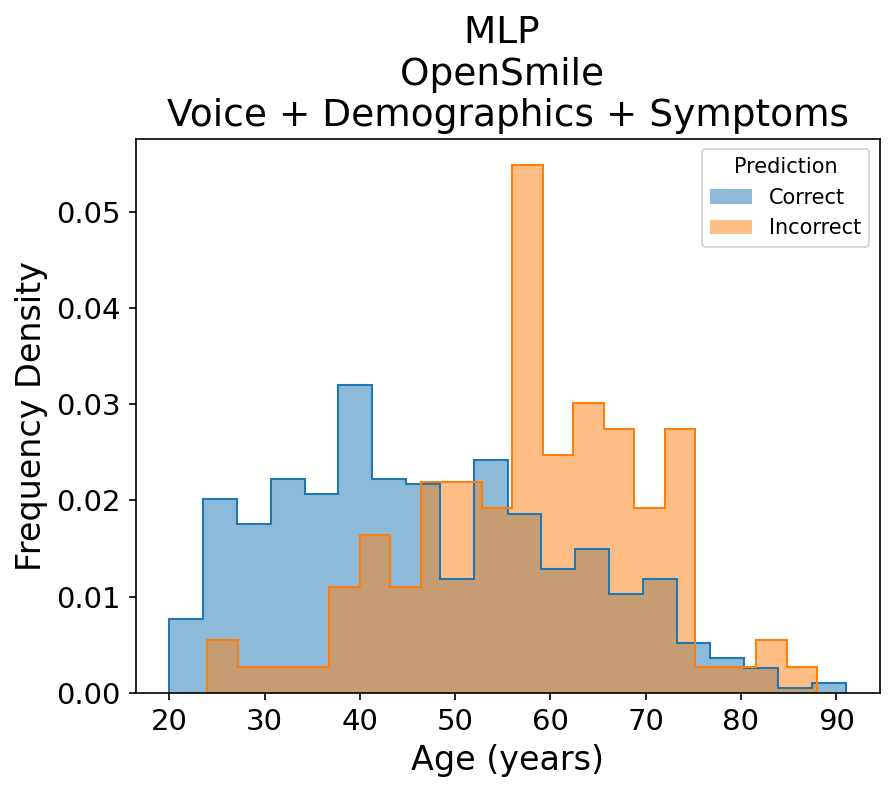

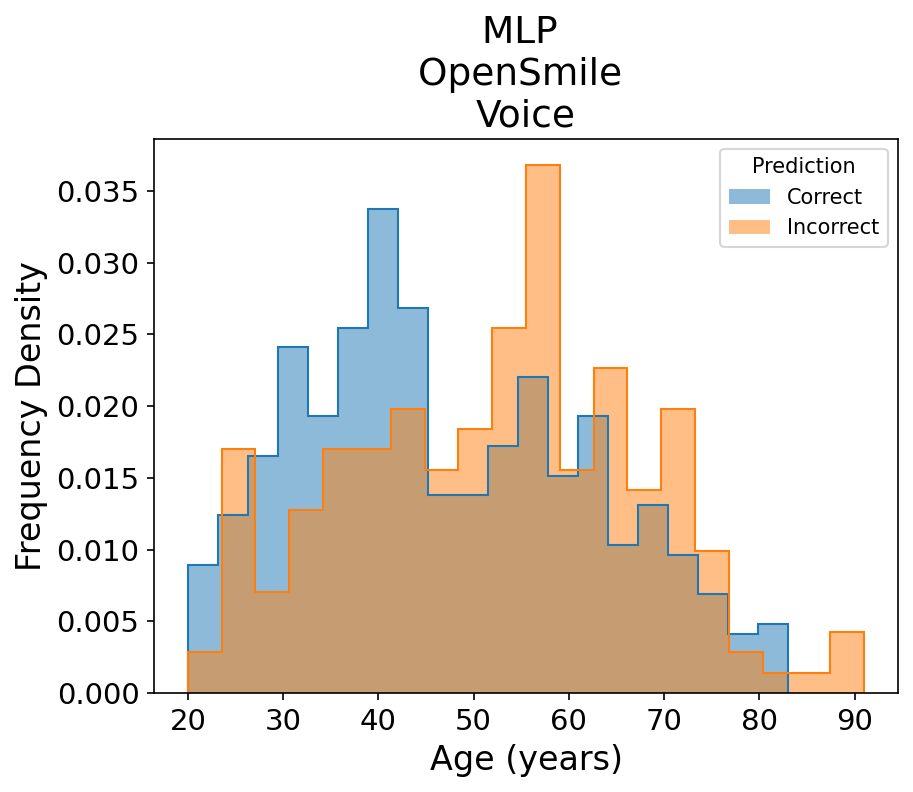

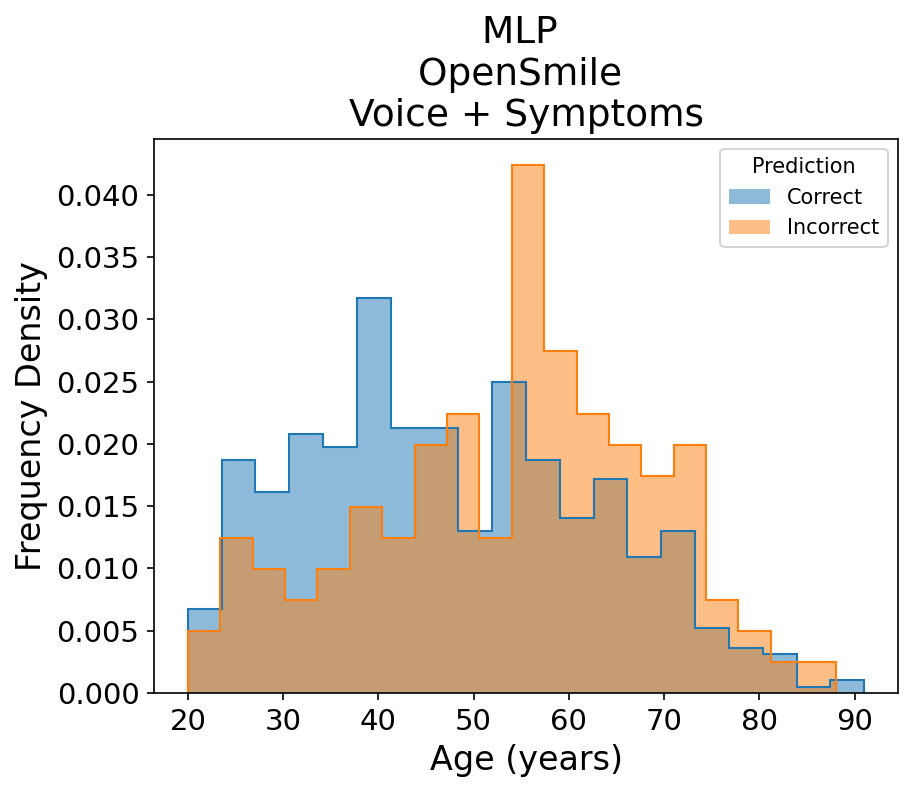

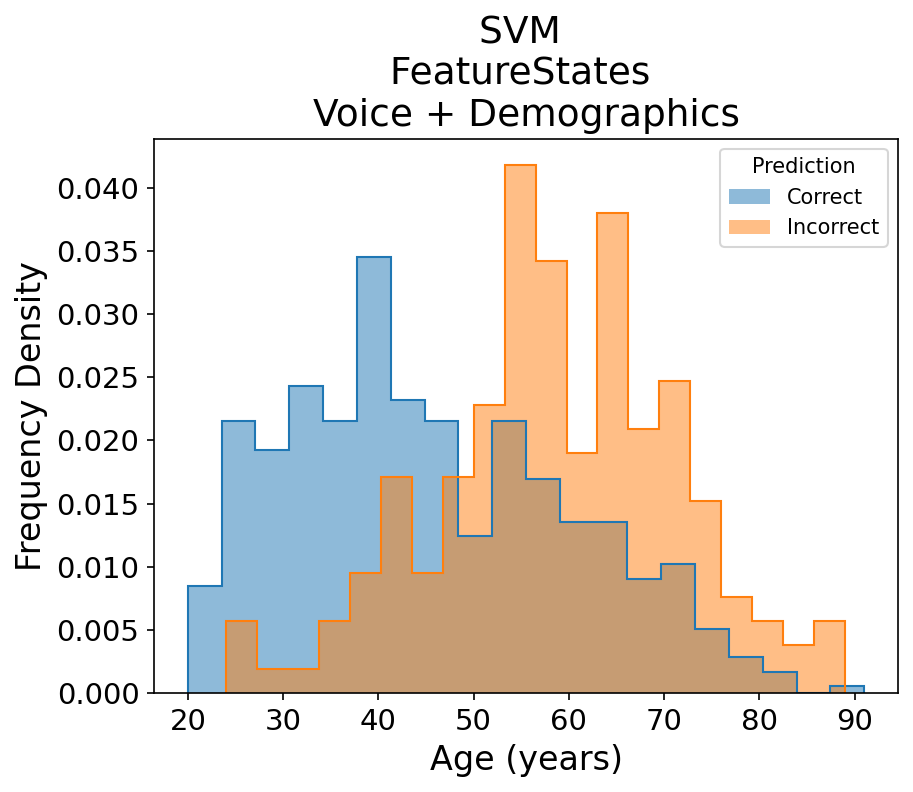

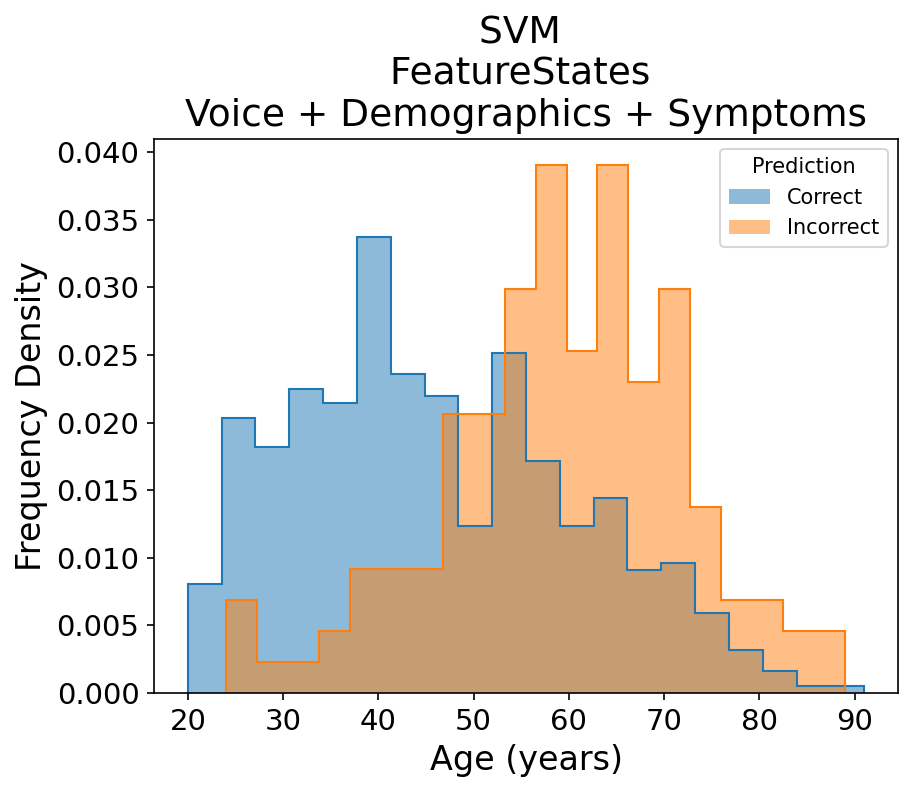

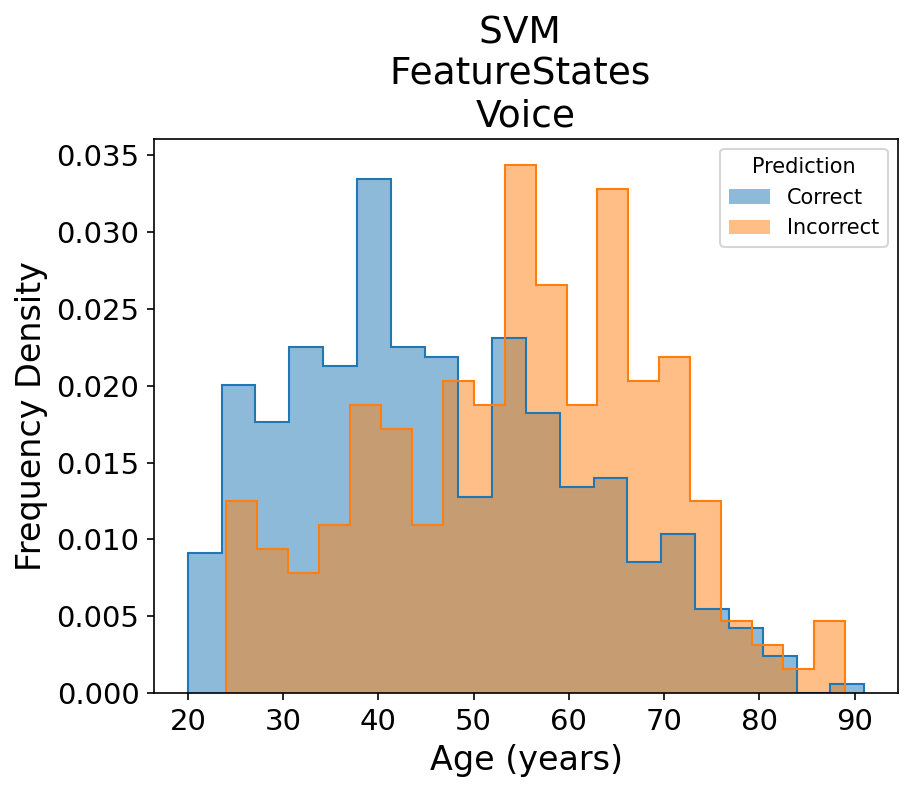

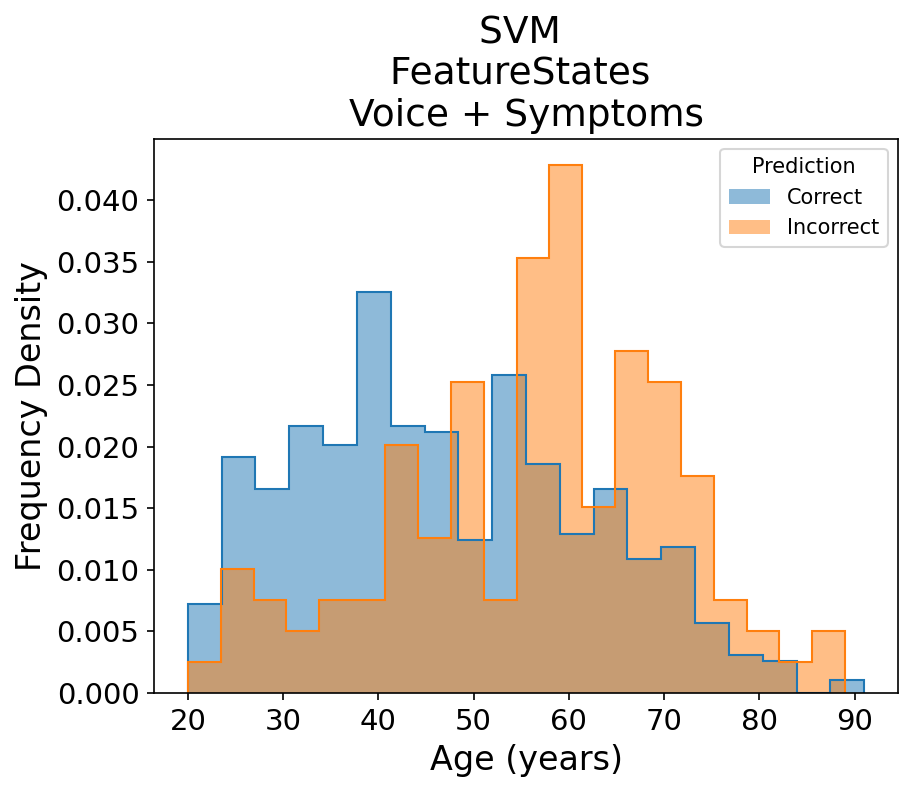

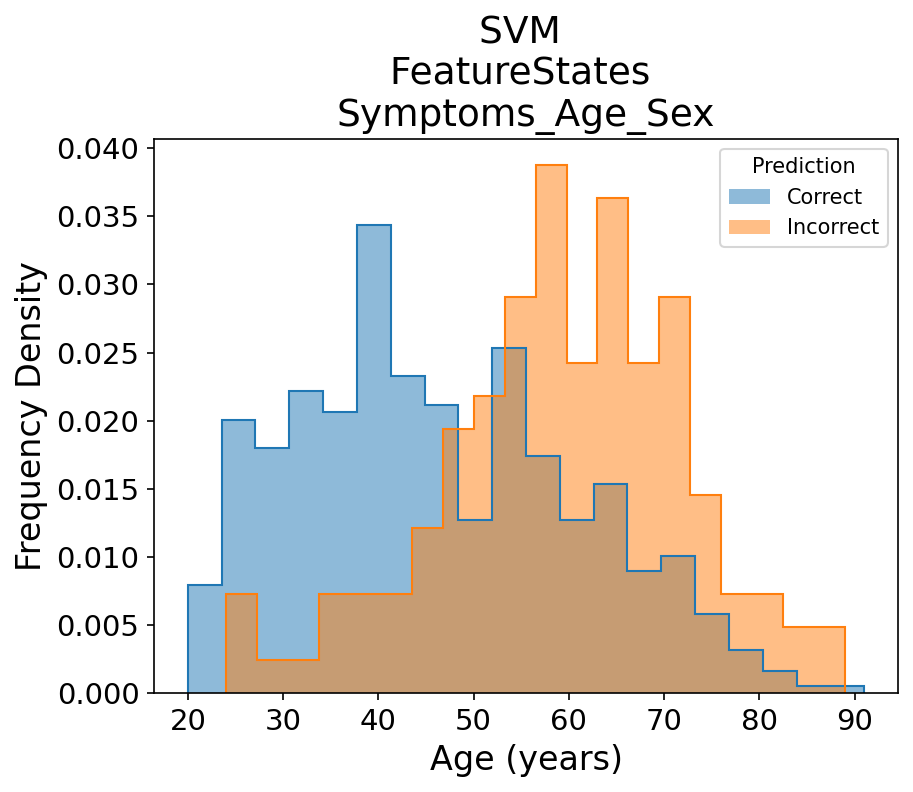

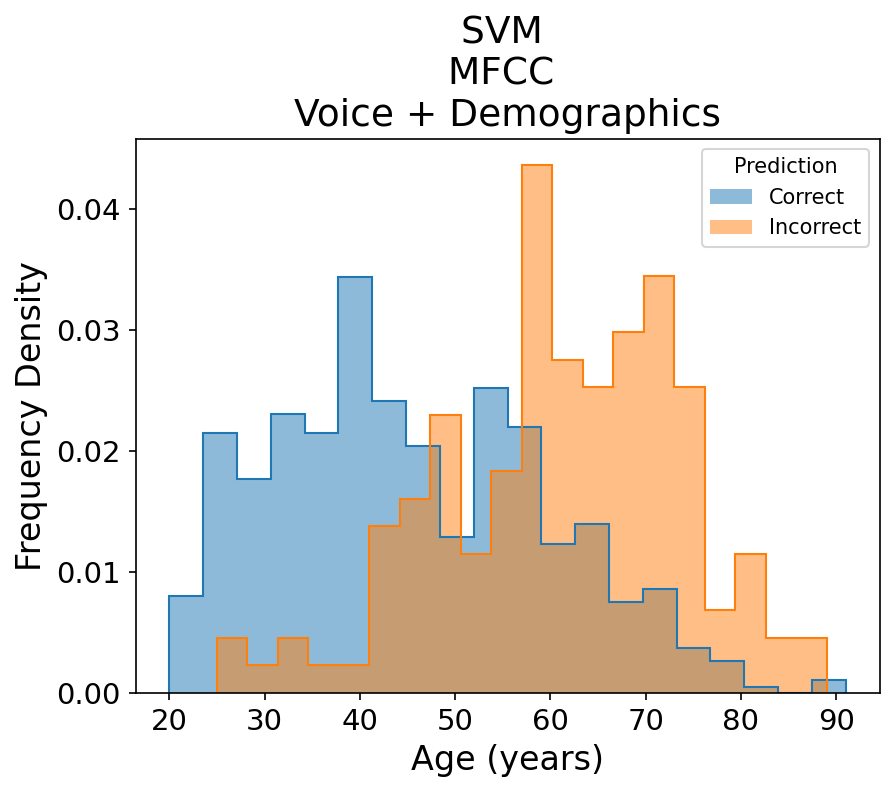

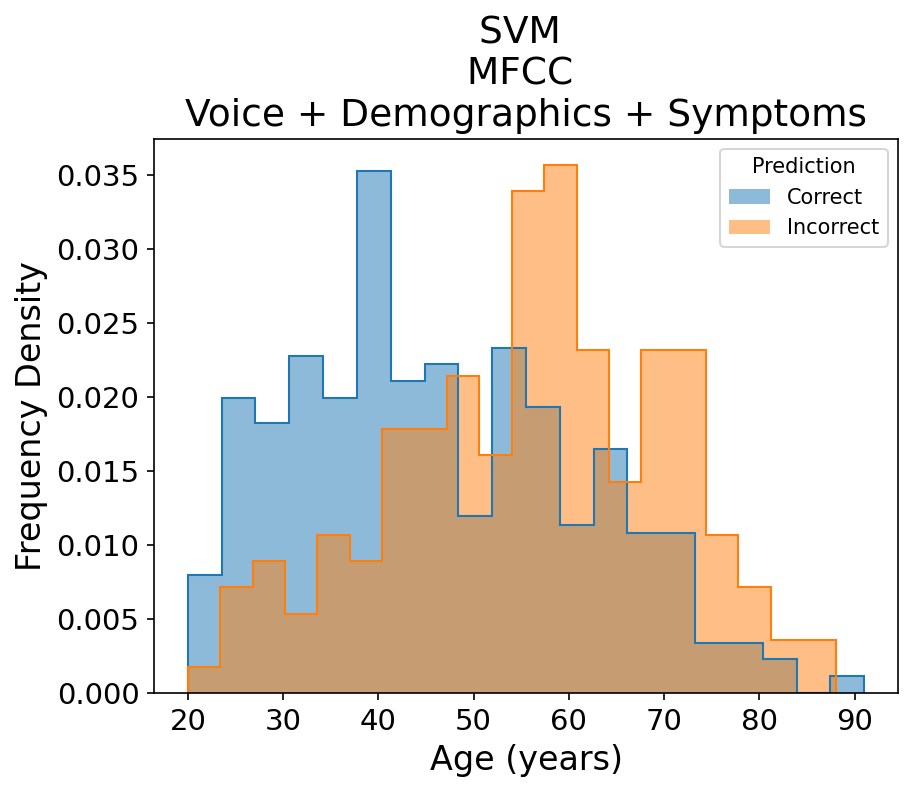

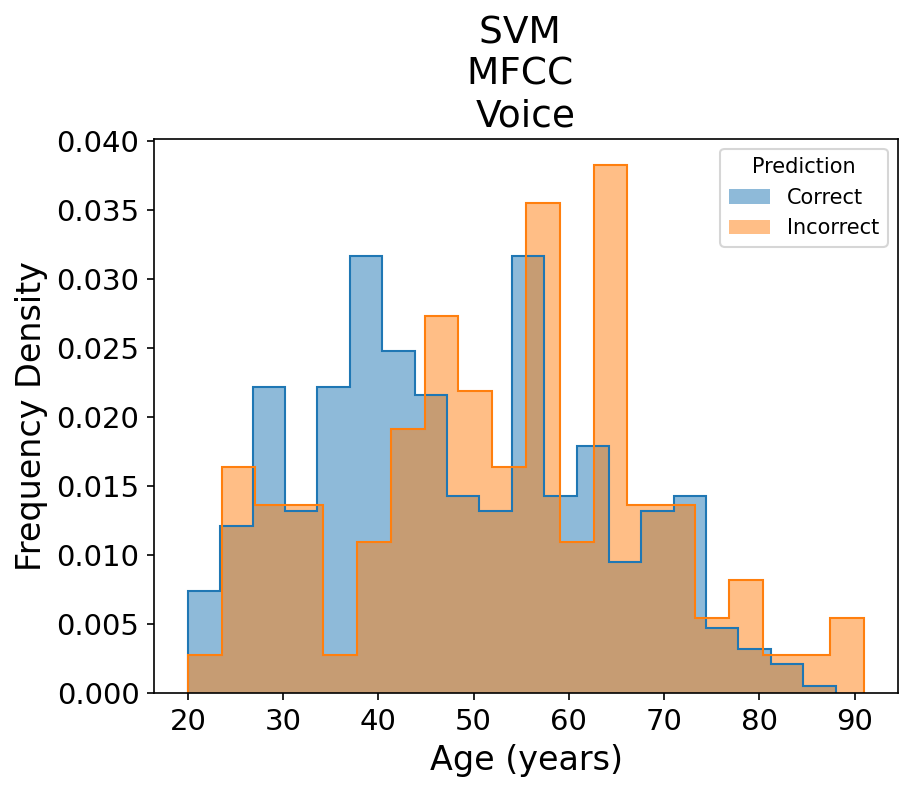

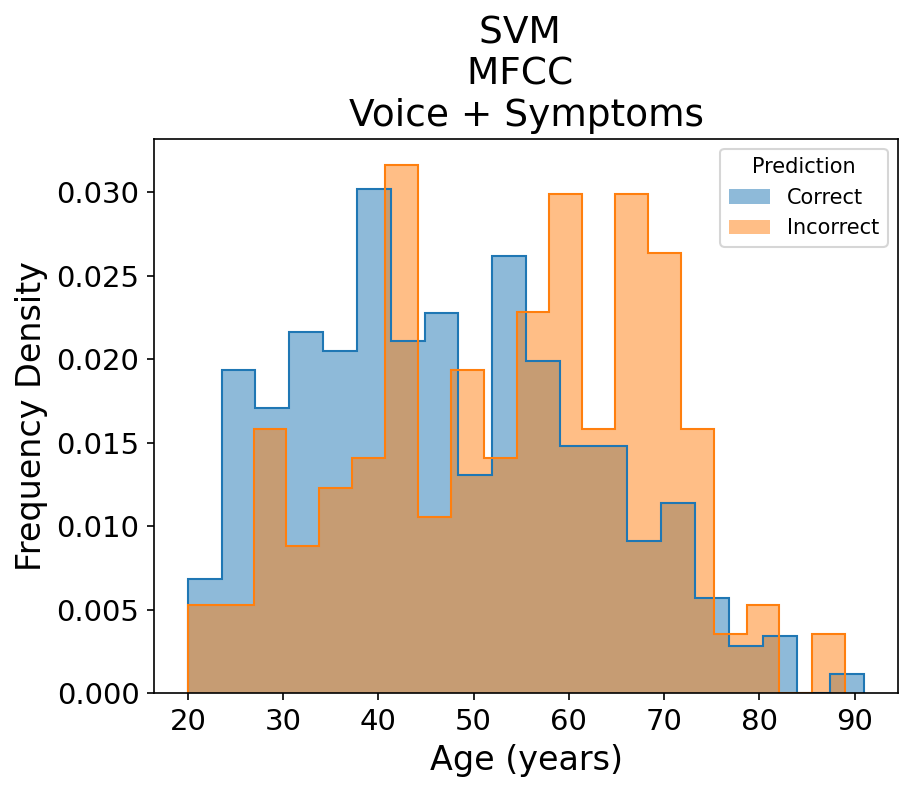

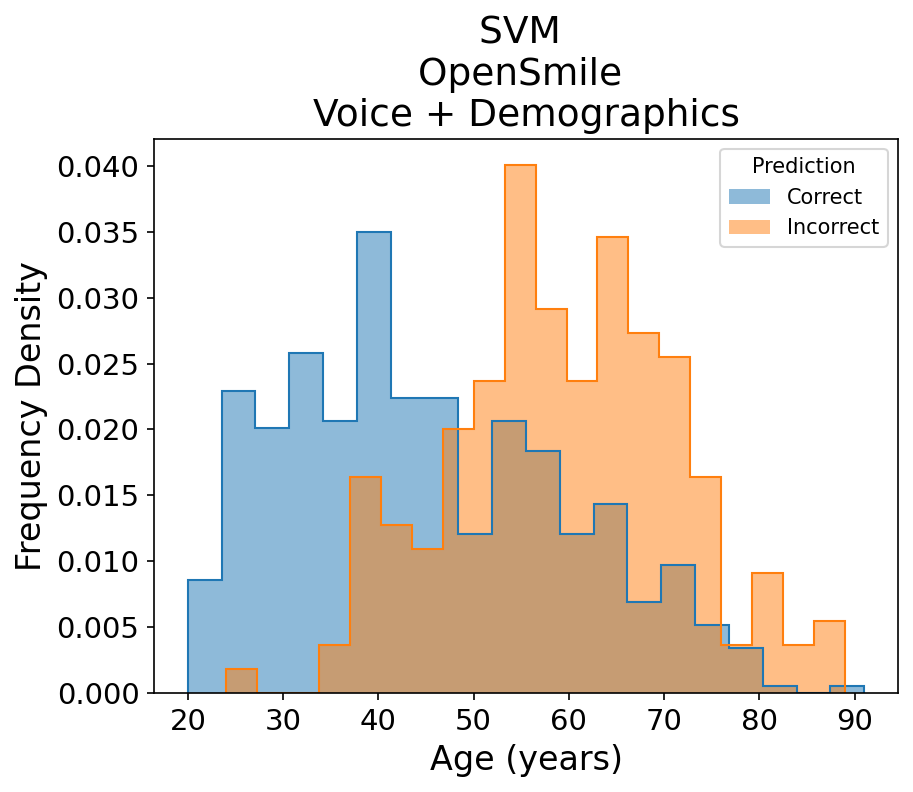

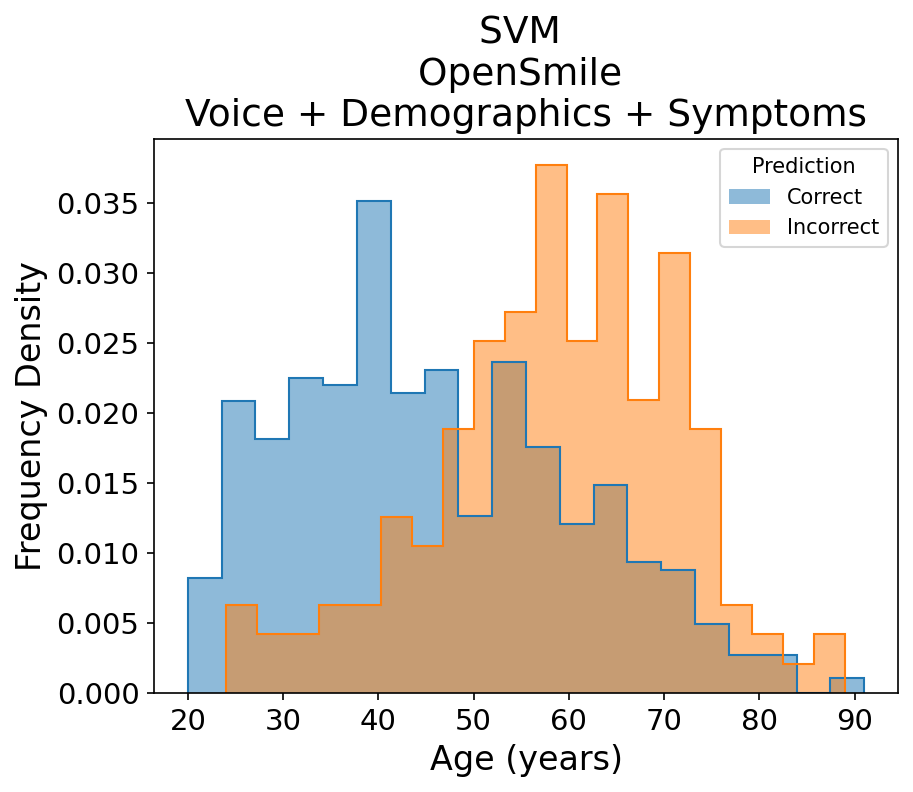

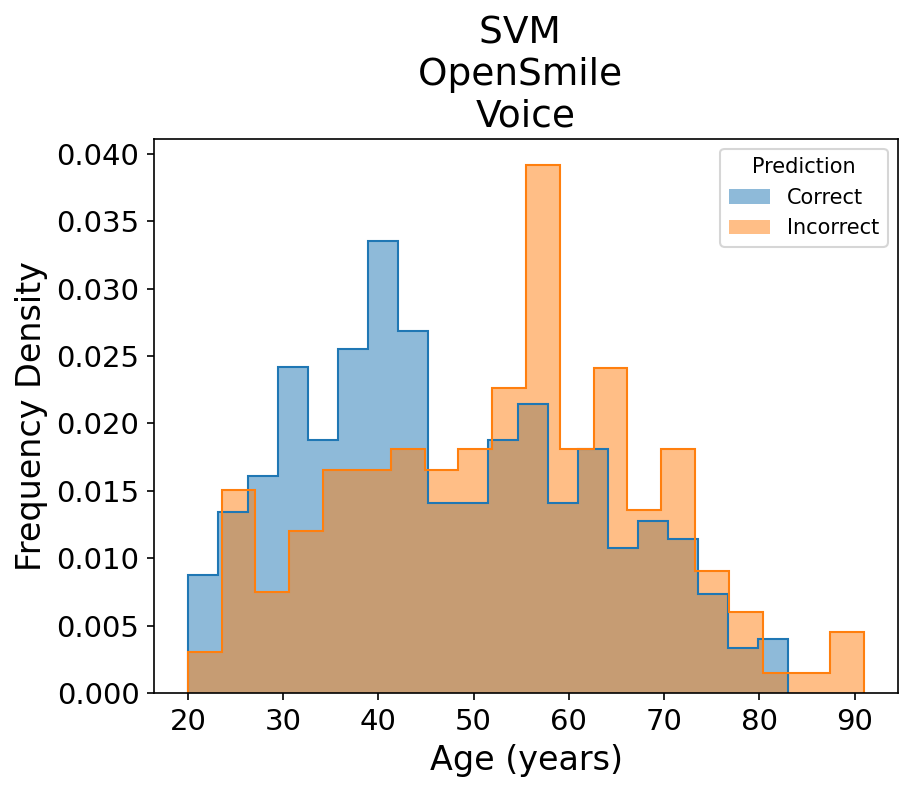

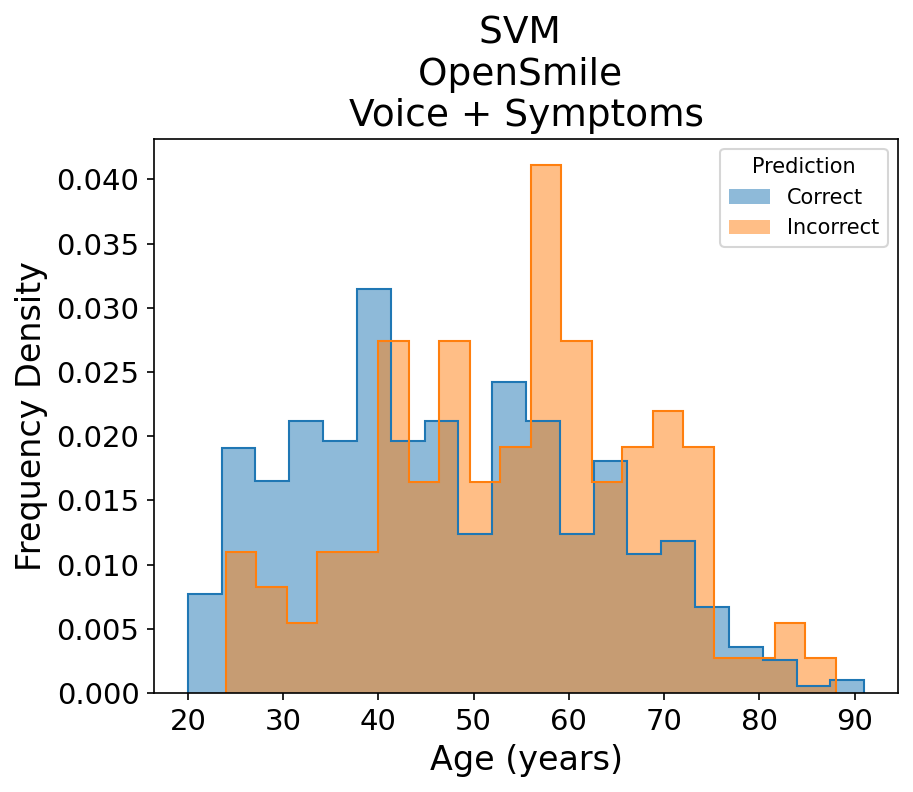

In [133]:
for file in os.listdir(model_dir):
    if file.endswith('.pkl'):
        age_results = results[[file, 'Age']]

        age_results[age_results[file]==True]['Age'].plot(kind='hist', bins=20, label='Correct', density=True, alpha=0.5, color='tab:blue')
        age_results[age_results[file]==False]['Age'].plot(kind='hist', bins=20, label='Incorrect', density=True, alpha=0.5, color='tab:orange')
        
        age_results[age_results[file]==True]['Age'].plot(kind='hist', bins=20, histtype='step', color='tab:blue', density=True, label='')
        age_results[age_results[file]==False]['Age'].plot(kind='hist', bins=20, histtype='step', color='tab:orange', density=True, label='')
        
        plt.legend(title='Prediction')

        model_name = file.split('.')[0]
        algorithm, feature, input_val = model_name.split('_', maxsplit=2)

        algorithm = algorithm_map[algorithm]

        try:
            input_val = input_map[input_val]
        except:
            pass
        
        title = f'{algorithm} \n{feature} \n{input_val}'
        plt.title(title)
        plt.ylabel('Frequency Density')
        plt.xlabel('Age (years)')

        plt.savefig(f'AgePerformance/{model_name}.pdf')
        
        plt.show()